In [88]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import dotenv
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr



In [89]:
usuario = os.environ.get("USUARIO")
password = os.environ.get("PASSWORD")
puerto = os.environ.get("PUERTO")
servidor = os.environ.get("SERVIDOR")
base_de_datos = os.environ.get("BASE_DE_DATOS")

engine = create_engine(f"mysql+pymysql://{usuario}:{password}@{servidor}:{puerto}/{base_de_datos}",
    connect_args={"ssl":{}}
)
con = engine.connect()
# pr

In [47]:
query_paro = """
SELECT 
    `Año`, 
    `Paro absoluto`, 
    `Poblacion`, 
    `Paro normalizado`
FROM PARO;
"""
paro_df = pd.read_sql(query_paro, con=engine)



In [48]:
print("Valores faltantes:")
print(paro_df.isnull().sum())

Valores faltantes:
Año                 0
Paro absoluto       0
Poblacion           0
Paro normalizado    0
dtype: int64


In [49]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_paro_df = paro_df.describe()
desc_paro_df

Año  Paro absoluto  Poblacion  Paro normalizado
count   156            156        156               156
mean  2,019          1,051    912,653               563
std       4          2,178  1,186,999             2,522
min   2,014             16     83,179                11
25%   2,014            109    324,832                26
50%   2,019            378    617,122                48
75%   2,024            906  1,025,346                93
max   2,024         13,067  7,009,268            15,569

In [50]:
columnas = ['Paro absoluto', 'Poblacion', 'Paro normalizado']
for col in columnas:
    col_skew = skew(paro_df[col], nan_policy='omit')
    col_kurt = kurtosis(paro_df[col], fisher=True, nan_policy='omit') 
    
    print(f"\nColumna: {col}")
    print(f"Asimetría (skew): {col_skew:.4f}")
    print(f"Curtosis: {col_kurt:.4f}")


Columna: Paro absoluto
Asimetría (skew): 4.0286
Curtosis: 16.8812

Columna: Poblacion
Asimetría (skew): 3.5300
Curtosis: 13.3429

Columna: Paro normalizado
Asimetría (skew): 5.0062
Curtosis: 23.7541


C:\Users\Jon\AppData\Local\Temp\ipykernel_9812\224199010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2')


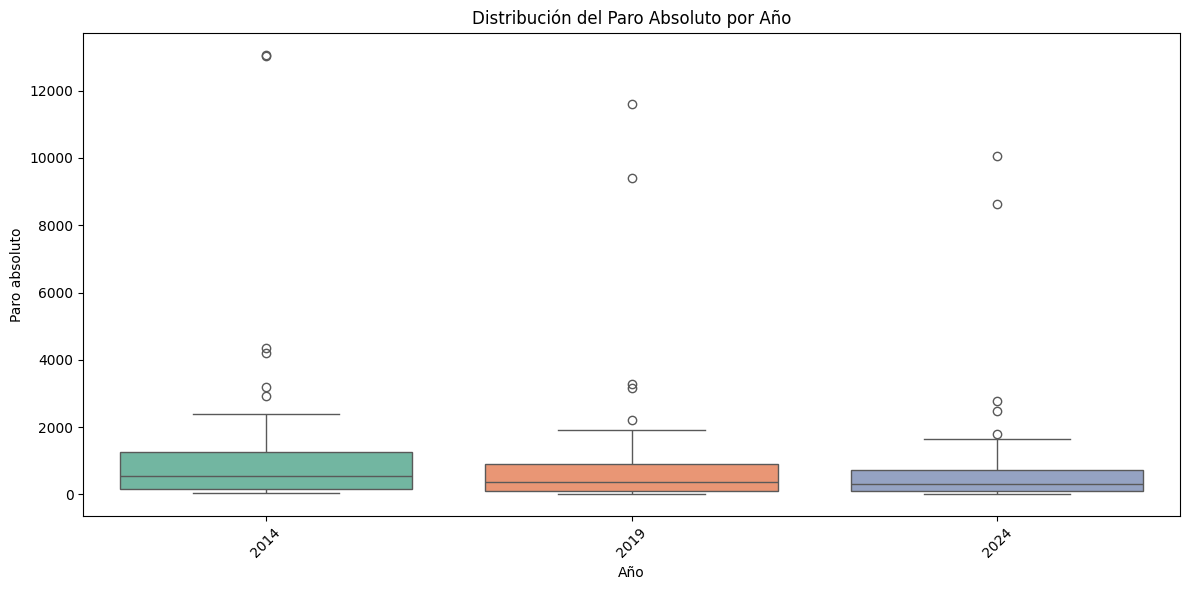

In [51]:
variables = ['Paro absoluto', 'Poblacion', 'Paro normalizado']

plt.figure(figsize=(12, 6))
sns.boxplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2')

plt.title('Distribución del Paro Absoluto por Año')
plt.xlabel('Año')
plt.ylabel('Paro absoluto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_9812\1683820546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2', inner='quartile')


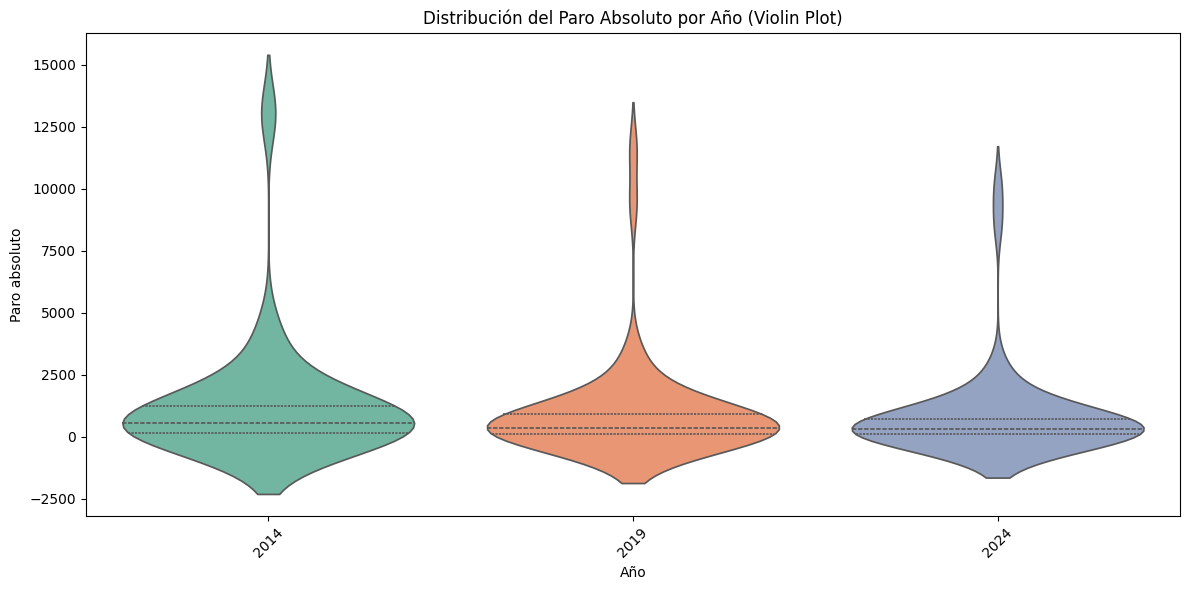

In [52]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=paro_df, x='Año', y='Paro absoluto', palette='Set2', inner='quartile')
plt.title('Distribución del Paro Absoluto por Año (Violin Plot)')
plt.xlabel('Año')
plt.ylabel('Paro absoluto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_9812\3449504796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=paro_df, x='Año', y='Poblacion', palette='Set3')


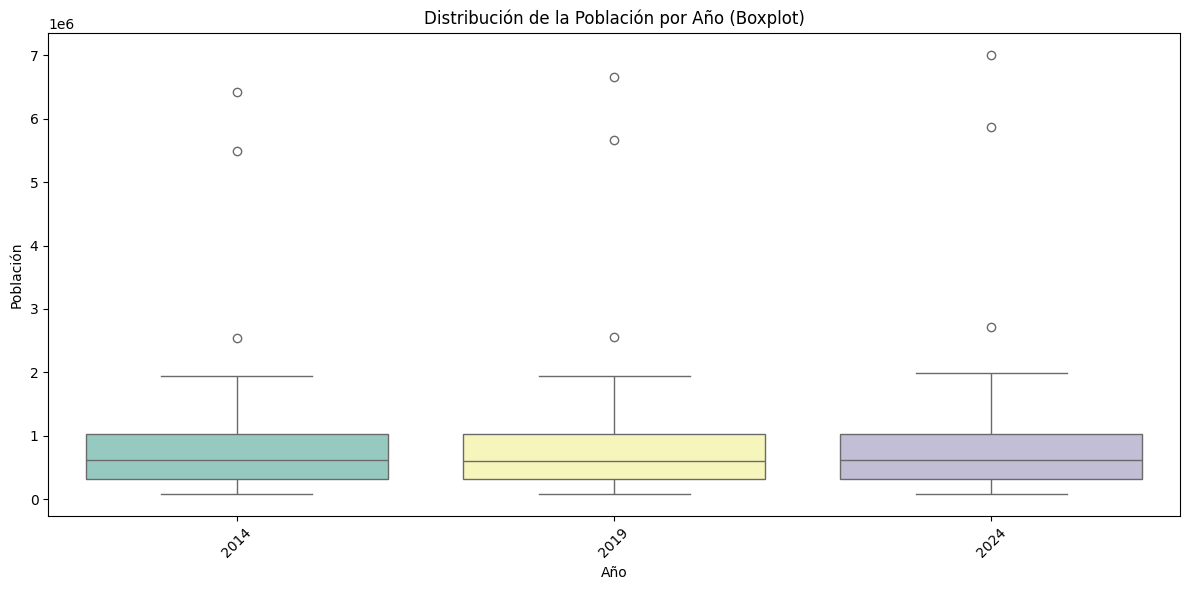

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=paro_df, x='Año', y='Poblacion', palette='Set3')

plt.title('Distribución de la Población por Año (Boxplot)')
plt.xlabel('Año')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

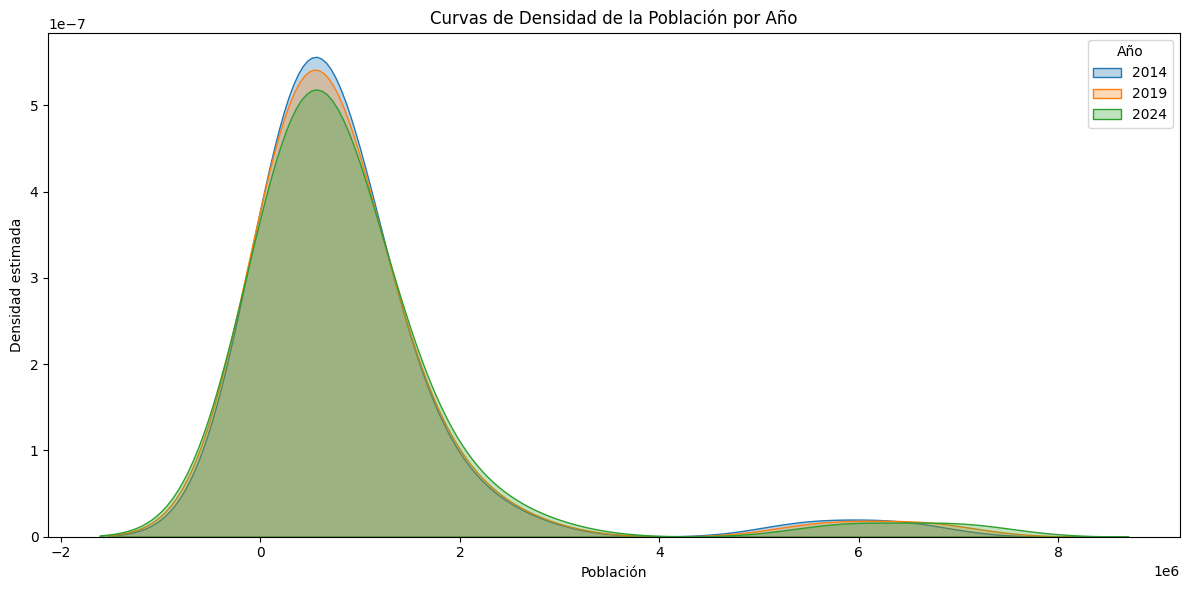

In [54]:
plt.figure(figsize=(12, 6))

for year in sorted(paro_df['Año'].unique()):
    subset = paro_df[paro_df['Año'] == year]
    sns.kdeplot(subset['Poblacion'], label=str(year), fill=True, alpha=0.3)

plt.title('Curvas de Densidad de la Población por Año')
plt.xlabel('Población')
plt.ylabel('Densidad estimada')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

In [55]:
query_renta= """SELECT 
    Provincia,
    `Número de declaraciones`,
    `Renta bruta media`,
    `Rentas  del trabajo`,
    `Rentas exentas`,
    `Renta bruta`,
    `Cotizaciones sociales a la SS`,
    `Cuota resultante de la autoliquidación`,
    `Renta disponible`,
    Año
FROM 
    RENTA
ORDER BY
    Año, Provincia;
"""
renta_df = pd.read_sql(query_renta, con=engine)

In [56]:
print("Valores faltantes:")
print(renta_df.isnull().sum())

Valores faltantes:
Provincia                                 0
Número de declaraciones                   0
Renta bruta media                         0
Rentas  del trabajo                       0
Rentas exentas                            0
Renta bruta                               0
Cotizaciones sociales a la SS             0
Cuota resultante de la autoliquidación    0
Renta disponible                          0
Año                                       0
dtype: int64


In [57]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_renta_df = renta_df.describe()
desc_renta_df

Número de declaraciones  Renta bruta media  Rentas  del trabajo  \
count                       94                 94                   94   
mean                   427,993             23,830            9,053,610   
std                    592,531              3,605           15,681,183   
min                     27,418             17,693              638,331   
25%                    162,146             21,402            2,839,854   
50%                    284,520             23,304            4,950,392   
75%                    472,068             25,282            9,075,326   
max                  3,449,219             37,768           99,869,759   

       Rentas exentas  Renta bruta  Cotizaciones sociales a la SS  \
count              94           94                             94   
mean          409,484   11,374,719                        439,784   
std           716,743   20,093,852                        731,530   
min            18,298      787,228                         28,439   
25%           123,074    3,483,112                        130,943   
50%           209,574    6,109,250                        243,688   
75%           399,379   11,693,534                        454,492   
max         4,339,166  130,269,129                      4,494,828   

       Cuota resultante de la autoliquidación  Renta disponible   Año  
count                                      94                94    94  
mean                                1,645,440         9,290,189 2,016  
std                                 3,456,844        15,918,313     3  
min                                    58,050           696,663 2,014  
25%                                   411,394         2,945,961 2,014  
50%                                   714,553         5,193,604 2,016  
75%                                 1,485,498         9,580,025 2,019  
max                                22,709,320       103,069,005 2,019

In [58]:
columnas = [
    'Número de declaraciones',
    'Renta bruta media',
    'Rentas  del trabajo',
    'Rentas exentas',
    'Renta bruta',
    'Cotizaciones sociales a la SS',
    'Cuota resultante de la autoliquidación',
    'Renta disponible'
]
for col in columnas:
    col_skew = skew(renta_df[col], nan_policy='omit')
    col_kurt = kurtosis(renta_df[col], fisher=True, nan_policy='omit')  
    
    print(f"\nColumna: {col}")
    print(f"Asimetría (skew): {col_skew:.4f}")
    print(f"Curtosis: {col_kurt:.4f}")


Columna: Número de declaraciones
Asimetría (skew): 3.6434
Curtosis: 13.6922

Columna: Renta bruta media
Asimetría (skew): 1.0406
Curtosis: 1.6825

Columna: Rentas  del trabajo
Asimetría (skew): 4.2193
Curtosis: 18.2492

Columna: Rentas exentas
Asimetría (skew): 4.0409
Curtosis: 16.3530

Columna: Renta bruta
Asimetría (skew): 4.2760
Curtosis: 18.8361

Columna: Cotizaciones sociales a la SS
Asimetría (skew): 4.0485
Curtosis: 16.6926

Columna: Cuota resultante de la autoliquidación
Asimetría (skew): 4.5419
Curtosis: 20.9570

Columna: Renta disponible
Asimetría (skew): 4.2260
Curtosis: 18.4694


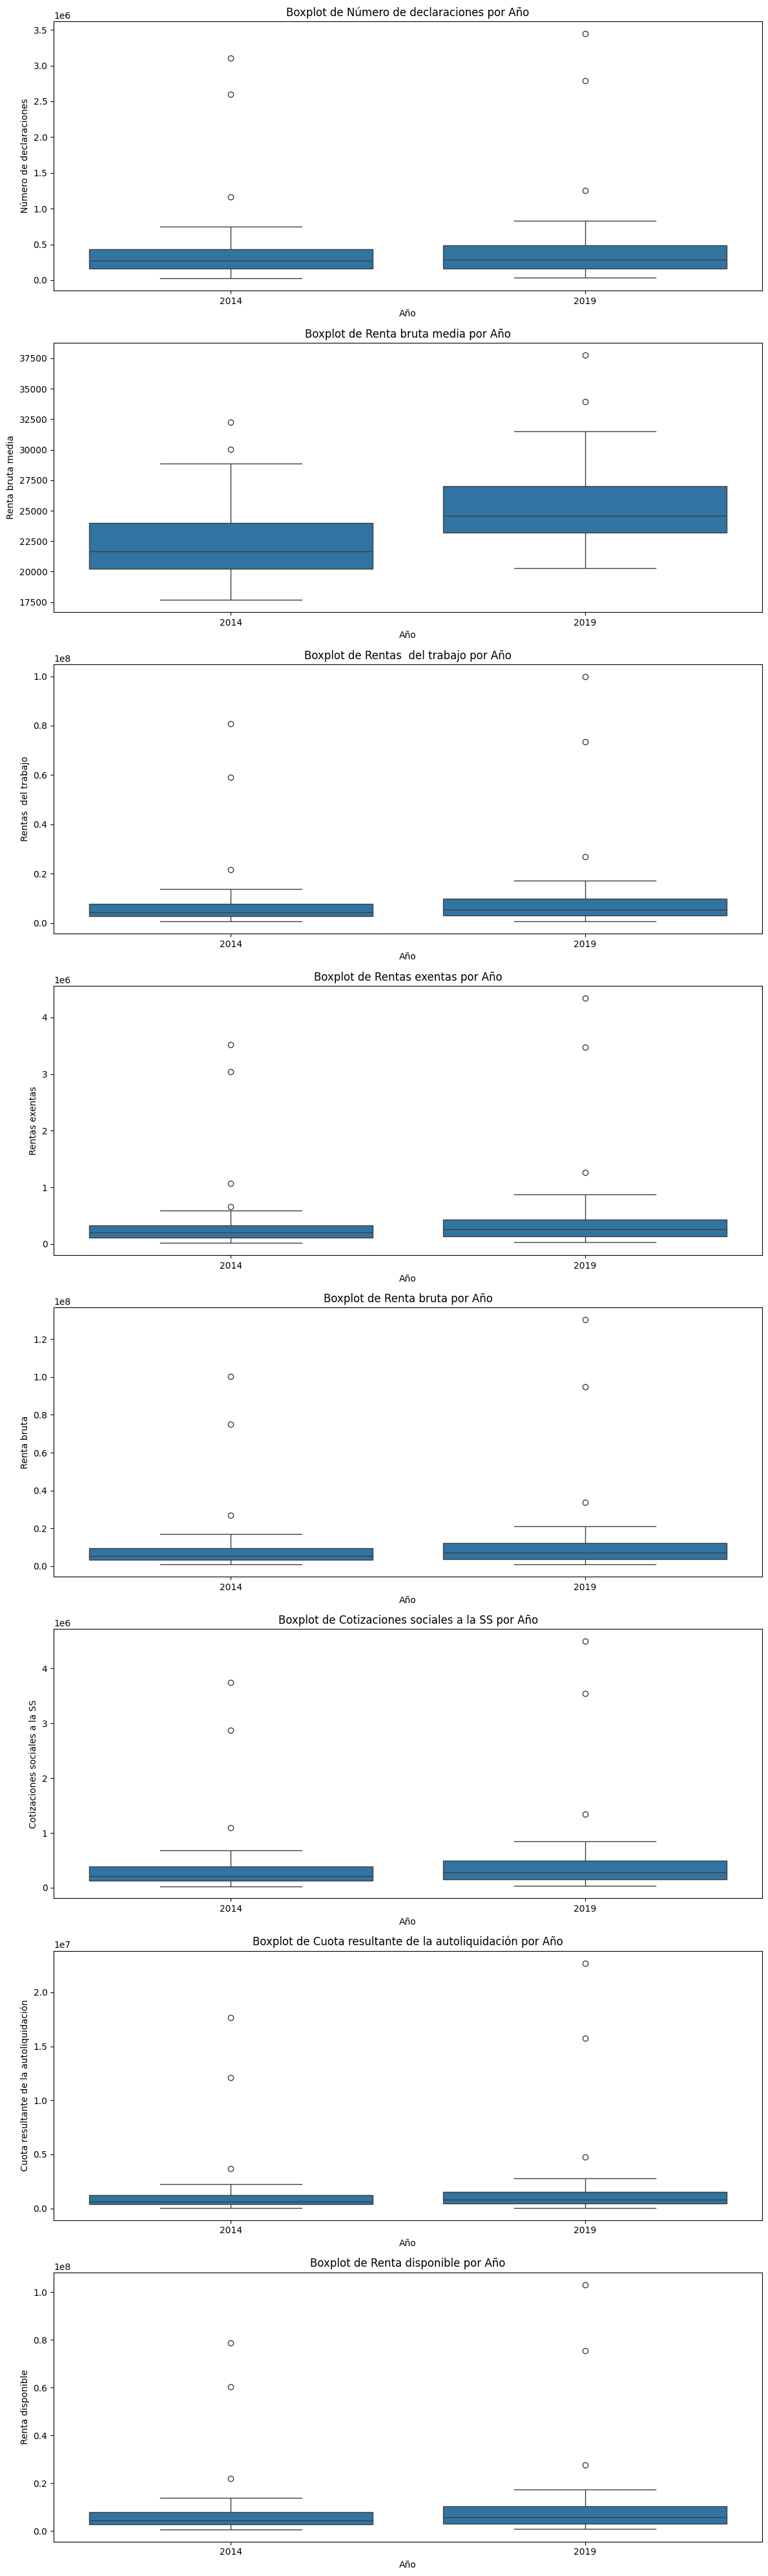

In [59]:
variables = [
    'Número de declaraciones',
    'Renta bruta media',
    'Rentas  del trabajo',
    'Rentas exentas',
    'Renta bruta',
    'Cotizaciones sociales a la SS',
    'Cuota resultante de la autoliquidación',
    'Renta disponible'
]
years = renta_df['Año'].unique()


fig, axes = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)))

for i, var in enumerate(variables):
    ax = axes[i]
    sns.boxplot(x='Año', y=var, data=renta_df, ax=ax)
    ax.set_title(f'Boxplot de {var} por Año')

plt.tight_layout()
plt.show()

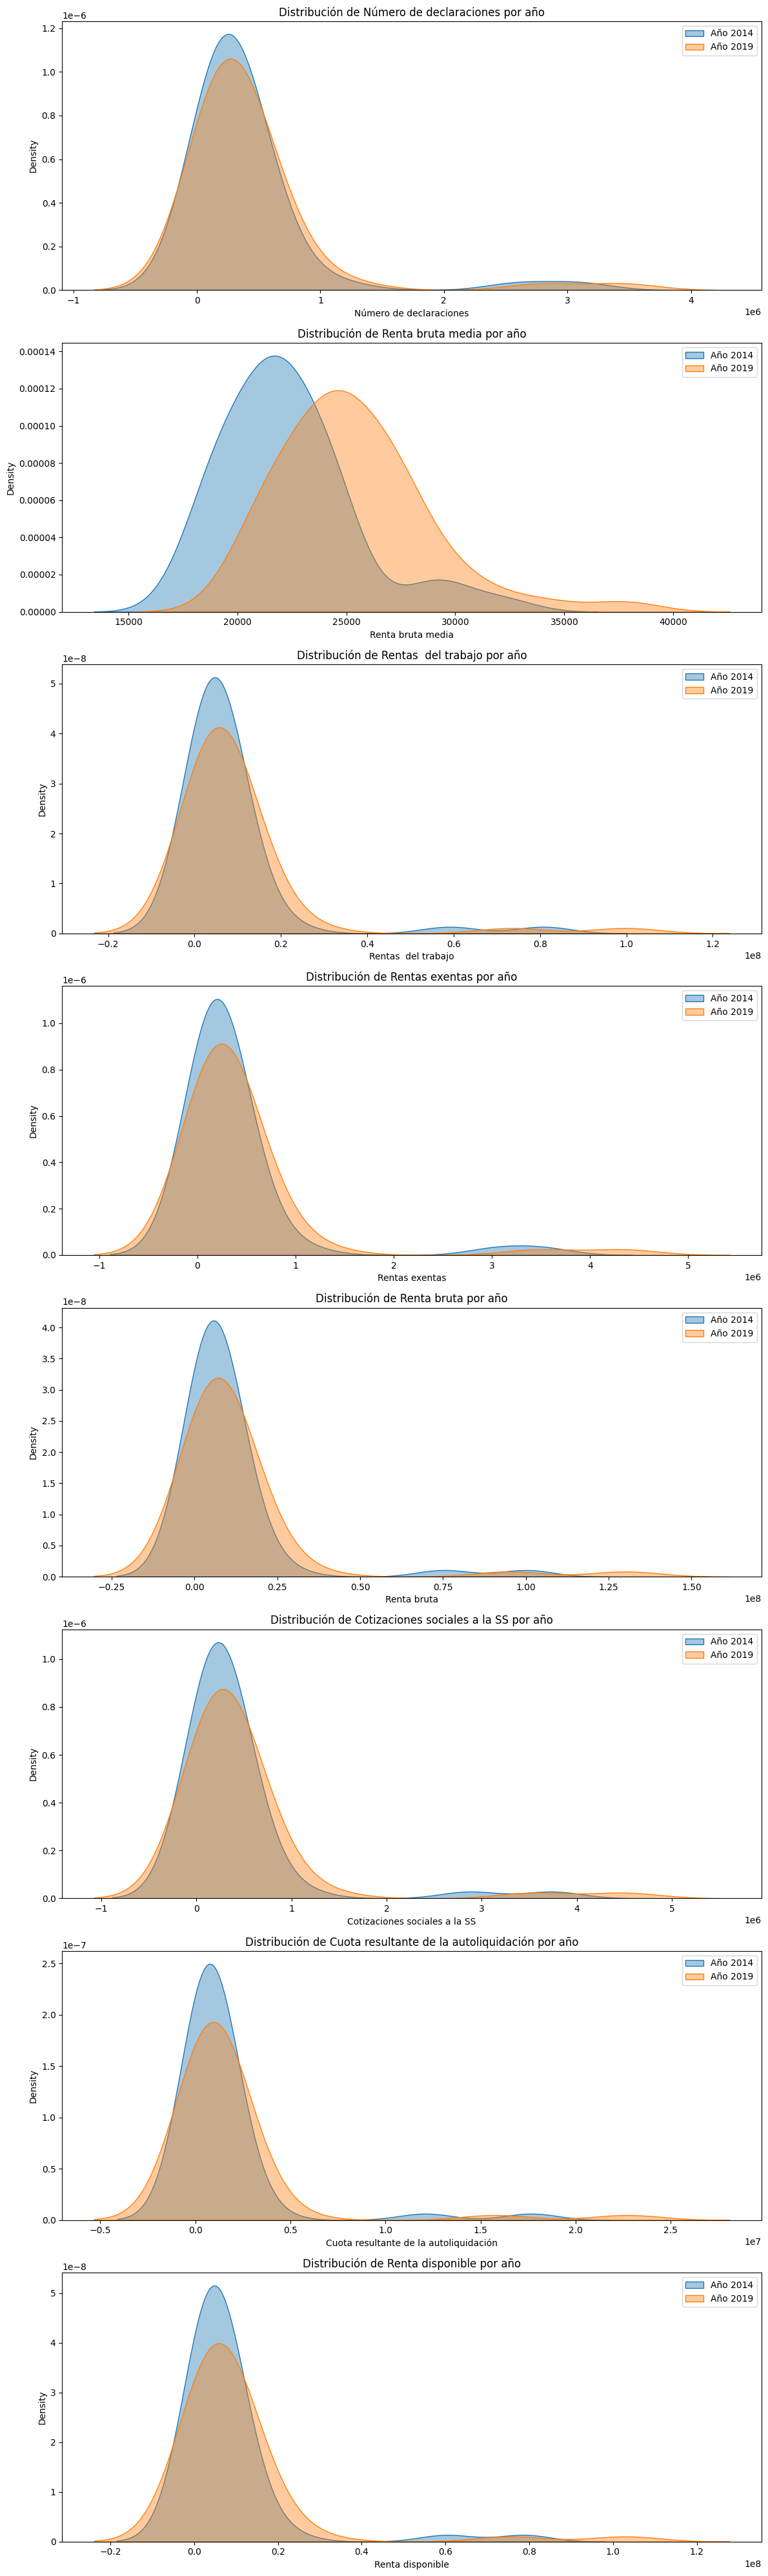

In [60]:
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 5 * len(variables)), sharex=False)

for i, var in enumerate(variables):
    ax = axes[i]
    for year in years:
        sns.kdeplot(
            renta_df[renta_df['Año'] == year][var].dropna(),
            label=f'Año {year}',
            ax=ax,
            fill=True,
            alpha=0.4
        )
    ax.set_title(f'Distribución de {var} por año')
    ax.legend()

plt.tight_layout()
plt.show()

In [61]:
query_show_columns = "SHOW COLUMNS FROM VOTOS_PROVINCIA;"
columns_df = pd.read_sql(query_show_columns, con=engine)
print(columns_df)

                   Field    Type Null Key Default Extra
0             Unnamed: 0  bigint  YES        None      
1           id_provincia  bigint  YES        None      
2                    año  bigint  YES        None      
3  Total censo electoral  bigint  YES        None      
4         Total votantes  bigint  YES        None      
5        Votos en blanco  bigint  YES        None      
6            Votos nulos  bigint  YES        None      


In [62]:
query_votes = """
SELECT
    id_provincia,
    año,
    `Total censo electoral`,
    `Total votantes`,
    `Votos en blanco`,
    `Votos nulos`
FROM
    VOTOS_PROVINCIA
ORDER BY
    año, id_provincia;
"""

votes_df = pd.read_sql(query_votes, con=engine)
votes_df.head()


id_provincia   año  Total censo electoral  Total votantes  Votos en blanco  \
0             1  2014                 248665          108262             1717   
1             2  2014                 305232          145785             3587   
2             3  2014                1266522          578847            11375   
3             4  2014                 459067          185533             4879   
4             5  2014                 134070           67451             1822   

   Votos nulos  
0         2007  
1         3290  
2        16476  
3         3053  
4         2107

In [63]:
print("Valores faltantes:")
print(votes_df.isnull().sum())

Valores faltantes:
id_provincia             0
año                      0
Total censo electoral    0
Total votantes           0
Votos en blanco          0
Votos nulos              0
dtype: int64


In [64]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_votes_df = votes_df.describe()
desc_votes_df

id_provincia   año  Total censo electoral  Total votantes  \
count           156   156                    156             156   
mean             26 2,019                677,217         359,509   
std              15     4                846,216         475,001   
min               1 2,014                 52,905          14,199   
25%              14 2,014                254,188         130,388   
50%              26 2,019                470,124         239,442   
75%              39 2,024                782,866         385,686   
max              52 2,024              4,964,662       3,230,174   

       Votos en blanco  Votos nulos  
count              156          156  
mean             4,473        3,894  
std              5,266        4,133  
min                 92           73  
25%              1,679        1,530  
50%              3,035        2,878  
75%              5,404        5,076  
max             43,244       33,993

In [65]:
columnas = [
    'Total censo electoral',
    'Total votantes',
    'Votos en blanco',
    'Votos nulos'
]
for col in columnas:
    col_skew = skew(votes_df[col], nan_policy='omit')
    col_kurt = kurtosis(votes_df[col], fisher=True, nan_policy='omit')  
    
    print(f"\nColumna: {col}")
    print(f"Asimetría (skew): {col_skew:.4f}")
    print(f"Curtosis: {col_kurt:.4f}")


Columna: Total censo electoral
Asimetría (skew): 3.4663
Curtosis: 12.9866

Columna: Total votantes
Asimetría (skew): 3.8227
Curtosis: 16.3743

Columna: Votos en blanco
Asimetría (skew): 3.9819
Curtosis: 22.0862

Columna: Votos nulos
Asimetría (skew): 3.5299
Curtosis: 18.7964


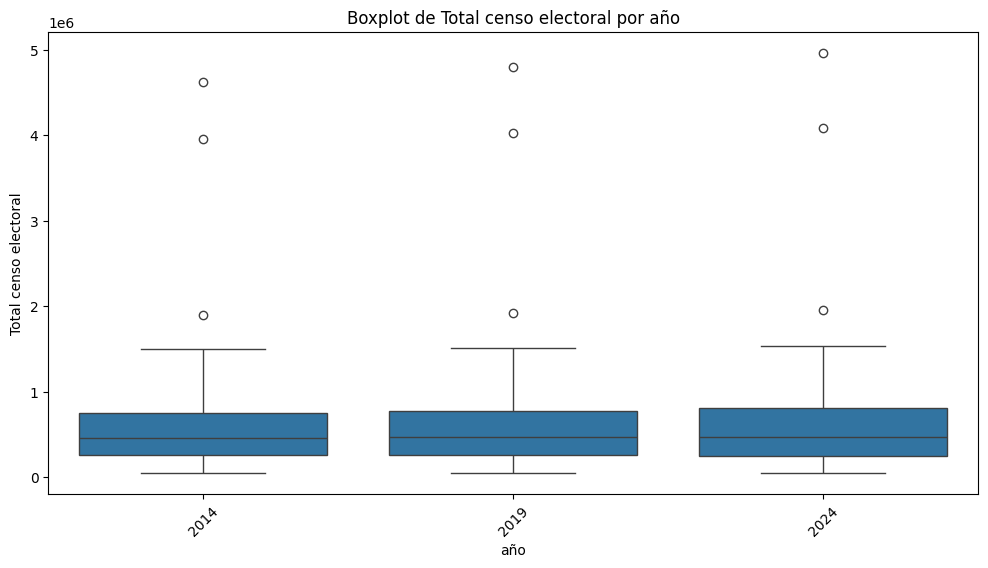

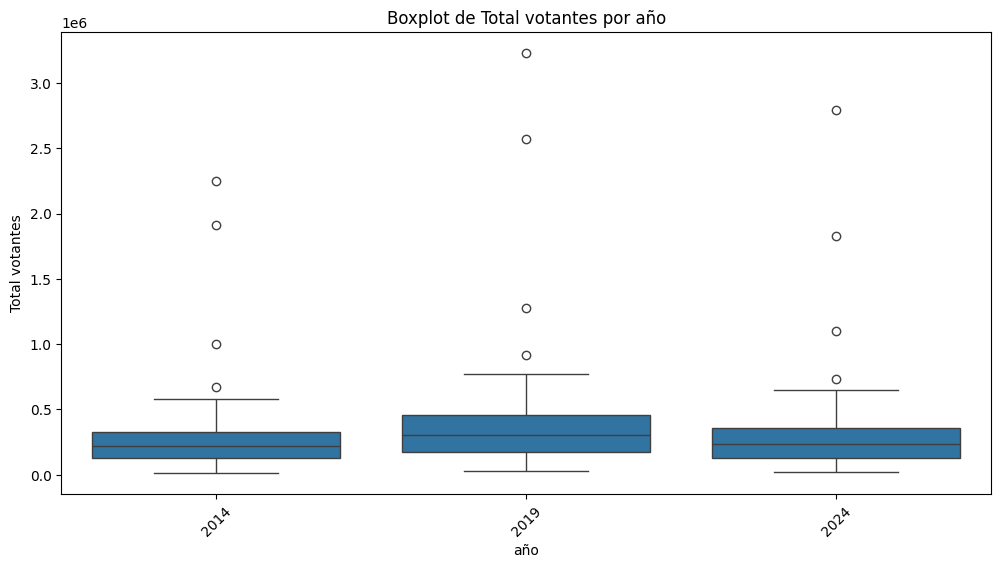

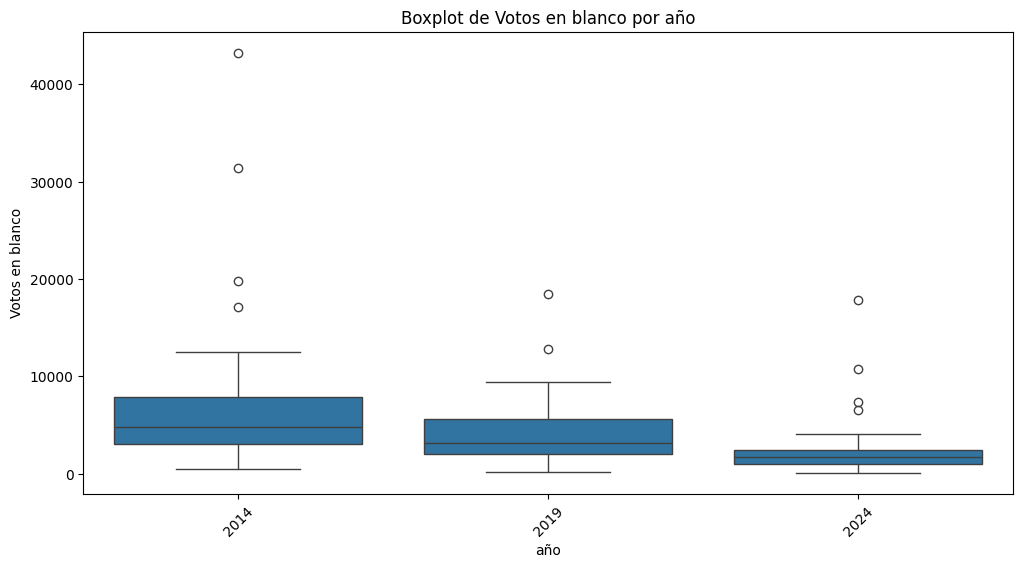

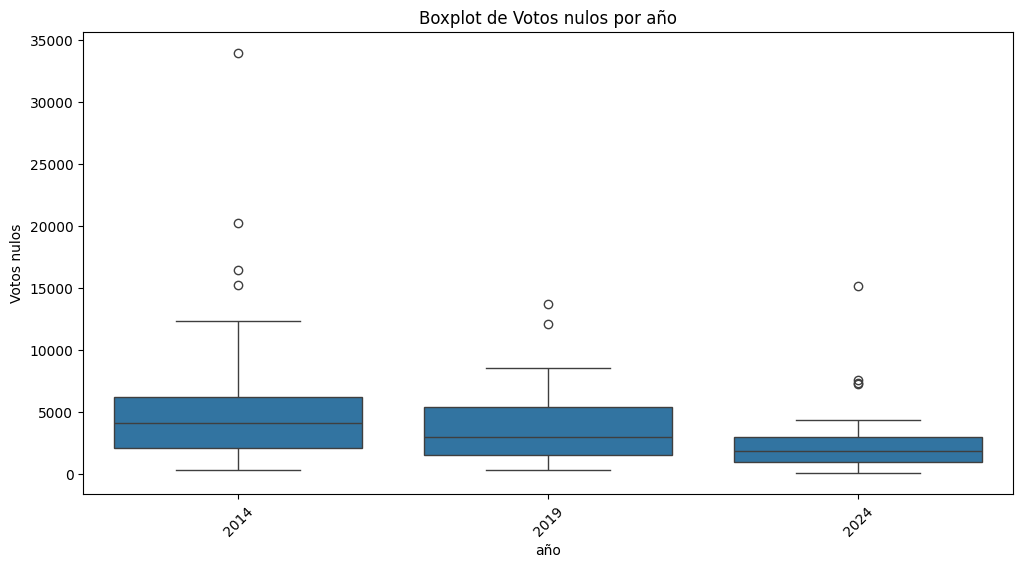

<Figure size 640x480 with 0 Axes>

In [66]:
variables = [
    'Total censo electoral',
    'Total votantes',
    'Votos en blanco',
    'Votos nulos'
]

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=votes_df, x='año', y=var)
    plt.title(f'Boxplot de {var} por año')
    plt.xticks(rotation=45)
    plt.show()
plt.tight_layout()
plt.show()

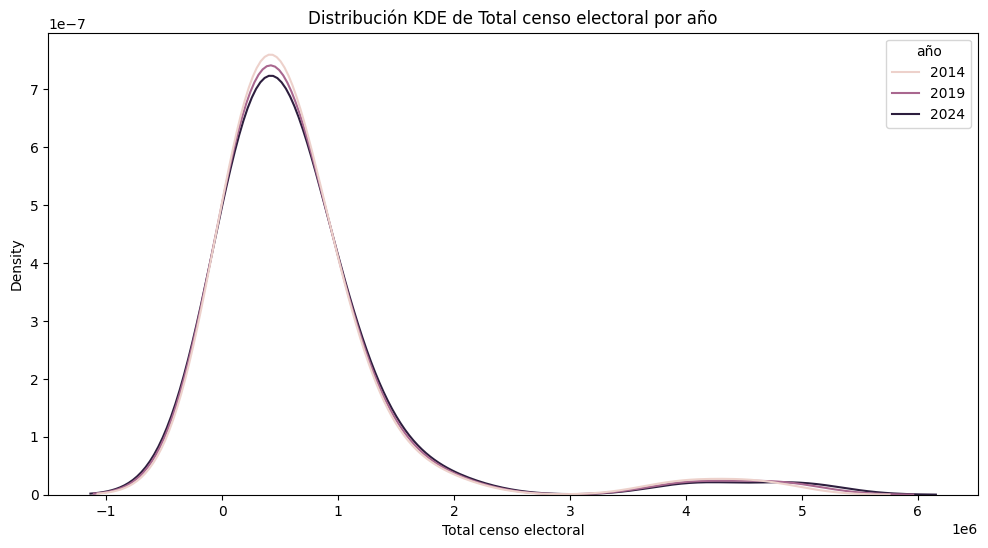

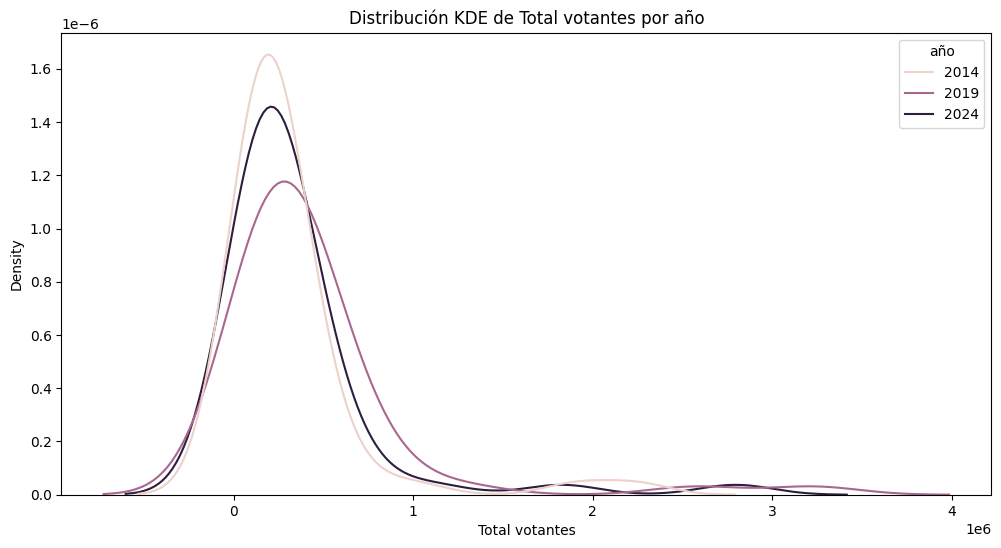

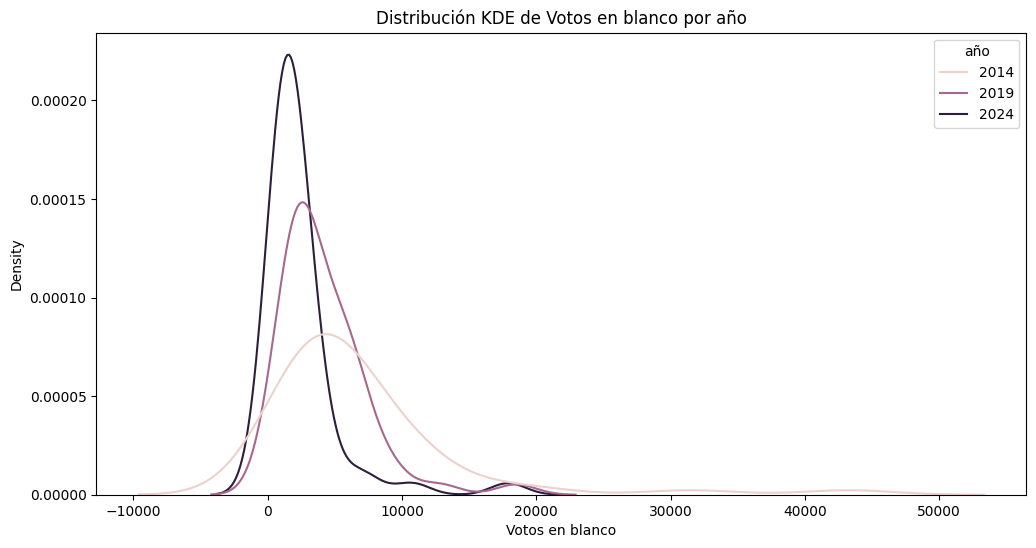

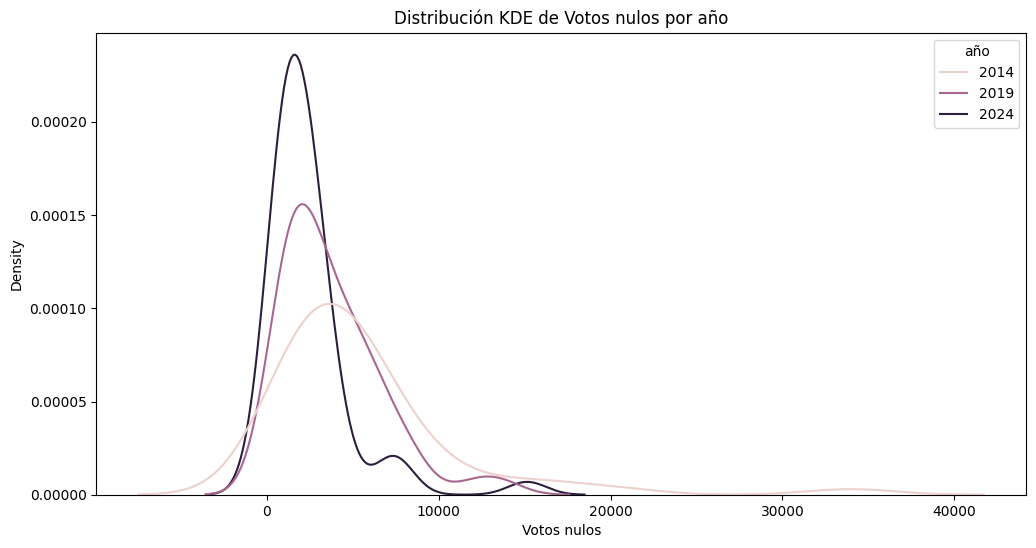

In [67]:
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=votes_df, x=var, hue='año', common_norm=False)
    plt.title(f'Distribución KDE de {var} por año')
    plt.show()

In [68]:
query_show_votos = "SHOW COLUMNS FROM DATOS_PARTIDOS;"
columns_df = pd.read_sql(query_show_votos, con=engine)
print(columns_df)

          Field    Type Null Key Default Extra
0  id_provincia  bigint  YES        None      
1   id_partidos  bigint  YES        None      
2           año  bigint  YES        None      
3         Votos  bigint  YES        None      


In [69]:
query_votos_p = """
SELECT año, Votos FROM DATOS_PARTIDOS;
"""
df_votos_p = pd.read_sql(query_votos_p, con=engine)
df_votos_p.head()

año   Votos
0  2024   22229
1  2024   66047
2  2024  246269
3  2024   92639
4  2024   35504

In [70]:
print("Valores faltantes:")
print(df_votos_p.isnull().sum())

Valores faltantes:
año      0
Votos    0
dtype: int64


In [71]:
pd.set_option('display.float_format', '{:,.0f}'.format)
desc_votos_p = df_votos_p.describe()
desc_votos_p

año     Votos
count 5,460     5,460
mean  2,019    10,033
std       4    44,635
min   2,014         0
25%   2,014        80
50%   2,019       245
75%   2,024     1,407
max   2,024 1,133,898

In [72]:
votos = df_votos_p["Votos"]

asimetria = skew(votos, nan_policy='omit')
curtosis = kurtosis(votos, fisher=True, nan_policy='omit')  

print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis:.4f}")

Asimetría (skew): 11.6710
Curtosis: 199.9948


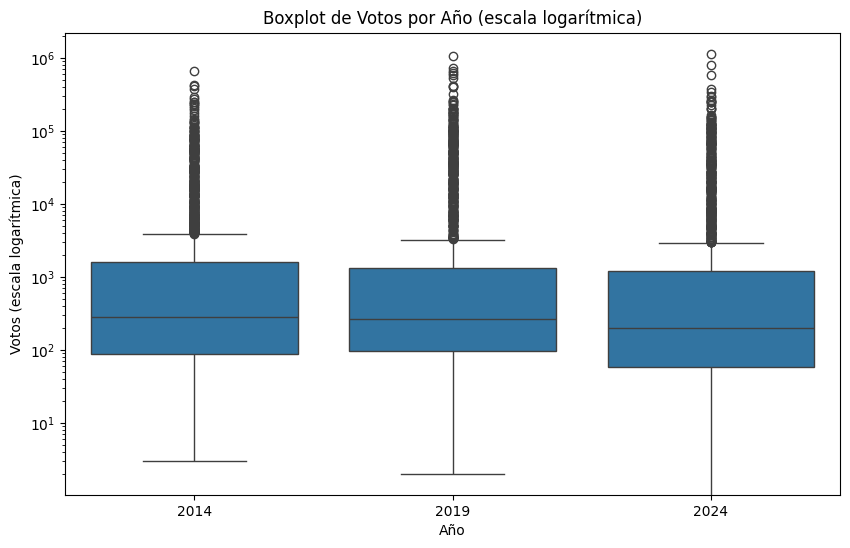

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x='año', y='Votos', data=df_votos_p, showfliers=True)

plt.yscale('log')

plt.title('Boxplot de Votos por Año (escala logarítmica)')
plt.xlabel('Año')
plt.ylabel('Votos (escala logarítmica)')
plt.show()

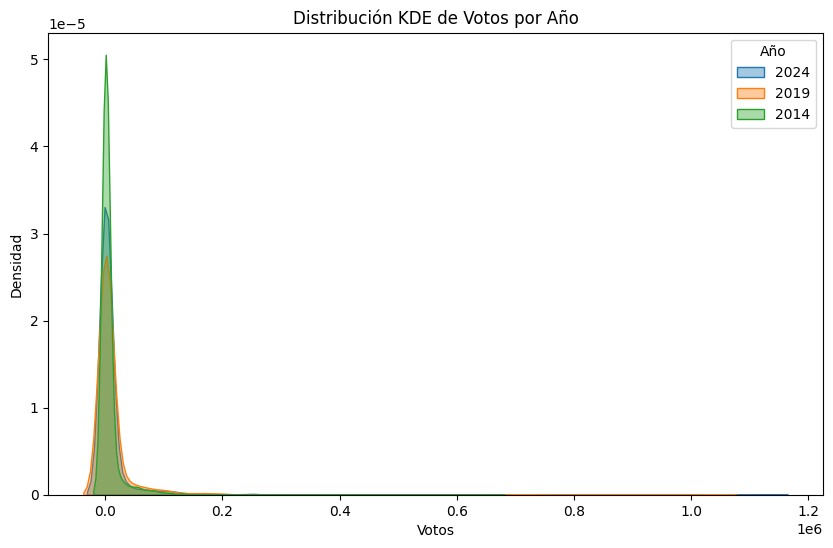

In [74]:
plt.figure(figsize=(10,6))
for year in df_votos_p['año'].unique():
    subset = df_votos_p[df_votos_p['año'] == year]
    sns.kdeplot(subset['Votos'], label=str(year), fill=True, alpha=0.4)

plt.title('Distribución KDE de Votos por Año')
plt.xlabel('Votos')
plt.ylabel('Densidad')
plt.legend(title='Año')
plt.show()

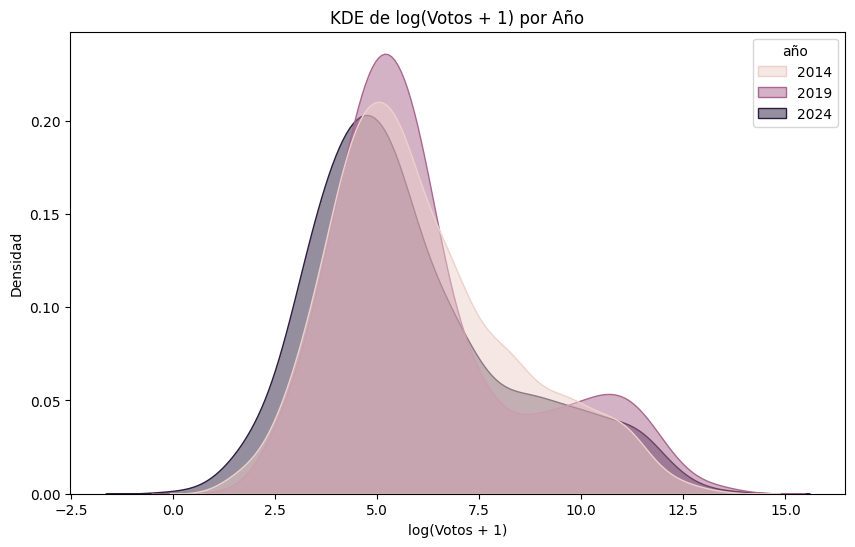

In [75]:

plt.figure(figsize=(10,6))
df_votos_p['log_Votos'] = np.log1p(df_votos_p['Votos'])
sns.kdeplot(data=df_votos_p, x='log_Votos', hue='año', fill=True, common_norm=False, alpha=0.5)

plt.title('KDE de log(Votos + 1) por Año')
plt.xlabel('log(Votos + 1)')
plt.ylabel('Densidad')
plt.show()


In [76]:
query_show_votos = "SHOW COLUMNS FROM PARTIDOS_POLITICOS;"
columns_df = pd.read_sql(query_show_votos, con=engine)
print(columns_df)

         Field    Type Null Key Default Extra
0  id_partidos  bigint  YES        None      
1        Votos    text  YES        None      
2      Escaños  bigint  YES        None      
3        Grupo    text  YES        None      
4          Año  bigint  YES        None      


In [77]:
query = """
SELECT Provincia, `Renta bruta media`, Año
FROM RENTA
WHERE Año IN (2014, 2019)
"""

df_renta = pd.read_sql(query, con=engine)
df_renta.head()

Provincia  Renta bruta media   Año
0   Almería              21399  2019
1     Cádiz              24497  2019
2   Córdoba              21879  2019
3   Granada              23515  2019
4    Huelva              20972  2019

In [78]:
query = """
SELECT 
    p.Año,
    p.id_partidos,
    n.Partido,
    SUM(p.Votos) as total_votos,
    SUM(p.Escaños) as total_escaños
FROM PARTIDOS_POLITICOS p
JOIN NOMBRE_PARTIDOS n ON p.id_partidos = n.id_partido
GROUP BY p.Año, p.id_partidos, n.Partido
ORDER BY p.Año, total_escaños DESC;
"""

df_party = pd.read_sql_query(query, con=engine)


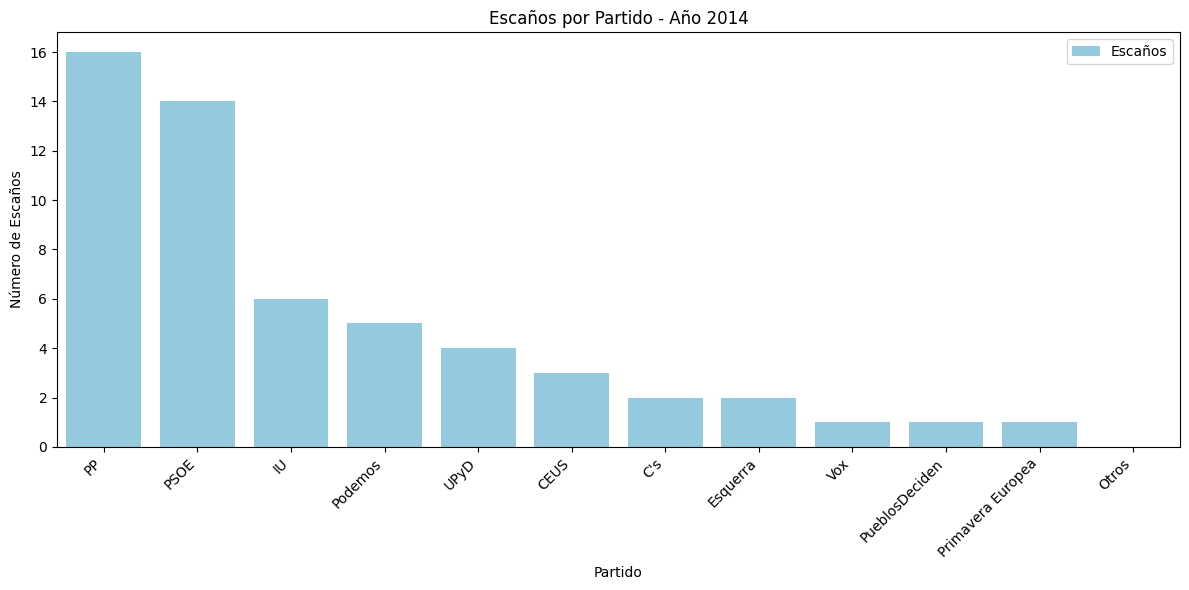

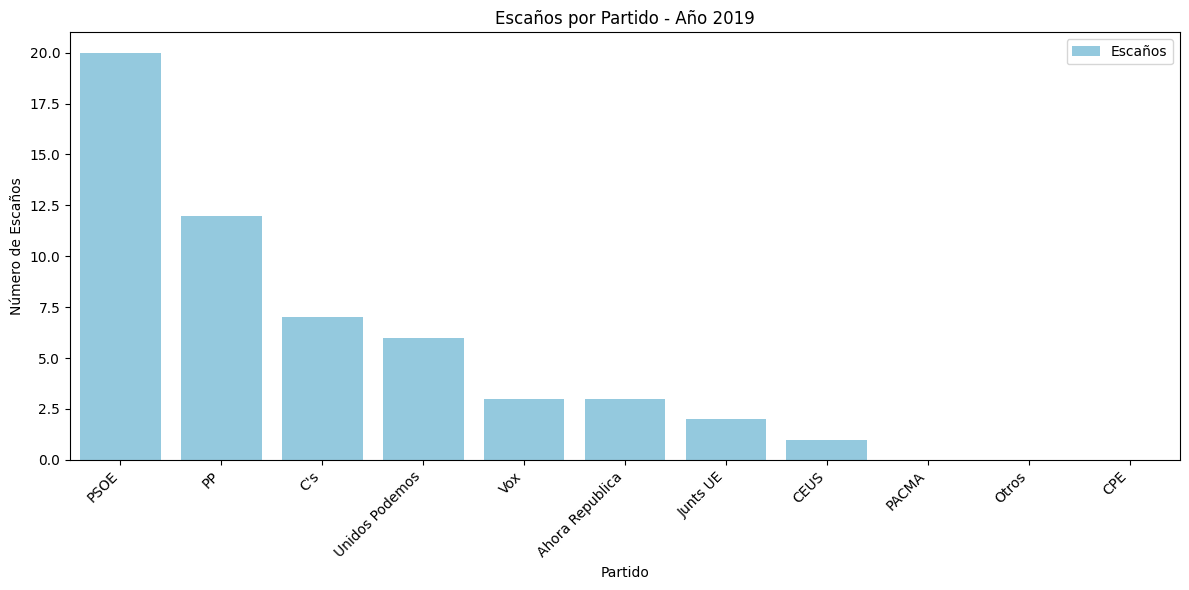

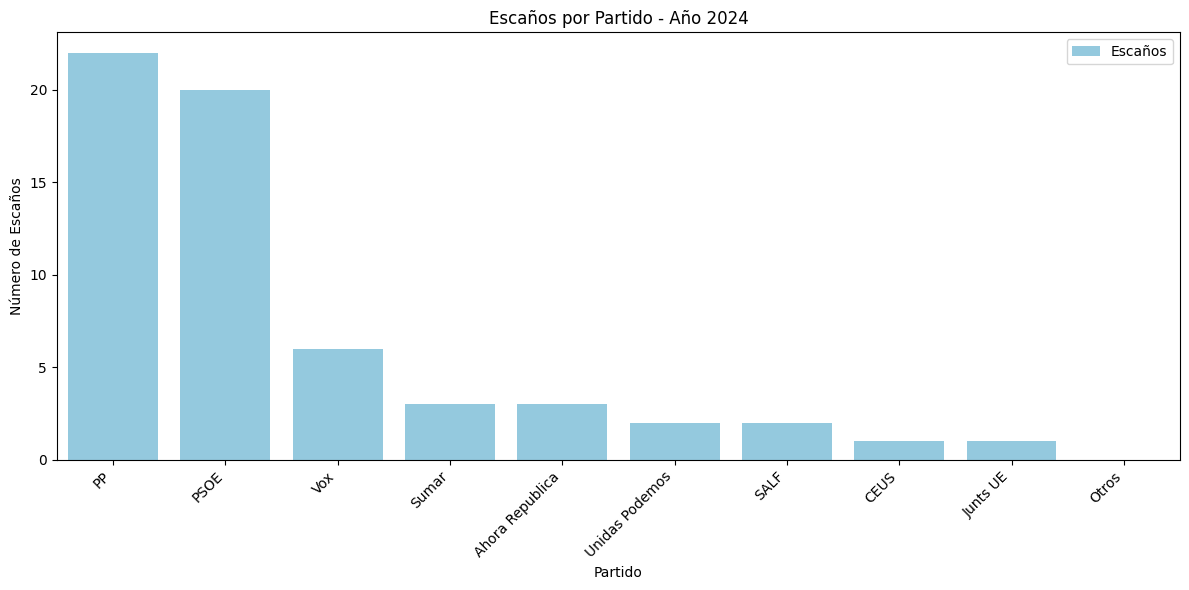

In [79]:
años = df_party["Año"].unique()

for año in años:
    df_año = df_party[df_party["Año"] == año].sort_values(by="total_escaños", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_año, x="Partido", y="total_escaños", color="skyblue", label="Escaños")

    plt.title(f"Escaños por Partido - Año {año}")
    plt.xlabel("Partido")
    plt.ylabel("Número de Escaños")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\Jon\AppData\Local\Temp\ipykernel_9812\2213472604.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2014, x='Provincia', y='Renta bruta media', palette=palette_2014)


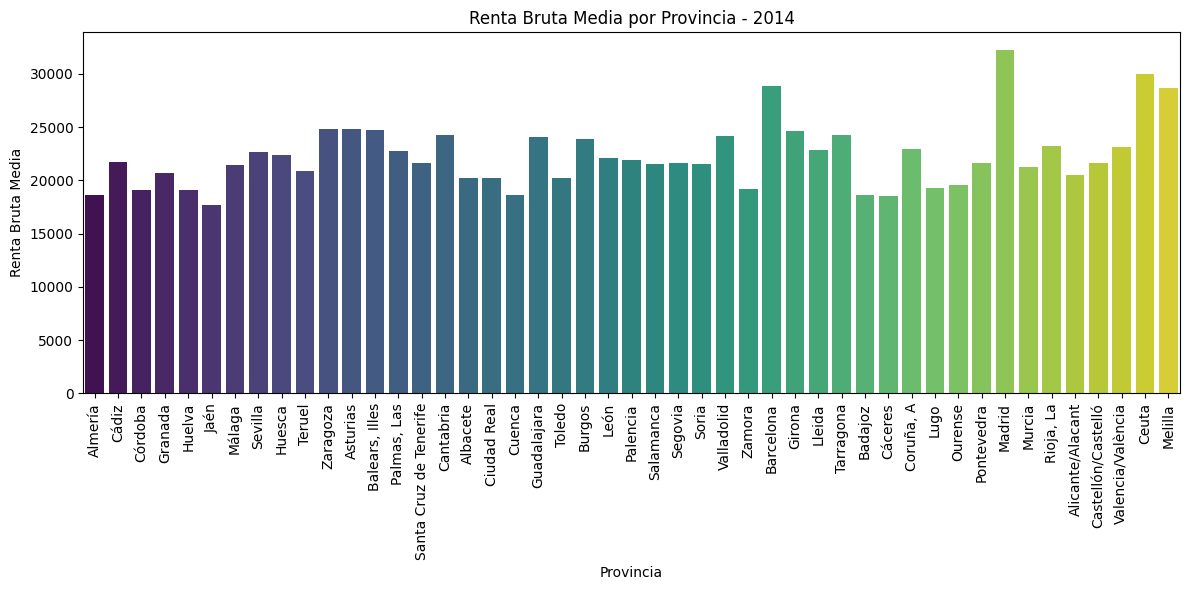

C:\Users\Jon\AppData\Local\Temp\ipykernel_9812\2213472604.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_2019, x='Provincia', y='Renta bruta media', palette=palette_2019)


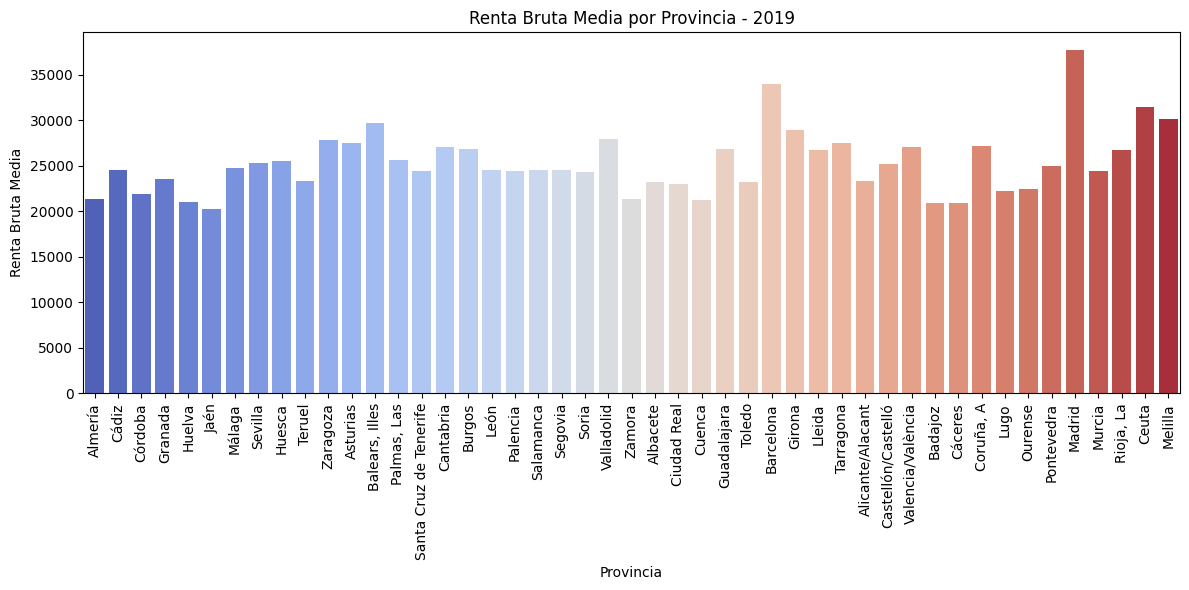

In [80]:
df_2014 = df_renta[df_renta['Año'] == 2014]
df_2019 = df_renta[df_renta['Año'] == 2019]
palette_2014 = sns.color_palette("viridis", len(df_2014))
palette_2019 = sns.color_palette("coolwarm", len(df_2019))


plt.figure(figsize=(12, 6))
sns.barplot(data=df_2014, x='Provincia', y='Renta bruta media', palette=palette_2014)
plt.title('Renta Bruta Media por Provincia - 2014')
plt.xticks(rotation=90)
plt.ylabel('Renta Bruta Media')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_2019, x='Provincia', y='Renta bruta media', palette=palette_2019)
plt.title('Renta Bruta Media por Provincia - 2019')
plt.xticks(rotation=90)
plt.ylabel('Renta Bruta Media')
plt.xlabel('Provincia')
plt.tight_layout()
plt.show()


In [81]:
query_b = """
SELECT 
    pa.año,
    p.`Nombre de provincia`,
    SUM(pa.`Paro absoluto`) AS suma_paro_absoluto,
    AVG(pa.`Paro normalizado`) AS promedio_paro_normalizado
FROM PARO pa
JOIN PROVINCIA p ON pa.id_provincia = p.id_provincia
WHERE pa.año IN (2014, 2019)
GROUP BY pa.año, p.`Nombre de provincia`
ORDER BY pa.año, p.`Nombre de provincia`;
"""

rents = pd.read_sql_query(query_b, con=engine)
rents.head()


año             Nombre de provincia  suma_paro_absoluto  \
0  2014  A Coruña                                     1,072   
1  2014  Albacete                                       559   
2  2014  Alicante / Alacant                           1,467   
3  2014  Almería                                        779   
4  2014  Araba - Álava                                  543   

   promedio_paro_normalizado  
0                         94  
1                        140  
2                         79  
3                        113  
4                        170

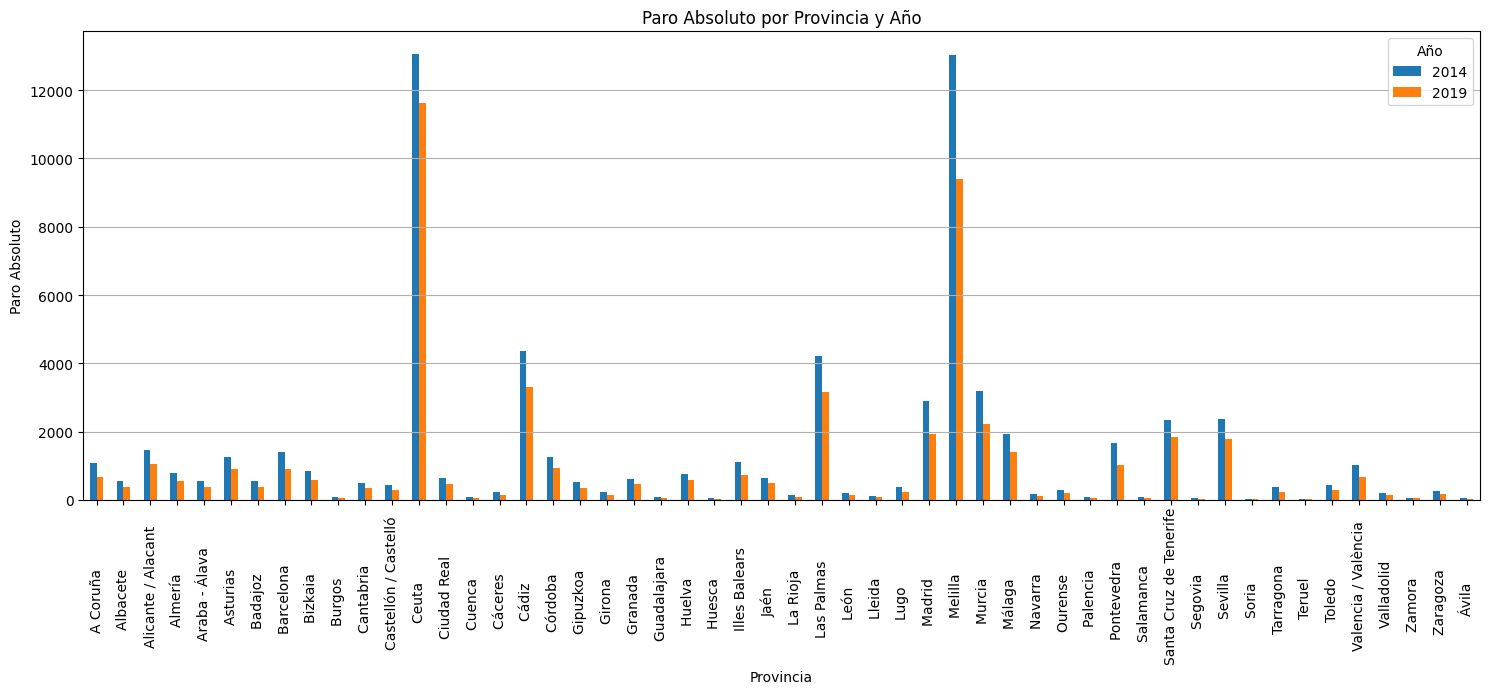

In [82]:
df_pivot = rents.pivot(index='Nombre de provincia', columns='año', values='suma_paro_absoluto')

ax = df_pivot.plot(kind='bar', figsize=(15, 7))

ax.set_title('Paro Absoluto por Provincia y Año')
ax.set_xlabel('Provincia')
ax.set_ylabel('Paro Absoluto')
ax.grid(axis='y')

# Etiquetas en vertical, centradas y con padding 0
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', va='top')
ax.tick_params(axis='x', pad=0)

# Bajar etiquetas manualmente para que queden pegadas al eje X
for label in ax.get_xticklabels():
    label.set_y(0.07)  # prueba con valores negativos pequeños para bajarlas

plt.legend(title='Año')
plt.tight_layout()
plt.show()

In [83]:
query = """
SELECT
    v.id_provincia,
    p.`Nombre de Provincia`,
    v.año,
    v."Total censo electoral",
    v."Total votantes",
    v."Votos en blanco",
    v."Votos nulos",
    (v."Total votantes" - v."Votos en blanco" - v."Votos nulos") AS votos_validos,
    ROUND(100.0 * (v."Total votantes" - v."Votos en blanco" - v."Votos nulos") / v."Total votantes", 2) AS pct_validos,
    ROUND(100.0 * v."Votos en blanco" / v."Total votantes", 2) AS pct_blancos,
    ROUND(100.0 * v."Votos nulos" / v."Total votantes", 2) AS pct_nulos
FROM VOTOS_PROVINCIA v
JOIN PROVINCIA p ON v.id_provincia = p.id_provincia
ORDER BY v.id_provincia, v.año;
"""

dfa = pd.read_sql_query(query, con=engine)

dfa.head()

id_provincia             Nombre de Provincia   año  Total censo electoral  \
0             1  Araba - Álava                   2014                 248665   
1             1  Araba - Álava                   2019                 252209   
2             1  Araba - Álava                   2024                 254452   
3             2  Albacete                        2014                 305232   
4             2  Albacete                        2019                 303596   

   Total votantes  Votos en blanco  Votos nulos  votos_validos  pct_validos  \
0          108262             1717         2007         104538           97   
1          162487             1464         1252         159771           98   
2          126816              629          676         125511           99   
3          145785             3587         3290         138908           95   
4          207171             2182         2100         202889           98   

   pct_blancos  pct_nulos  
0            2          2  
1            1          1  
2            0          1  
3            2          2  
4            1          1

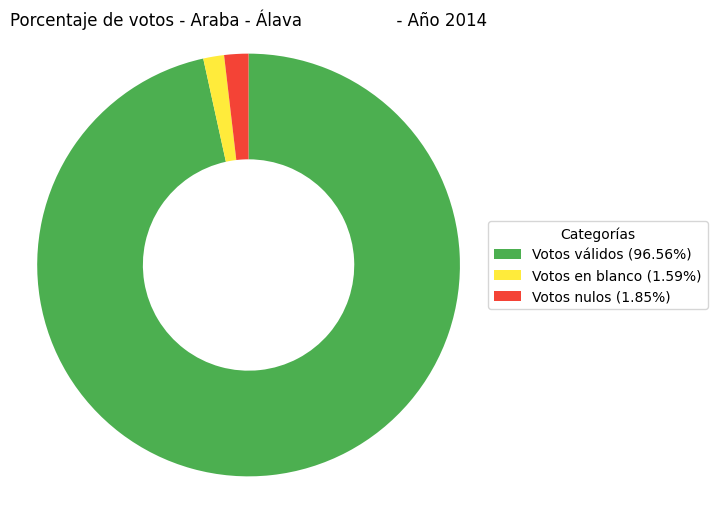

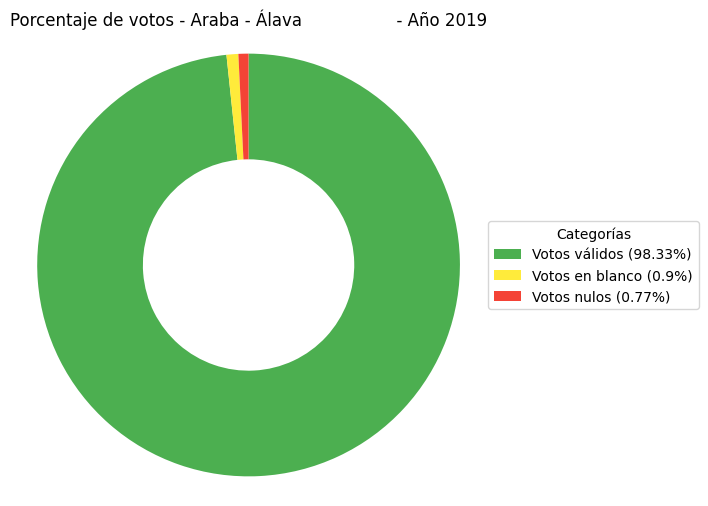

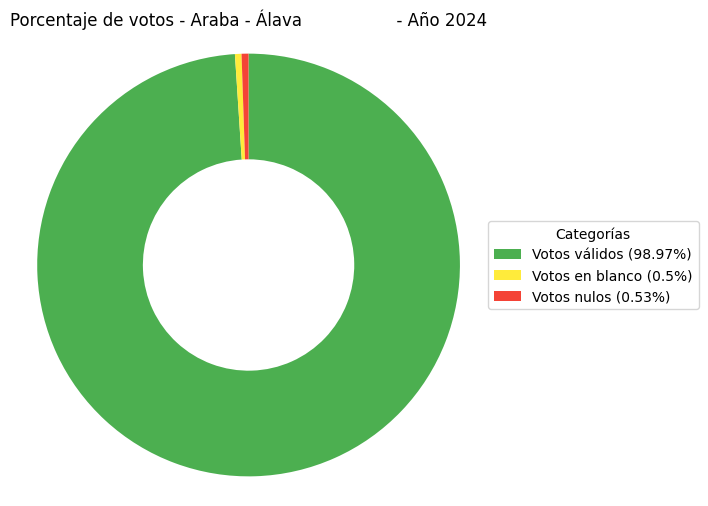

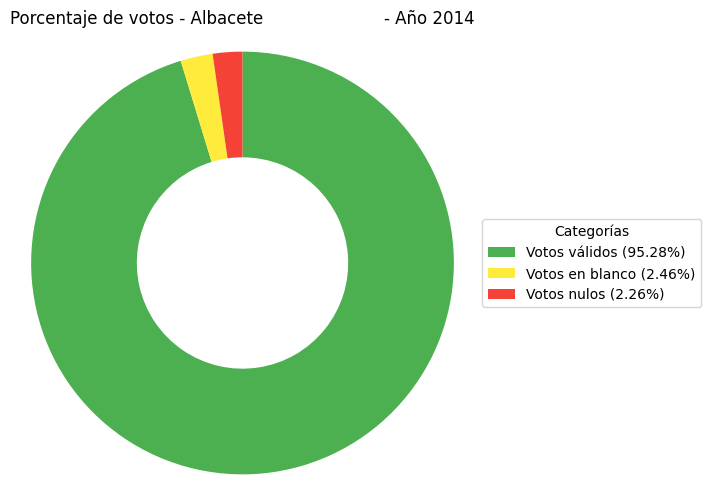

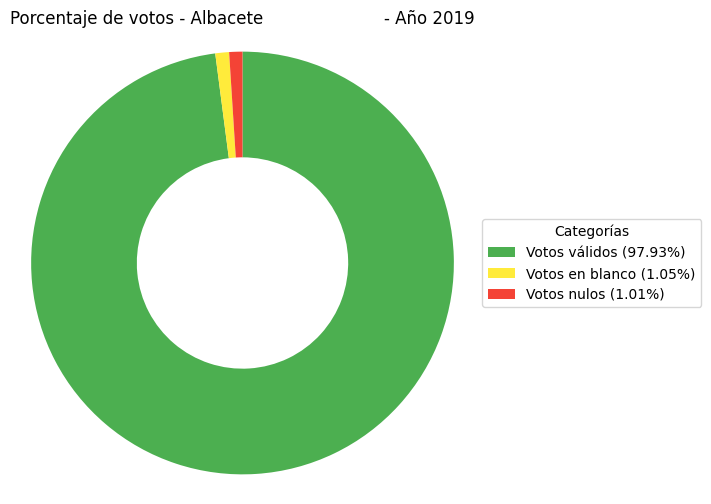

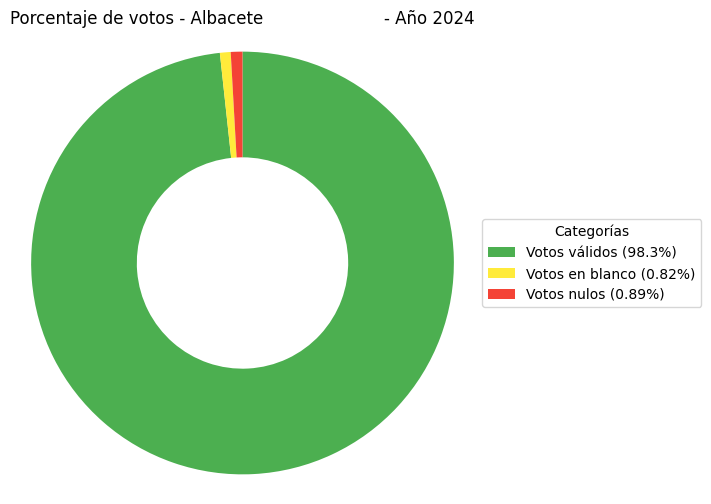

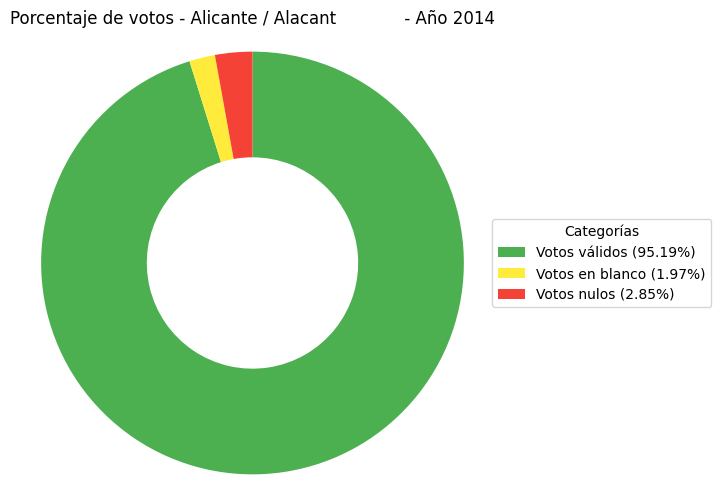

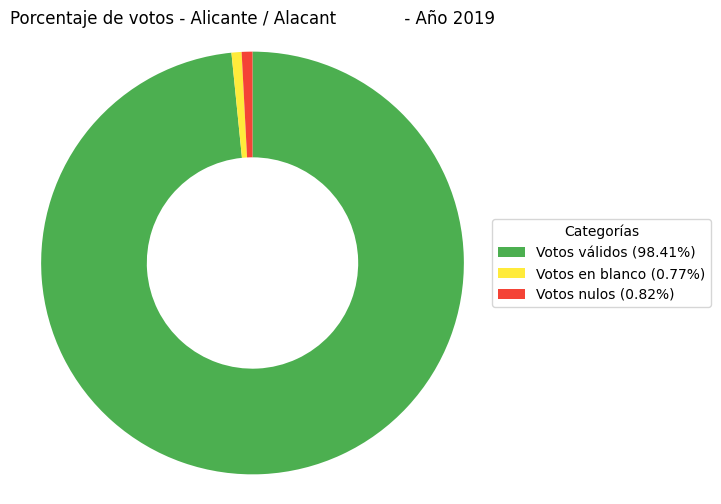

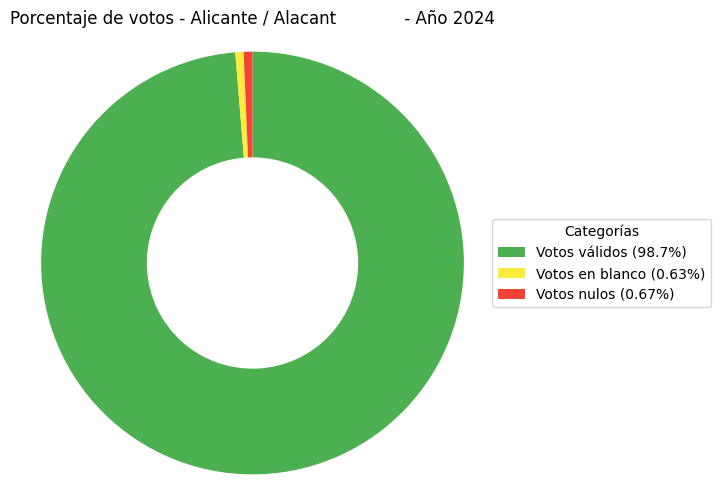

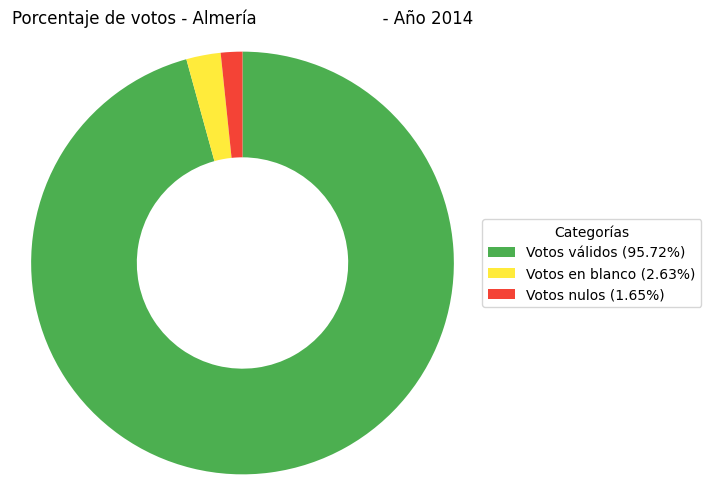

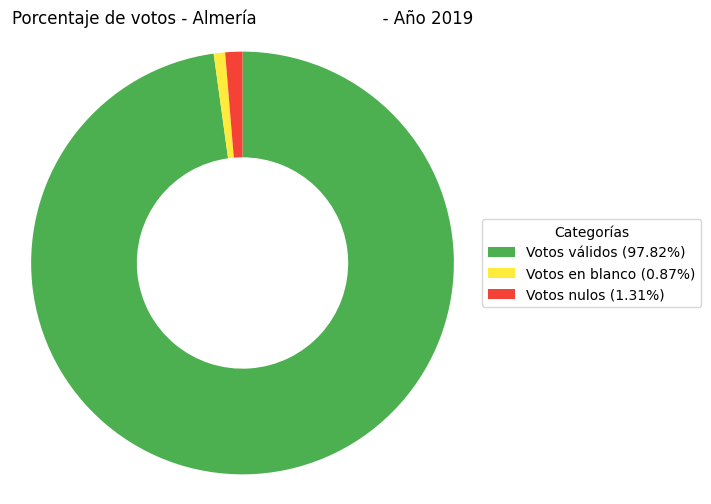

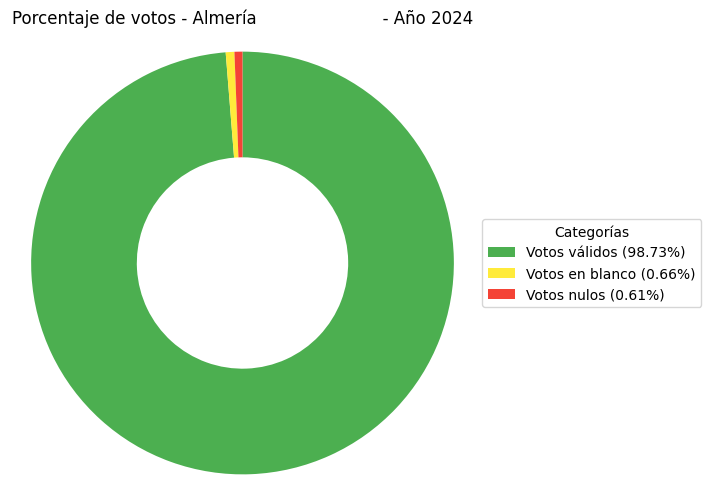

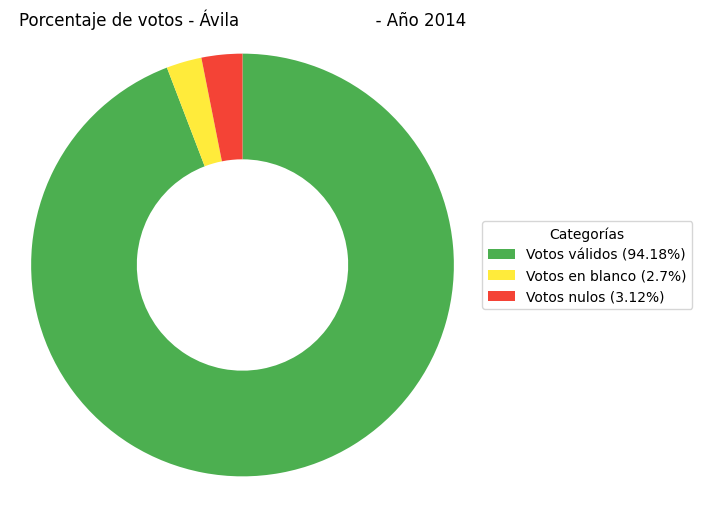

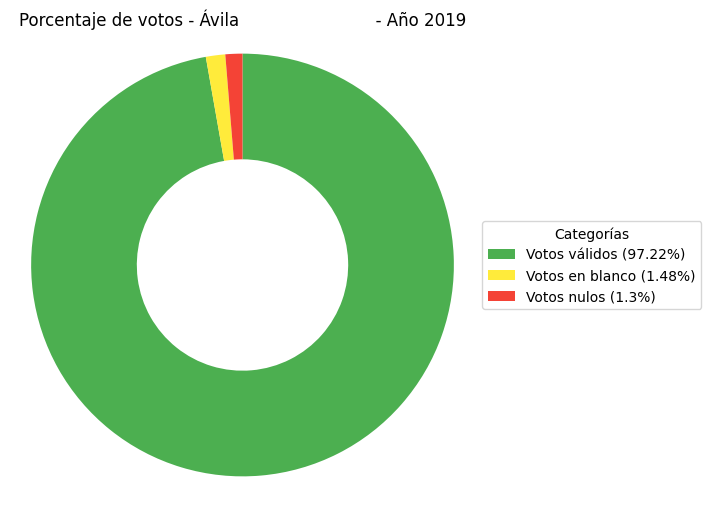

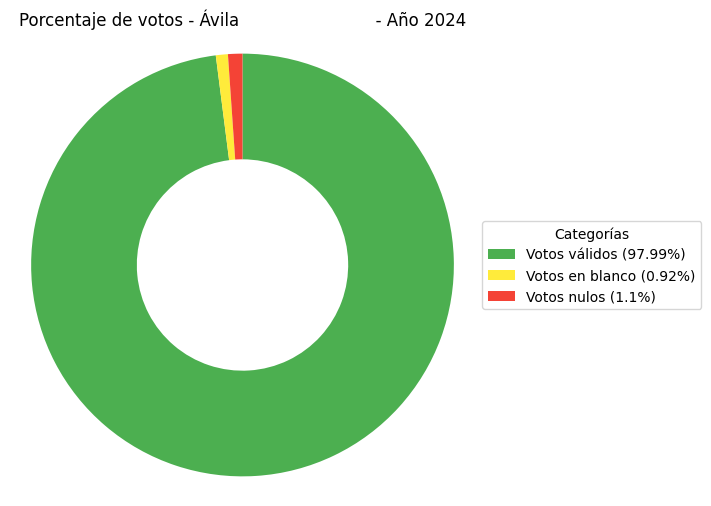

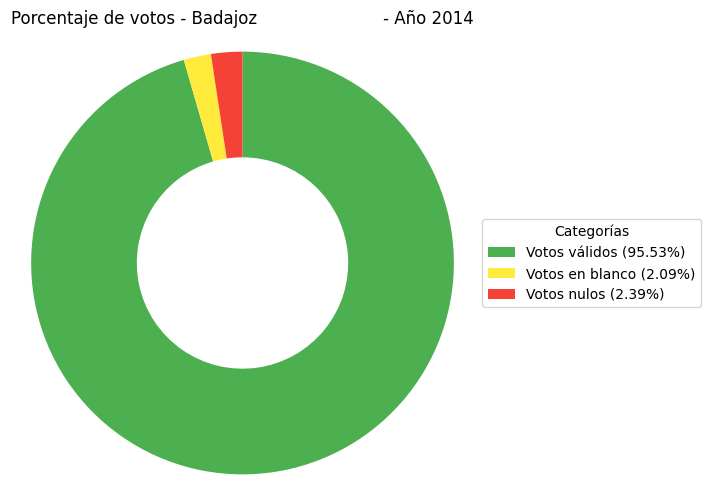

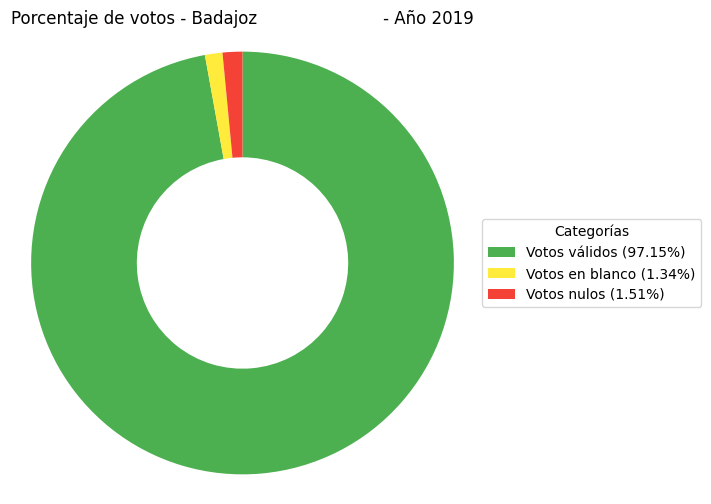

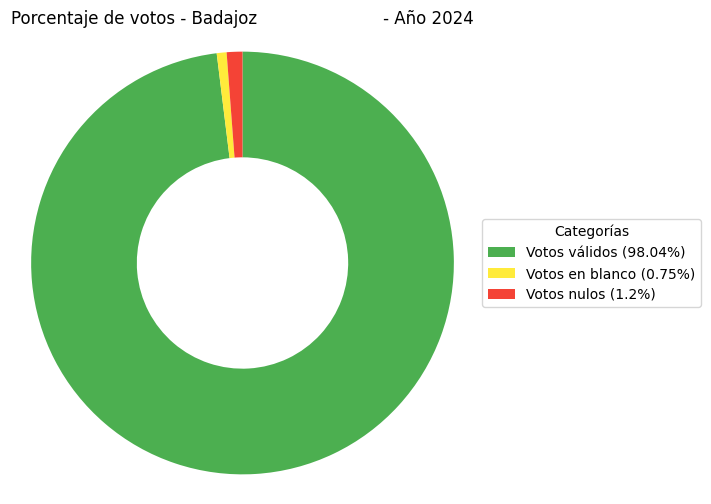

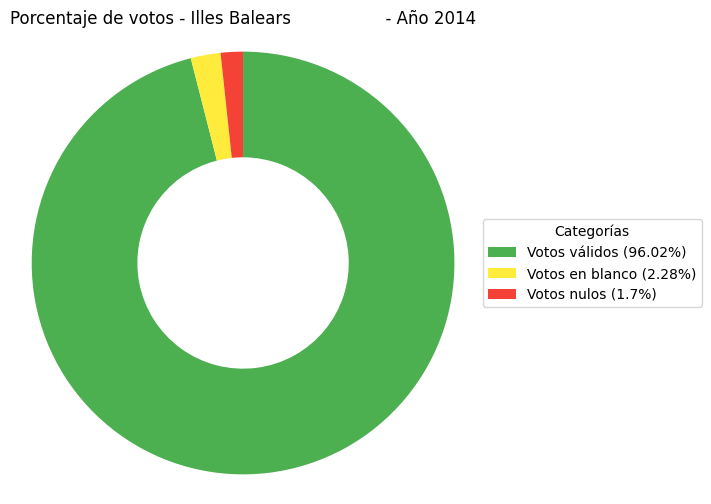

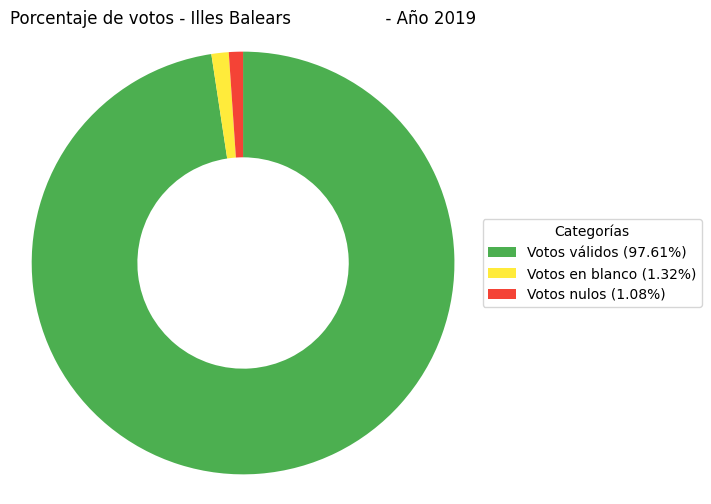

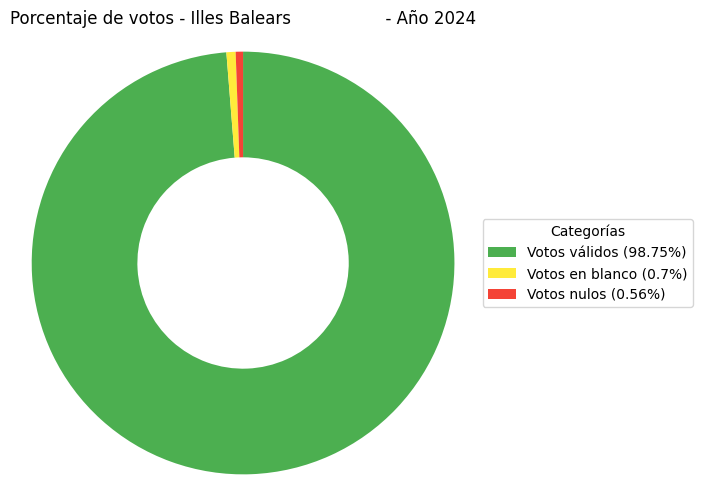

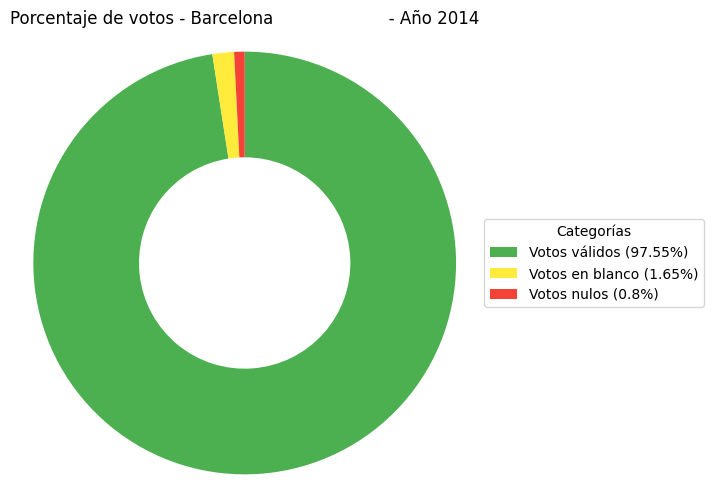

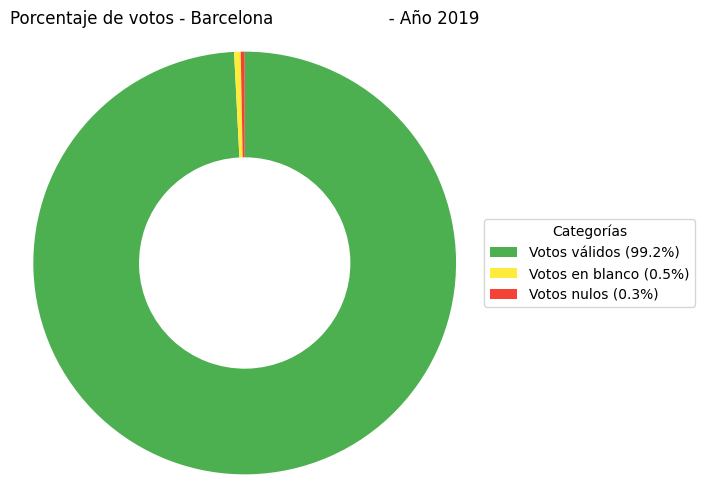

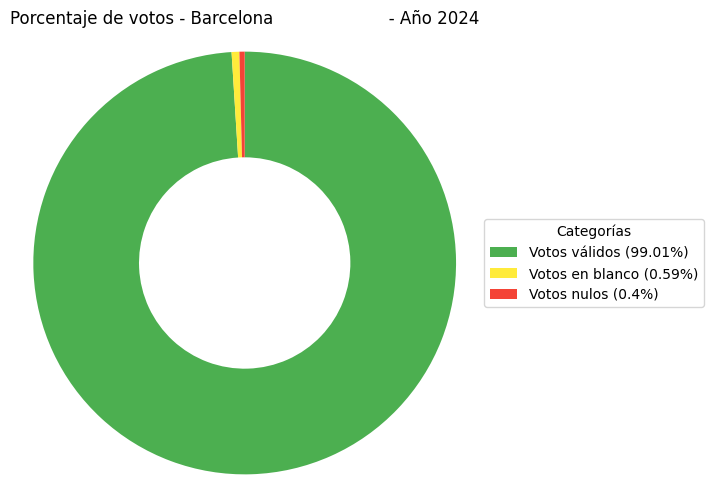

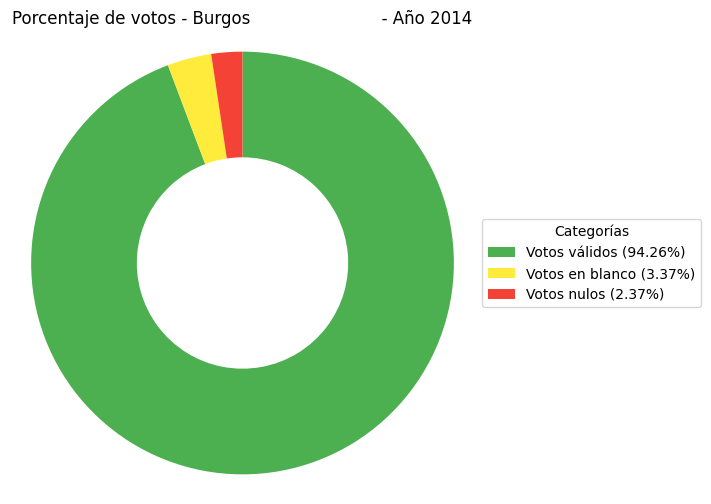

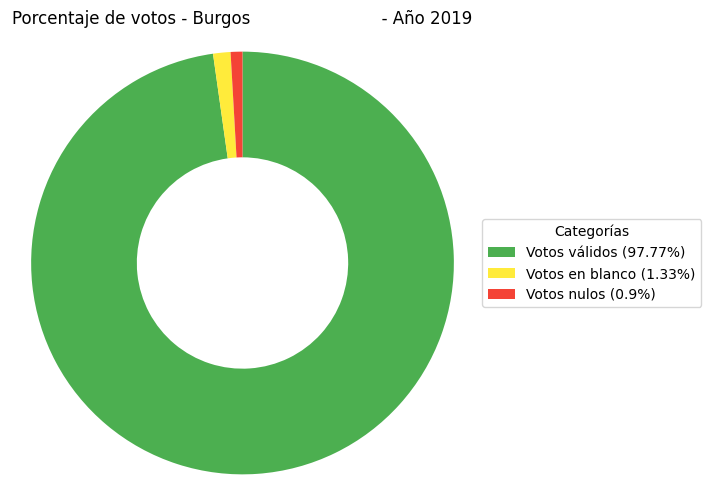

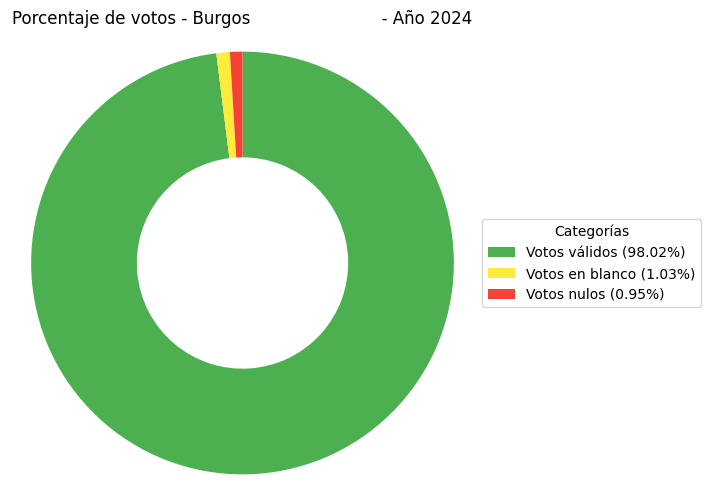

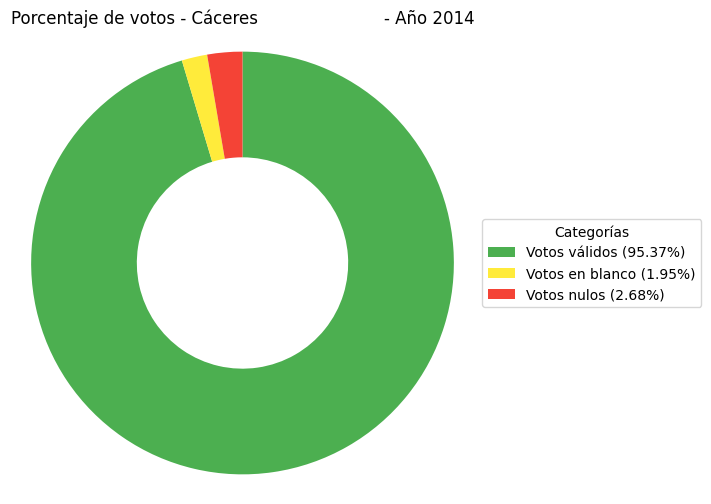

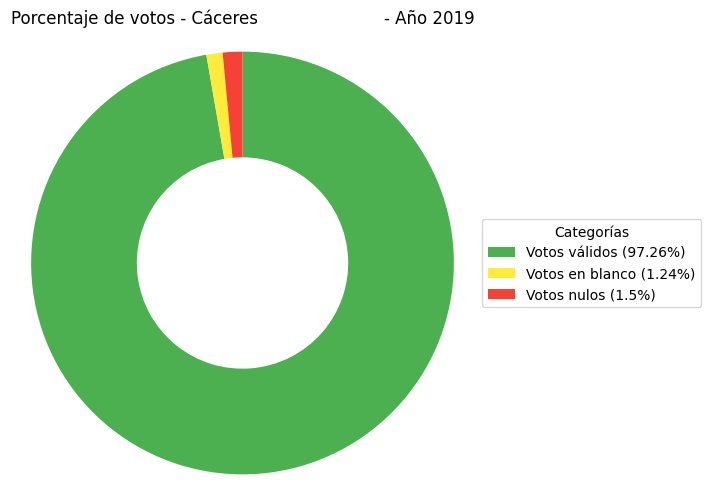

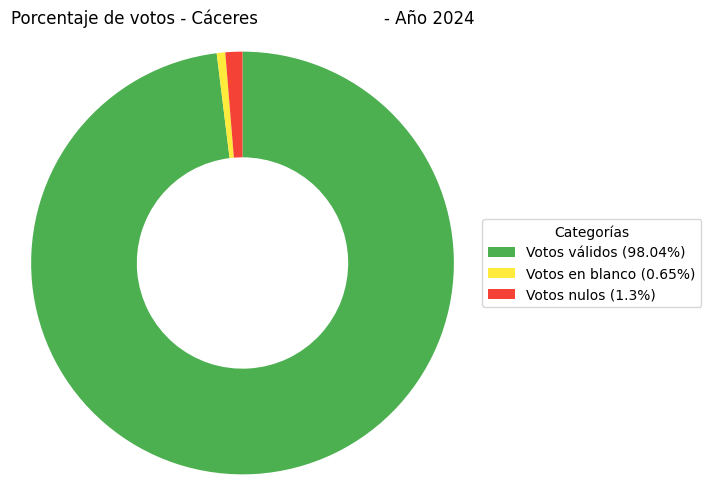

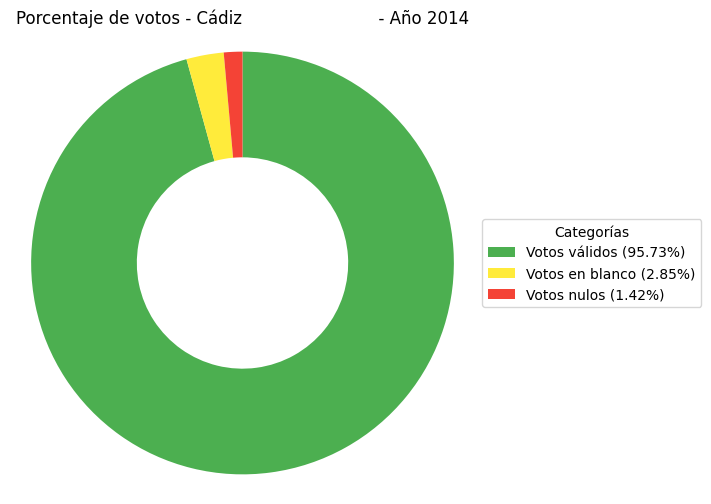

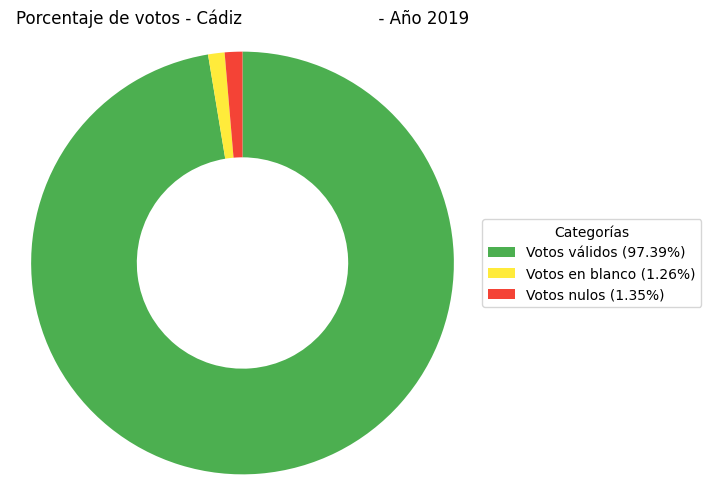

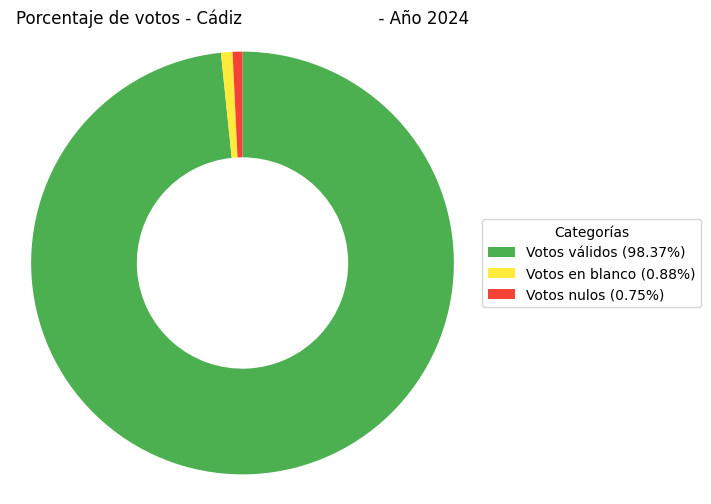

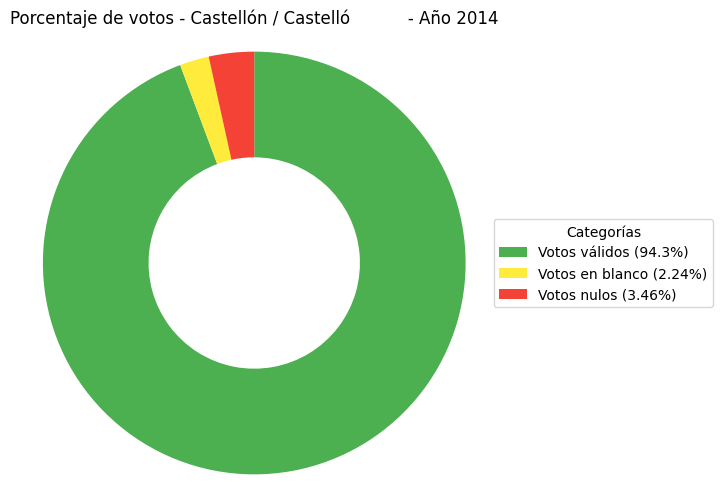

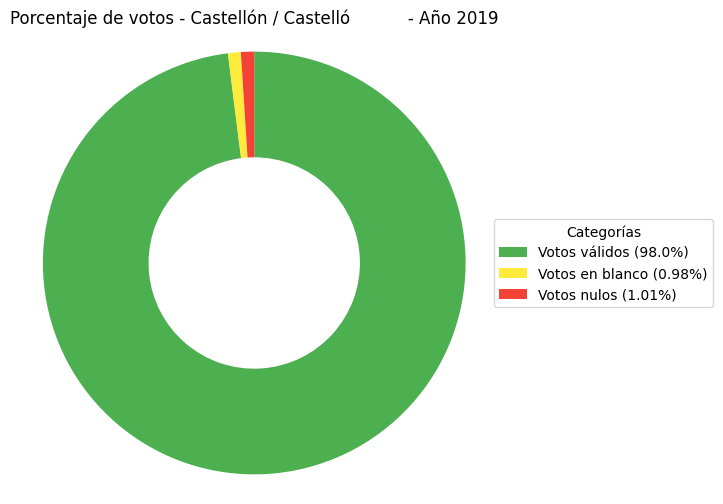

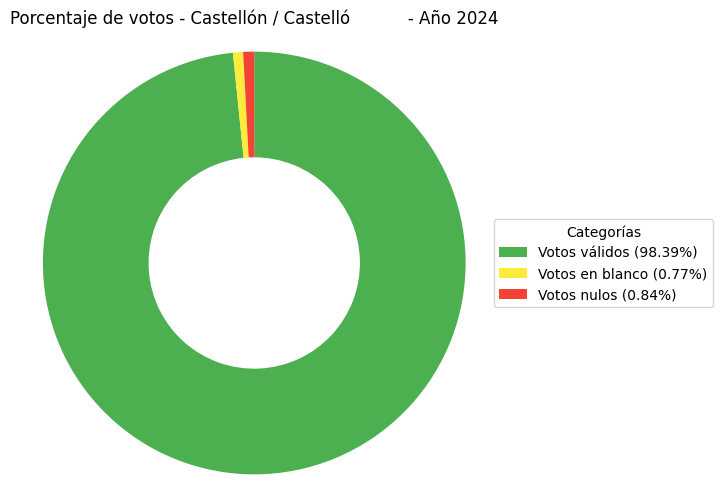

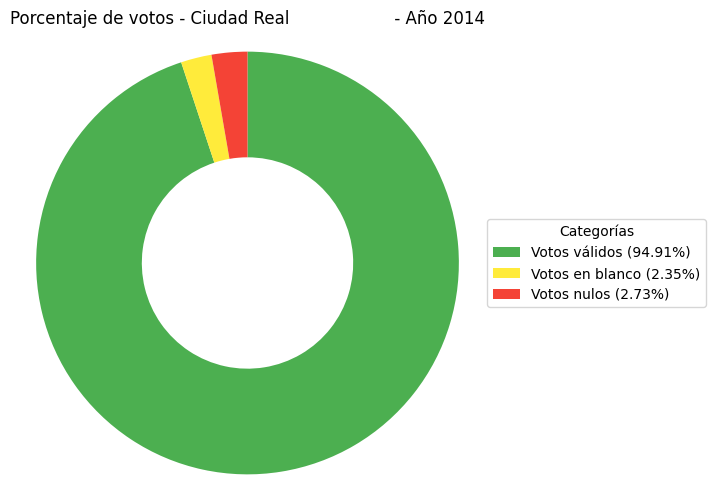

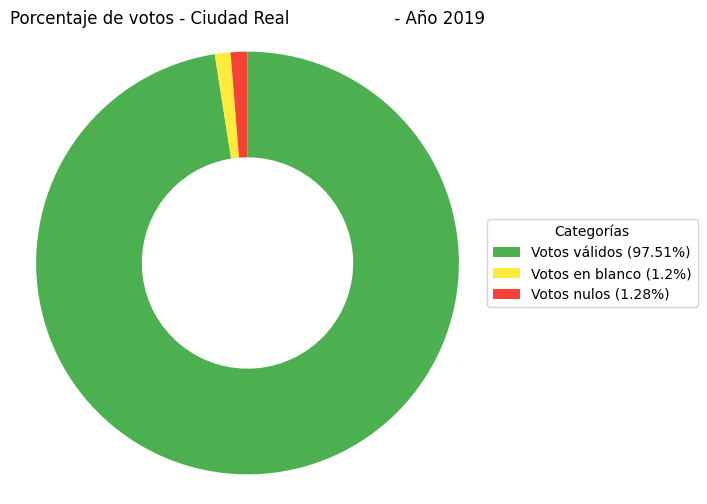

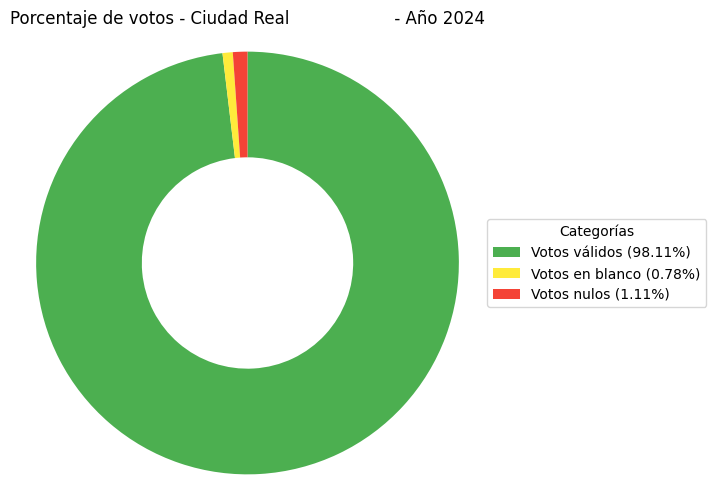

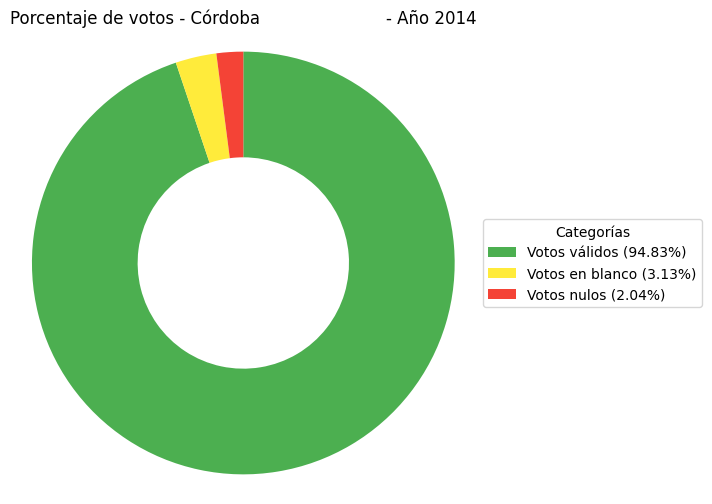

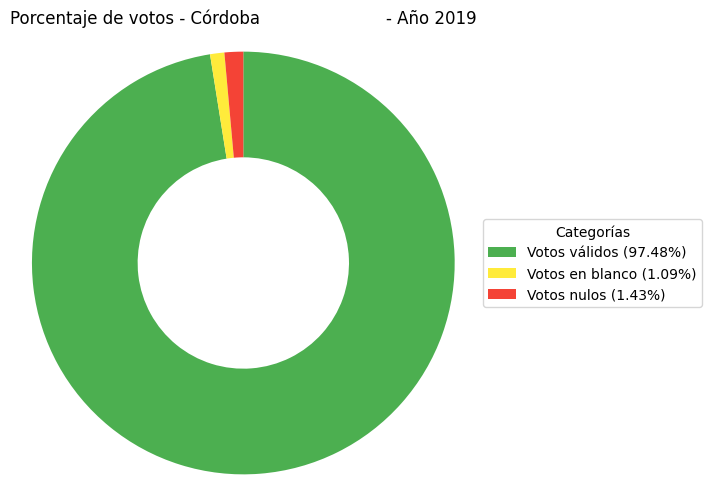

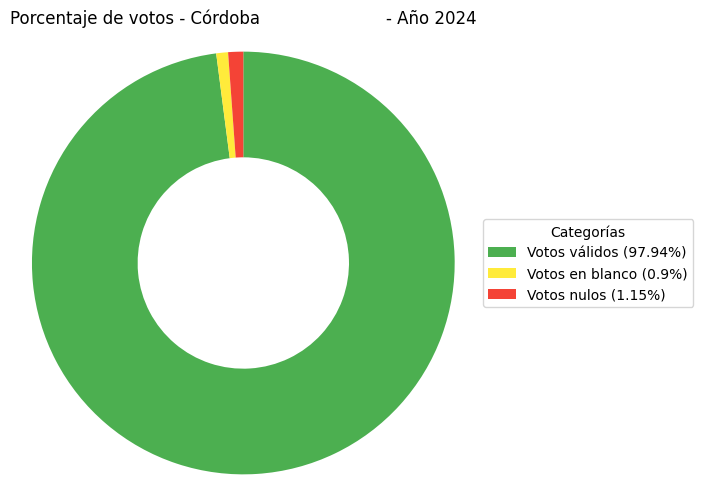

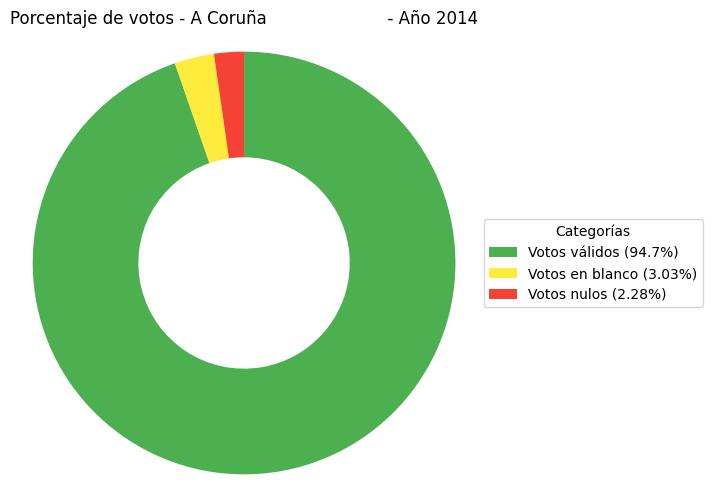

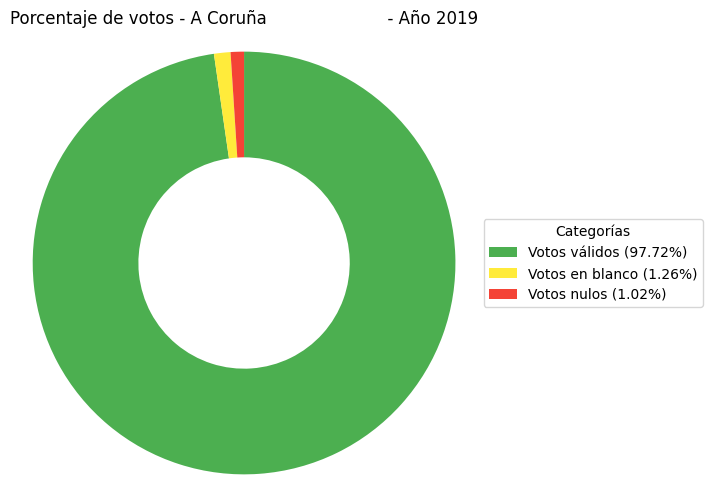

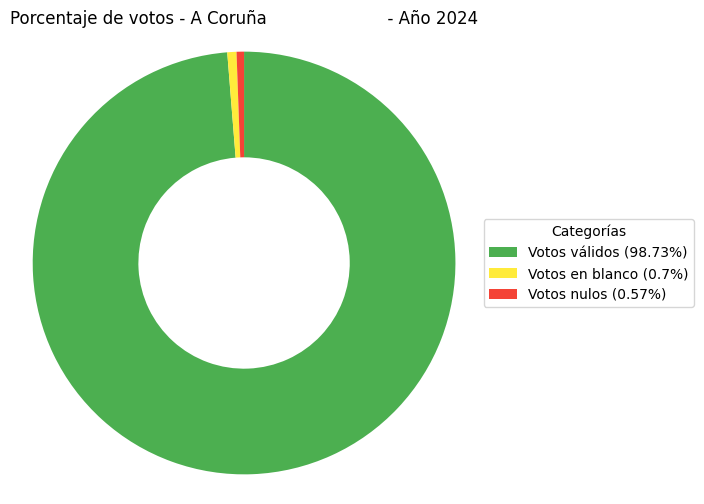

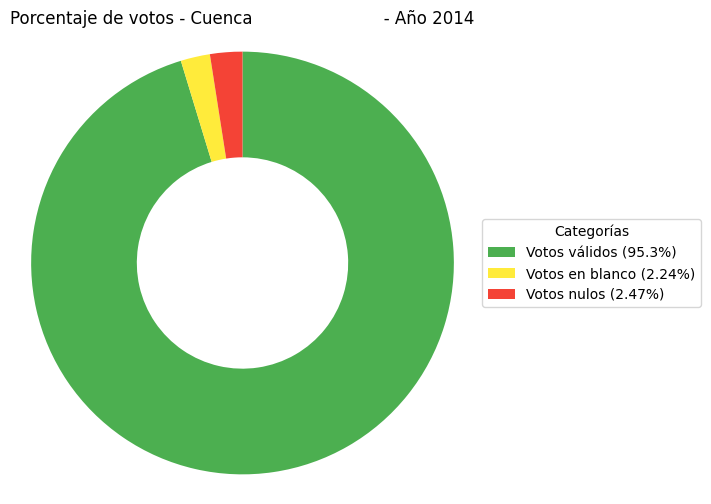

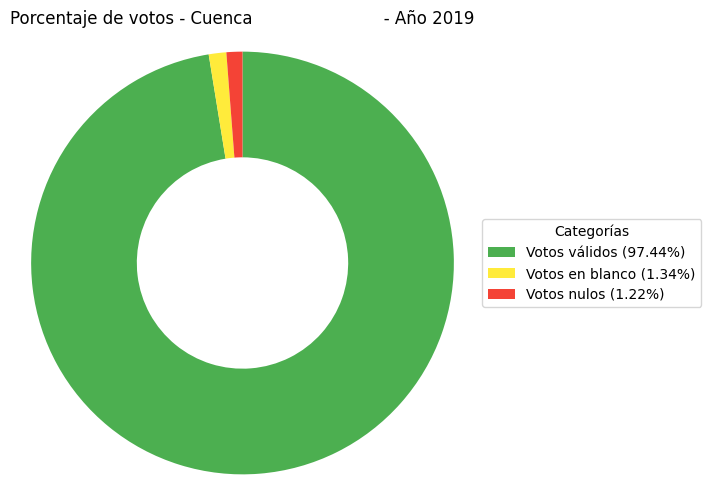

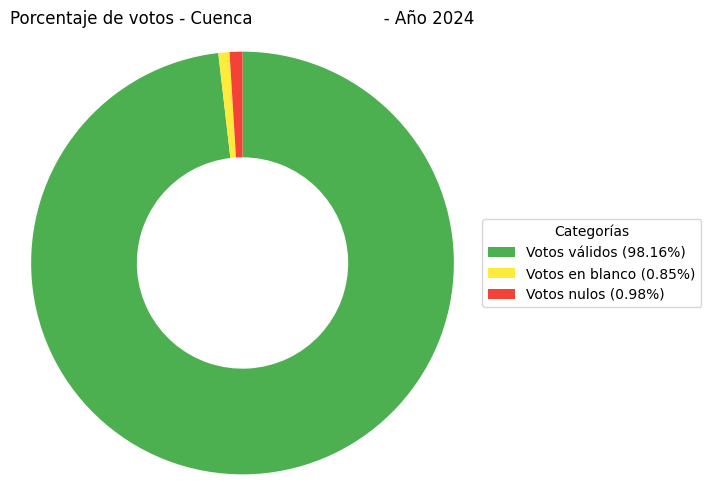

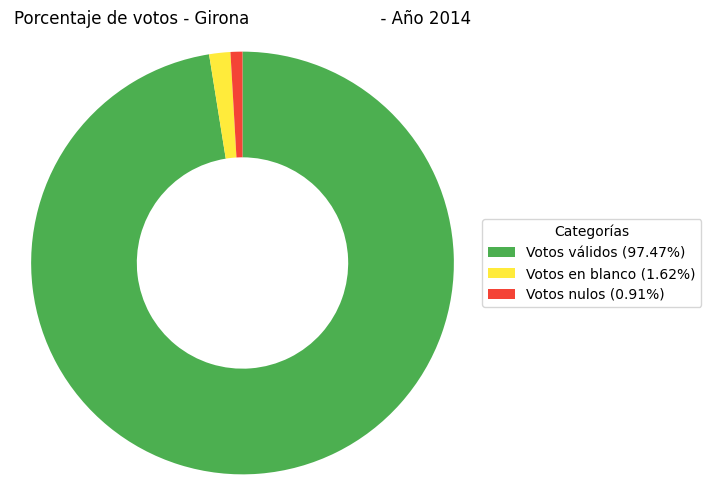

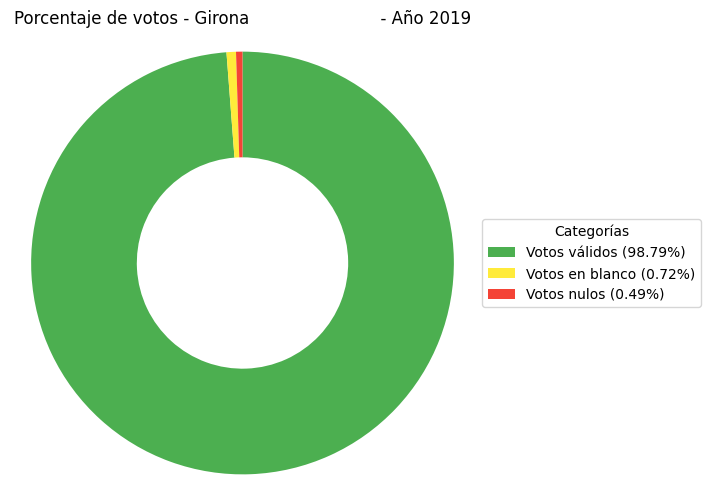

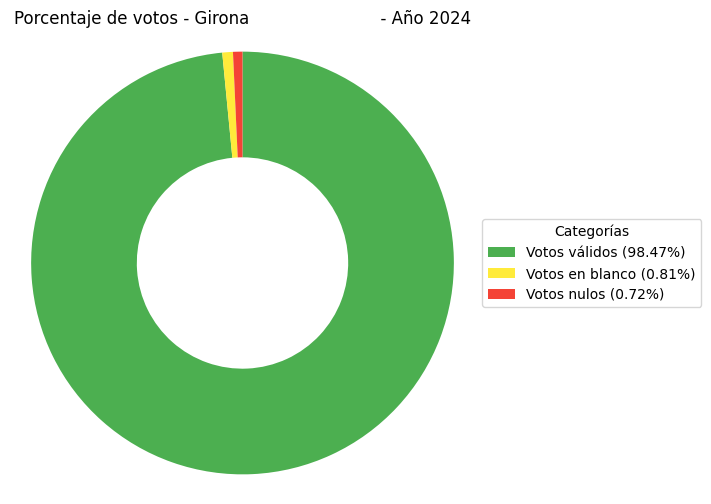

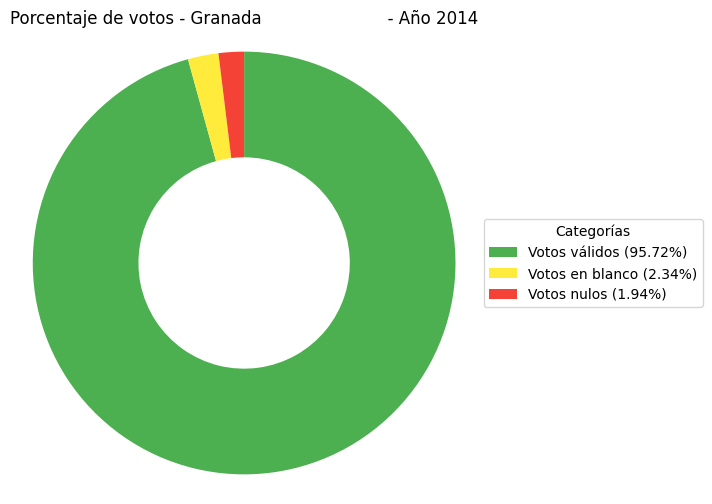

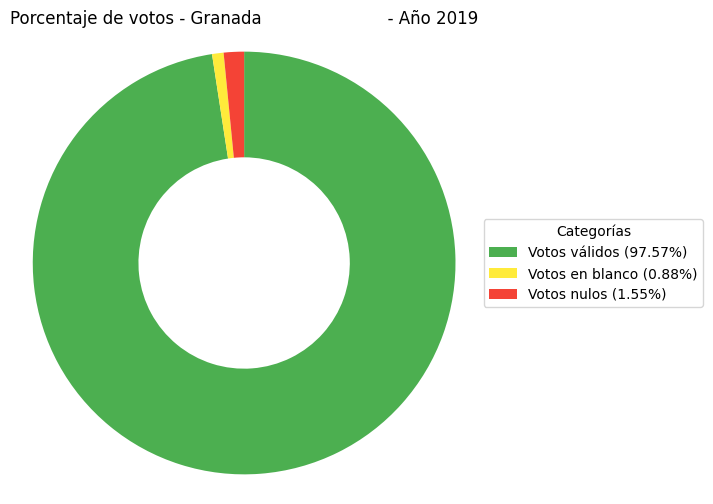

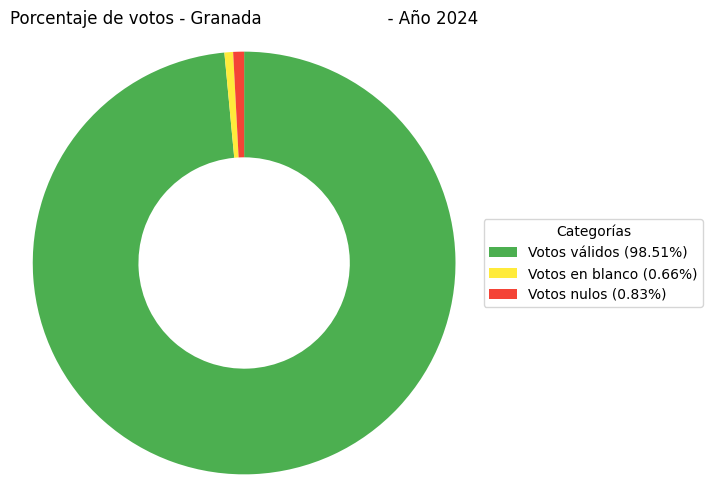

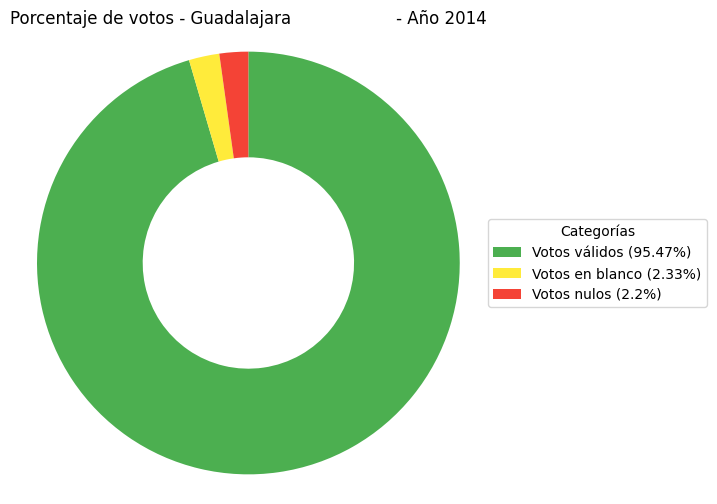

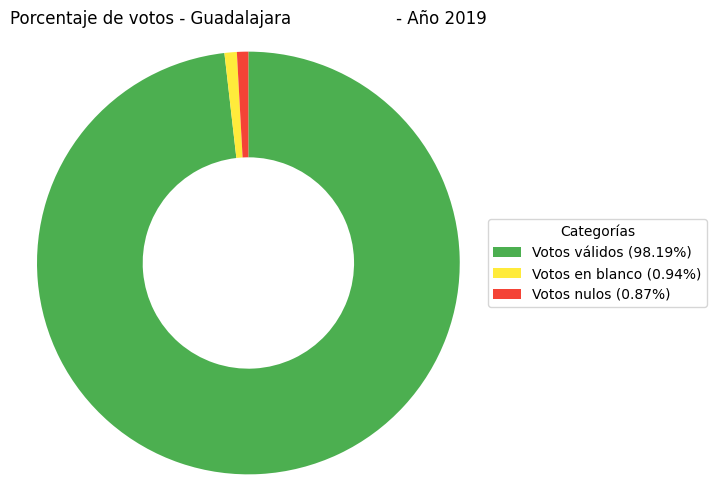

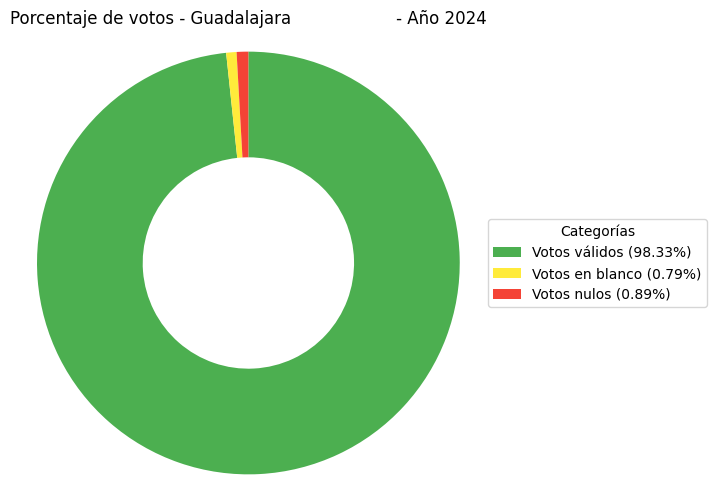

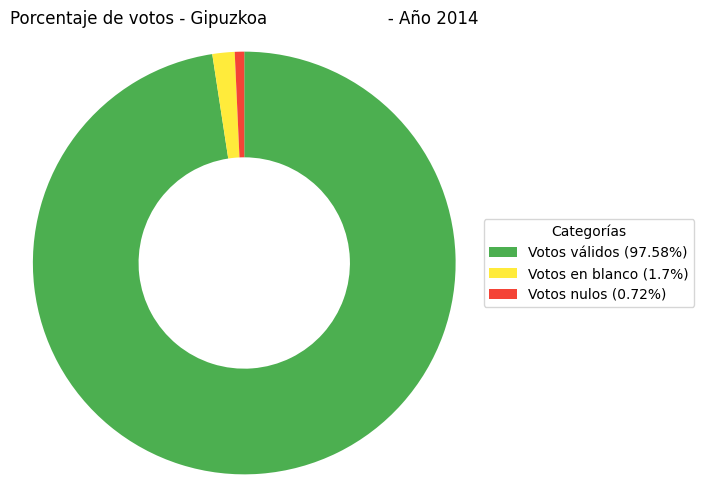

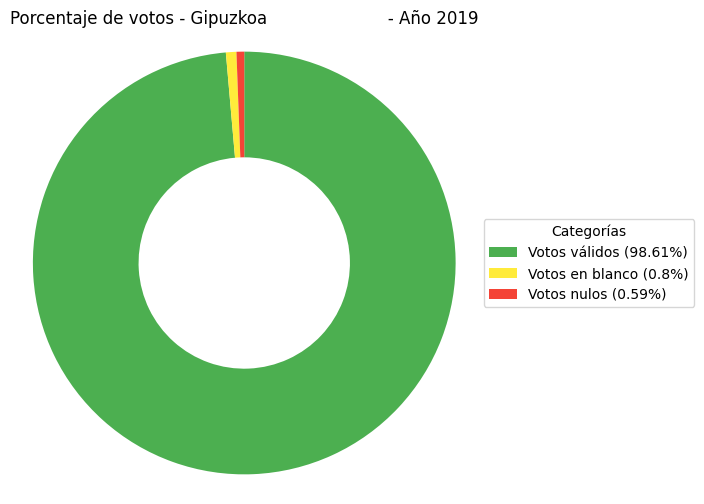

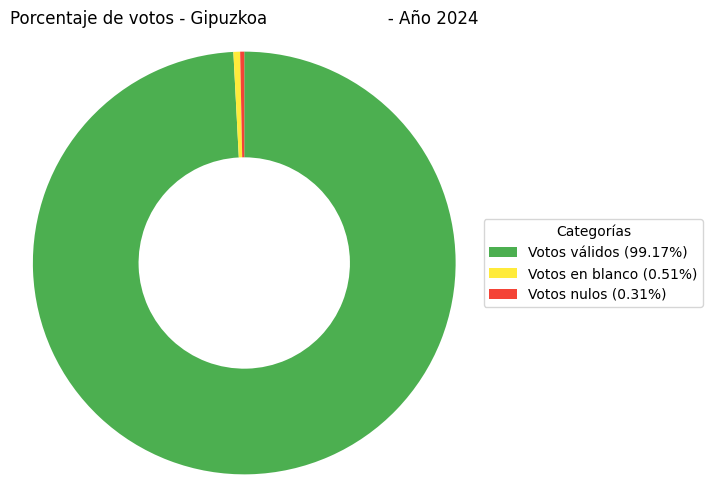

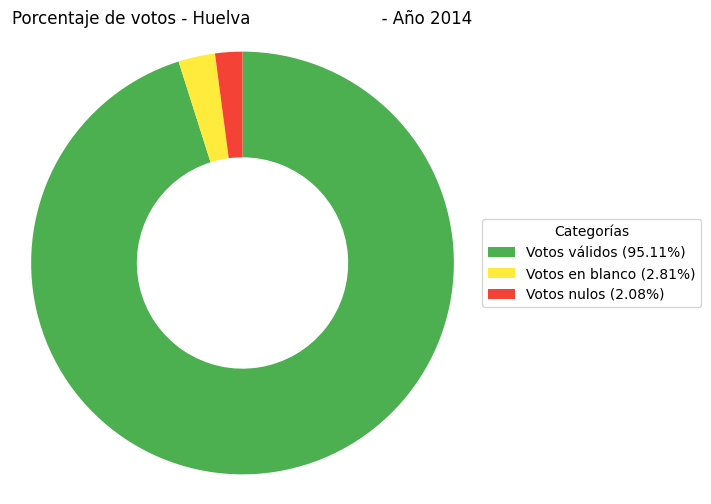

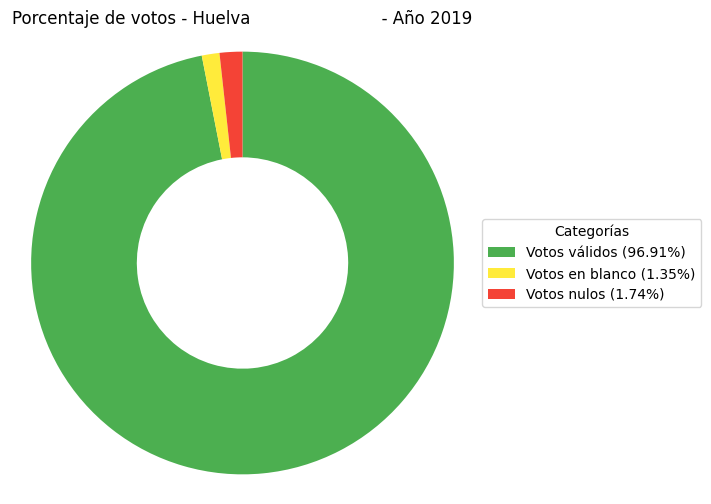

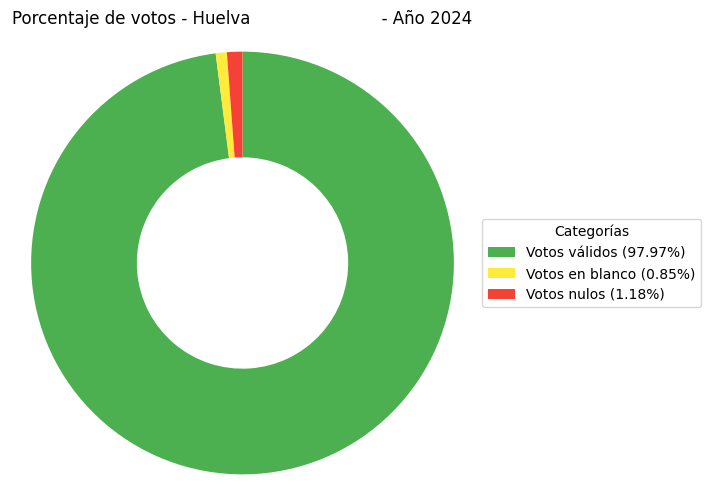

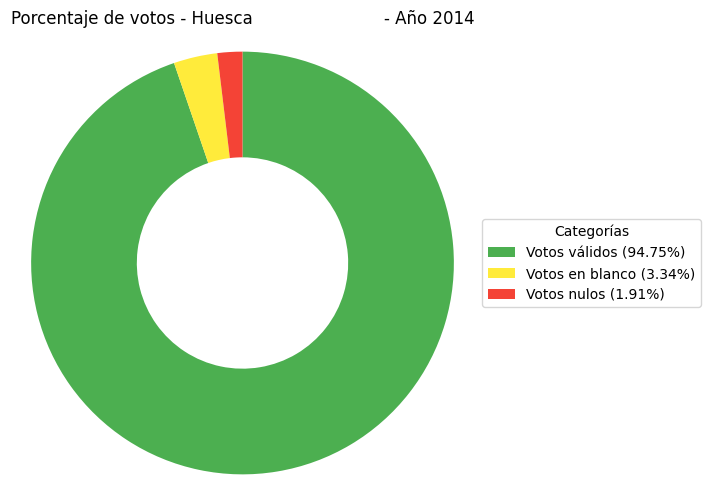

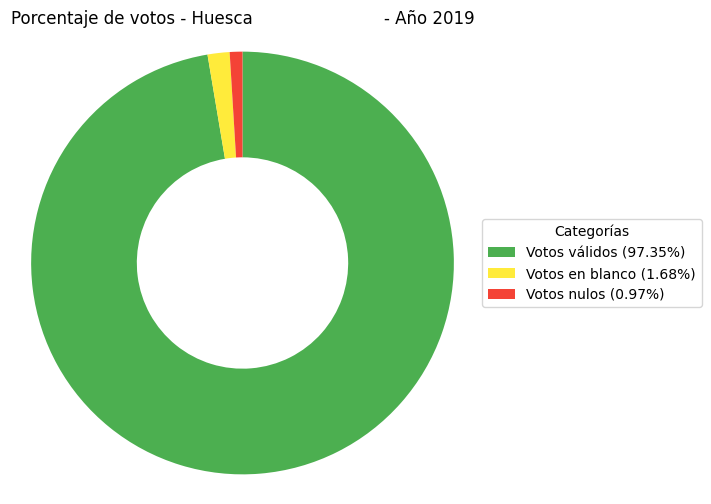

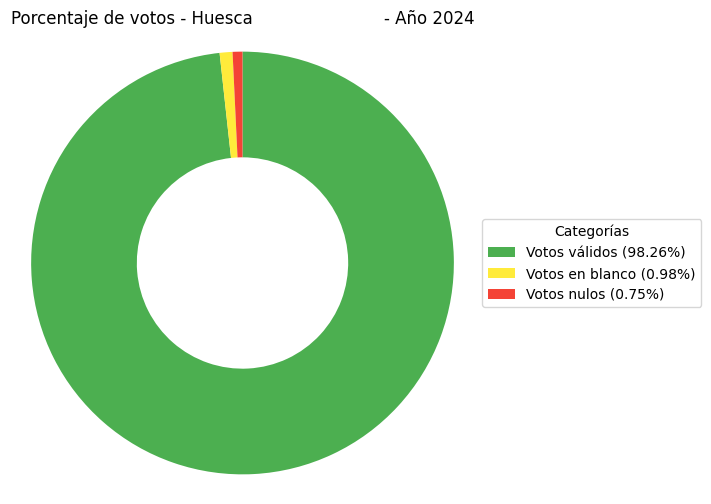

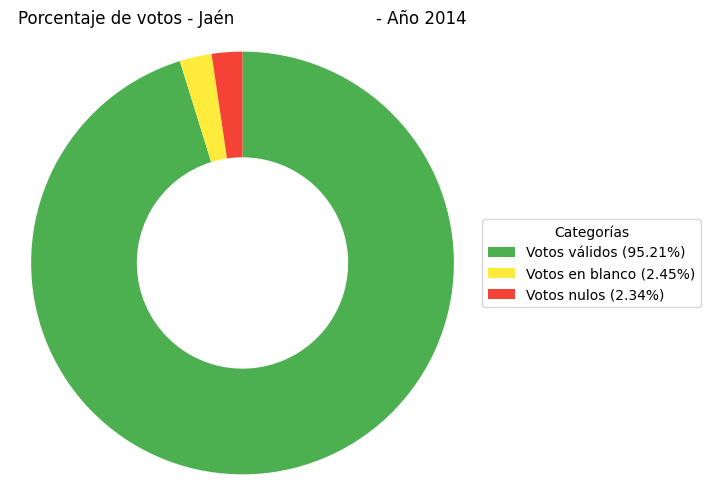

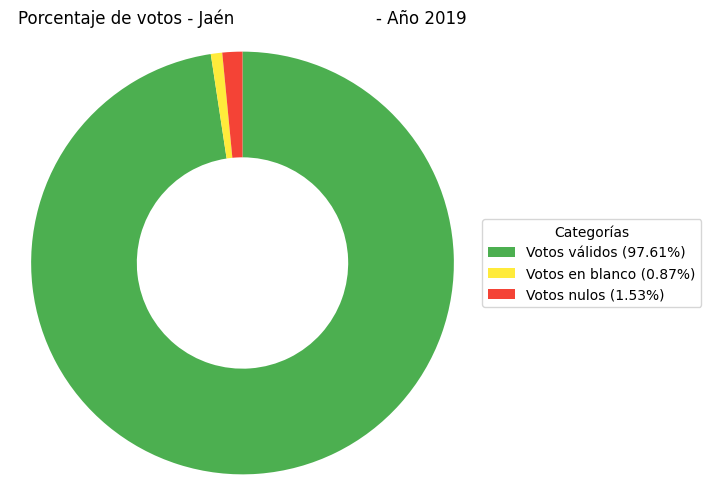

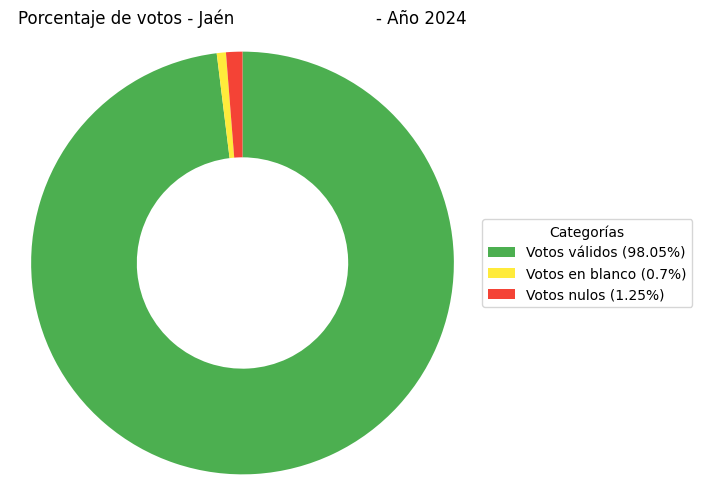

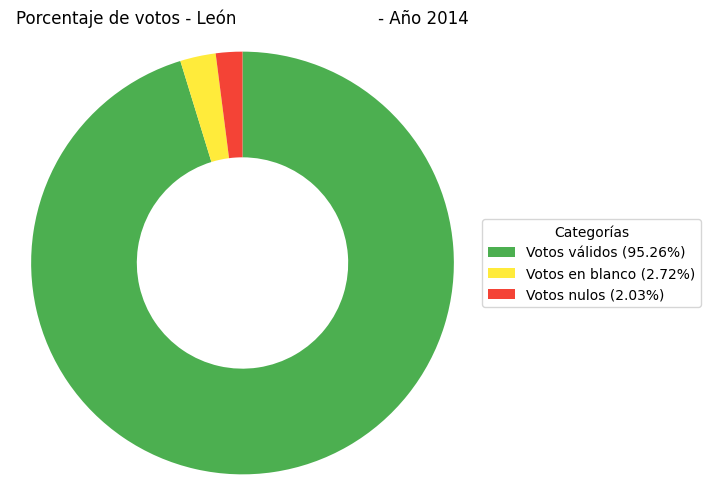

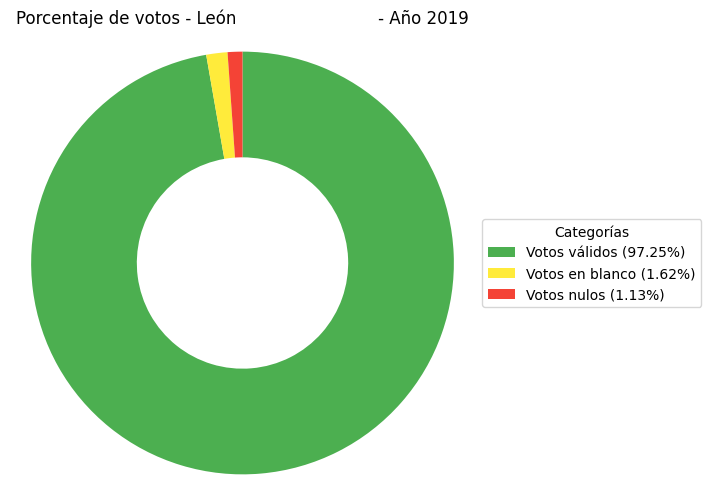

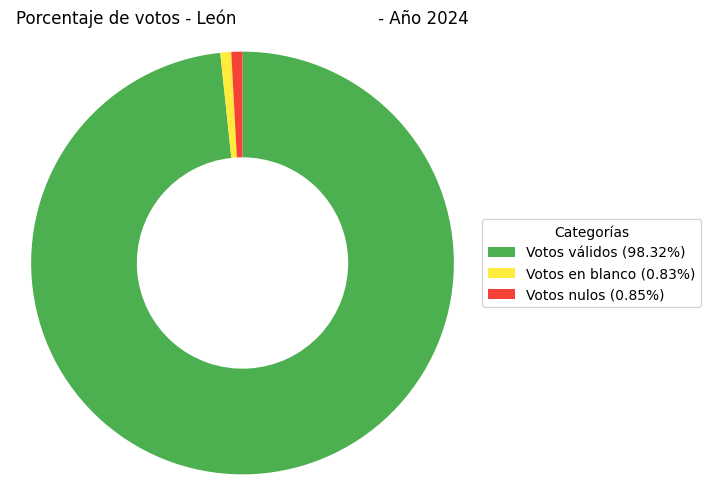

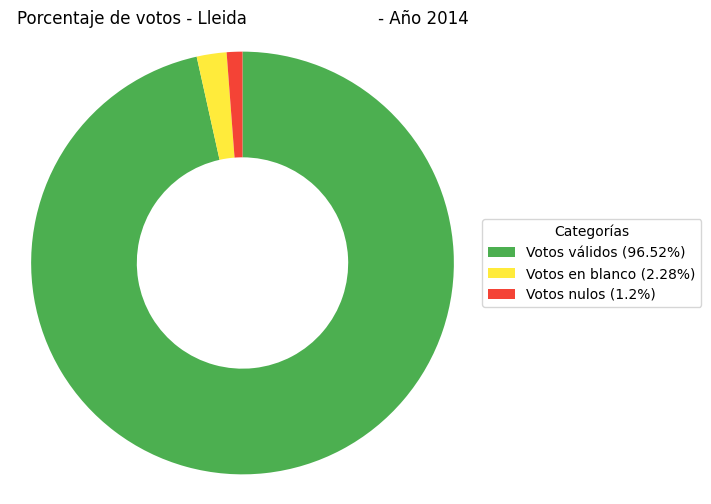

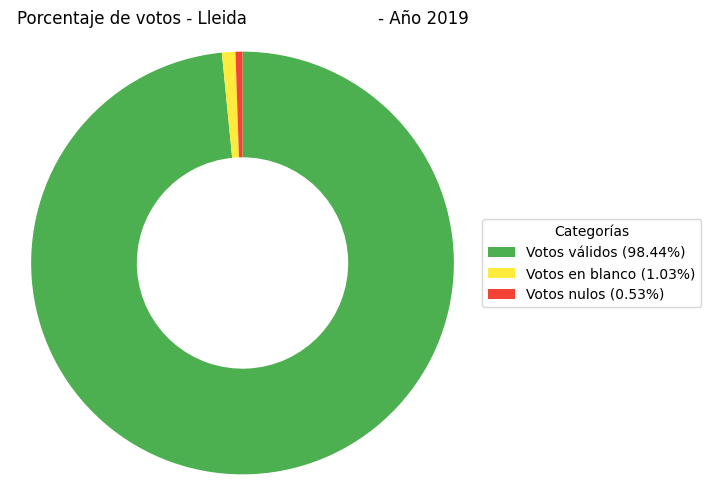

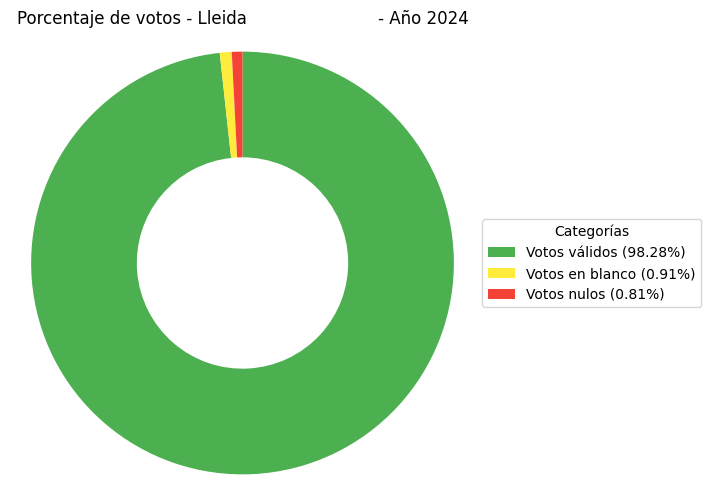

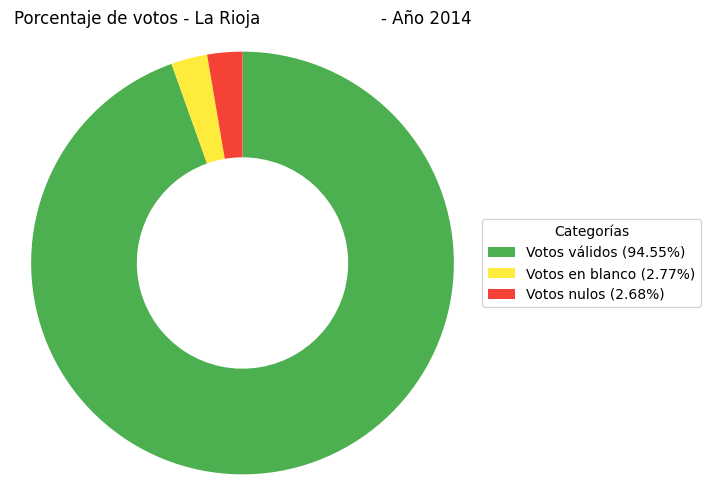

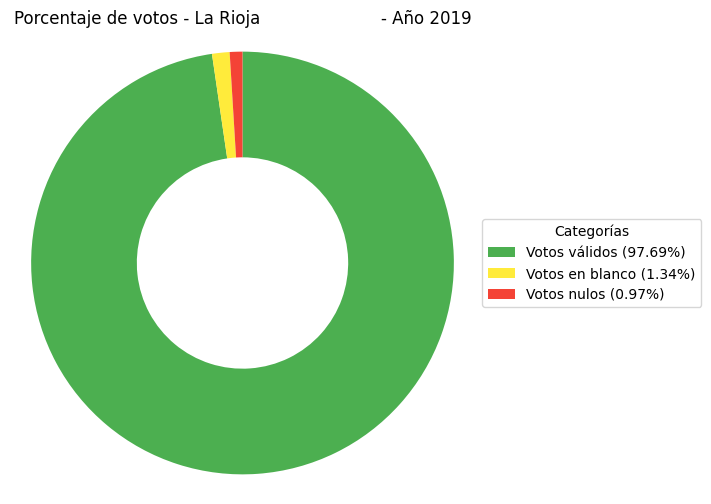

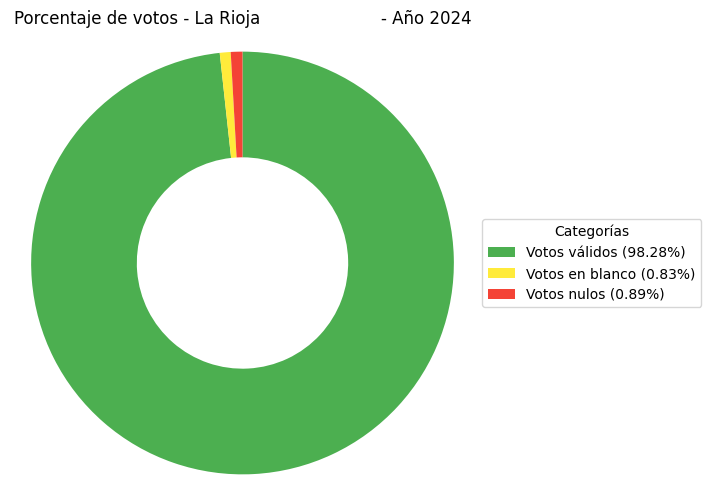

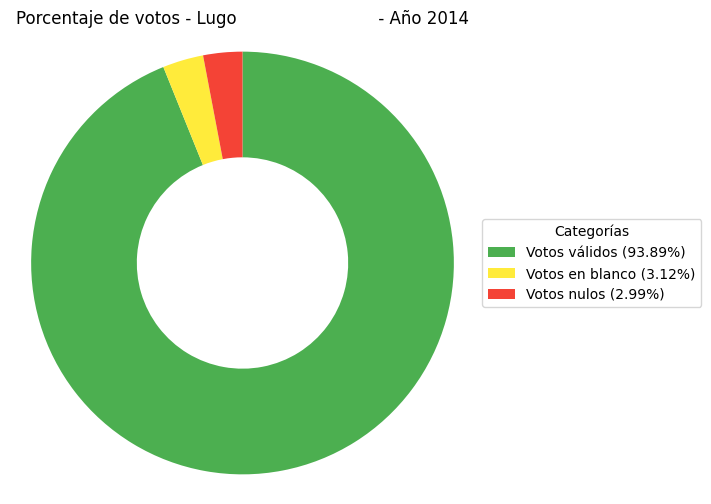

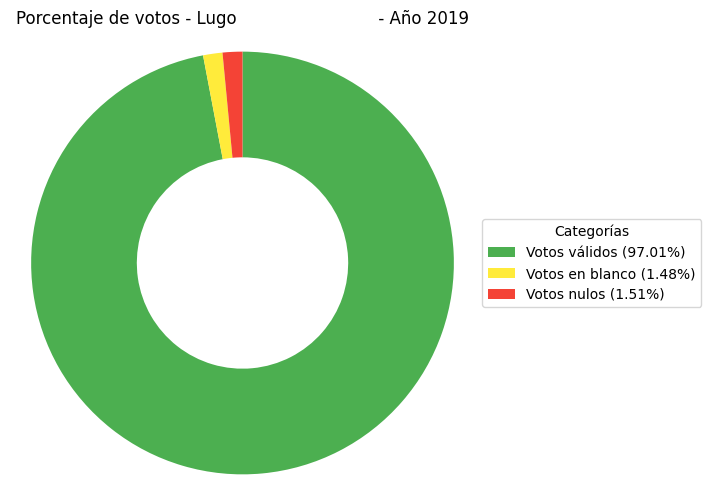

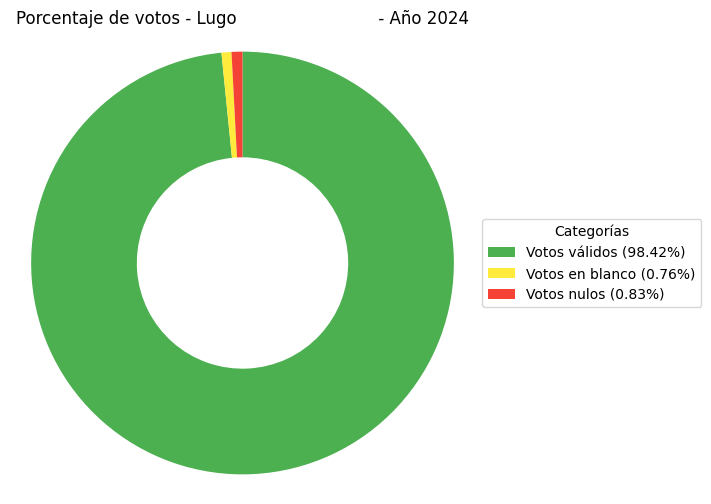

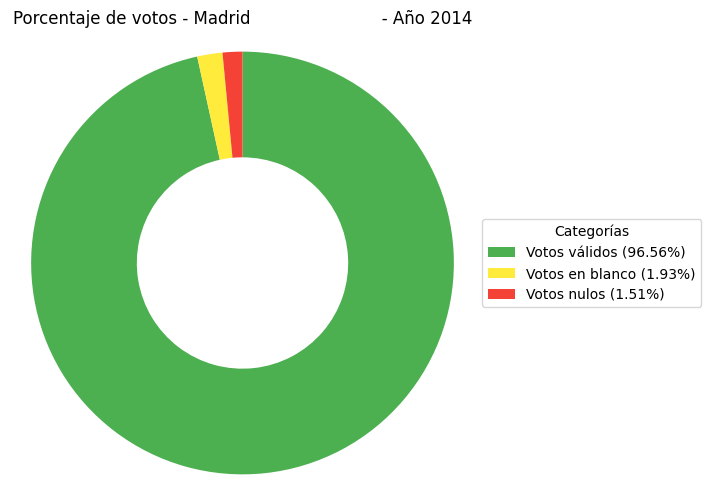

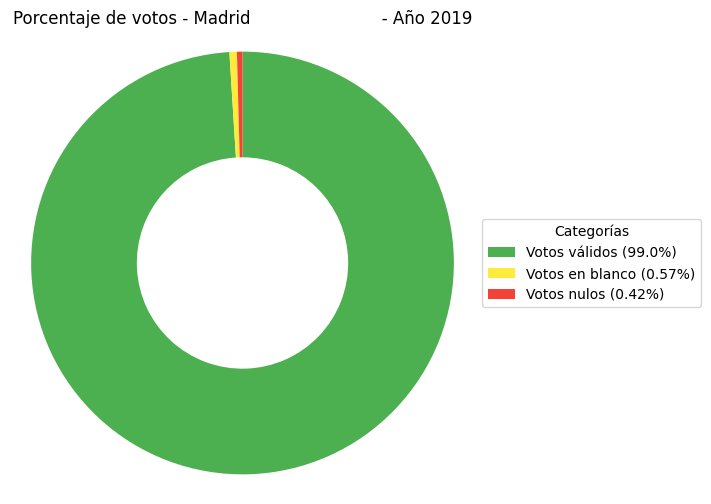

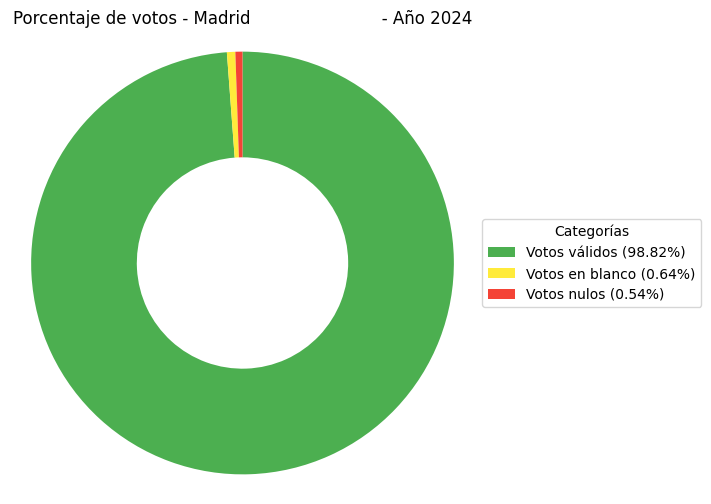

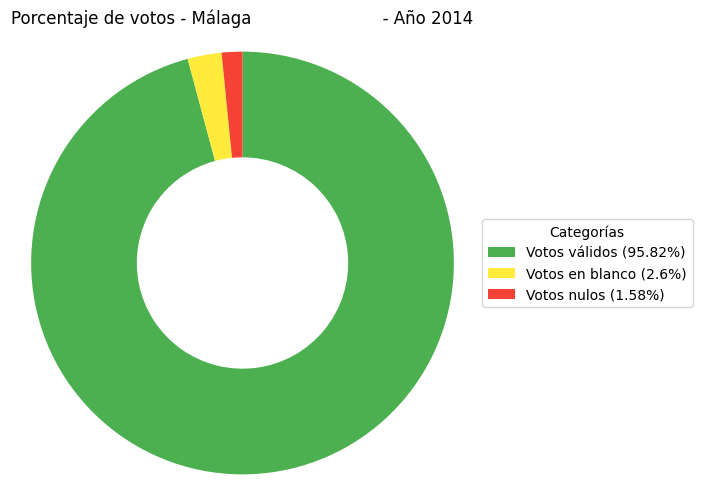

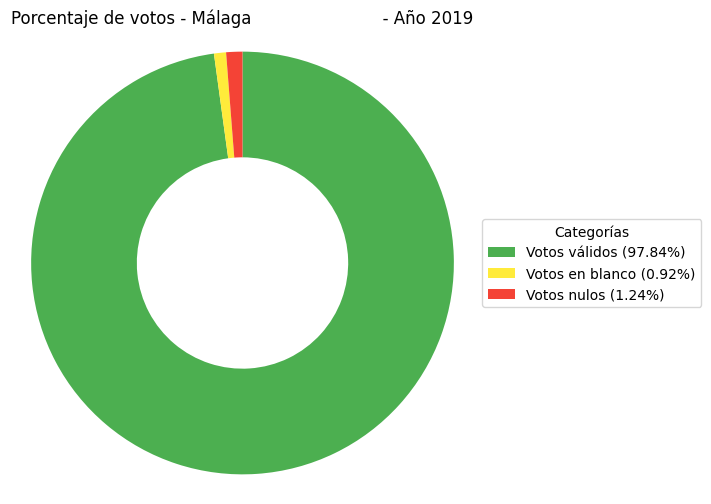

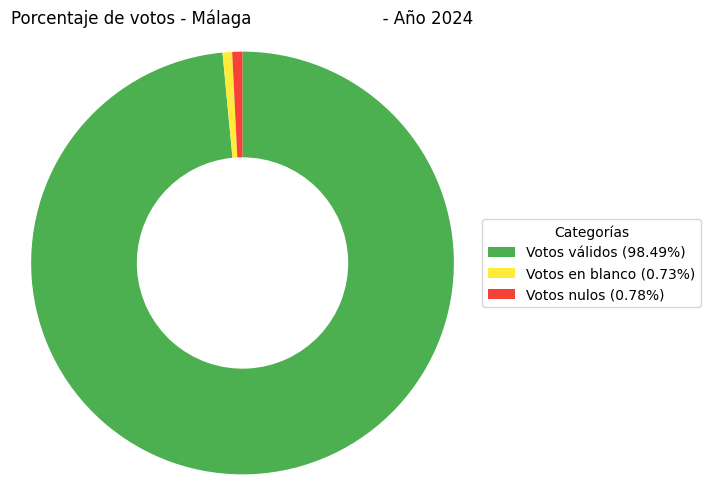

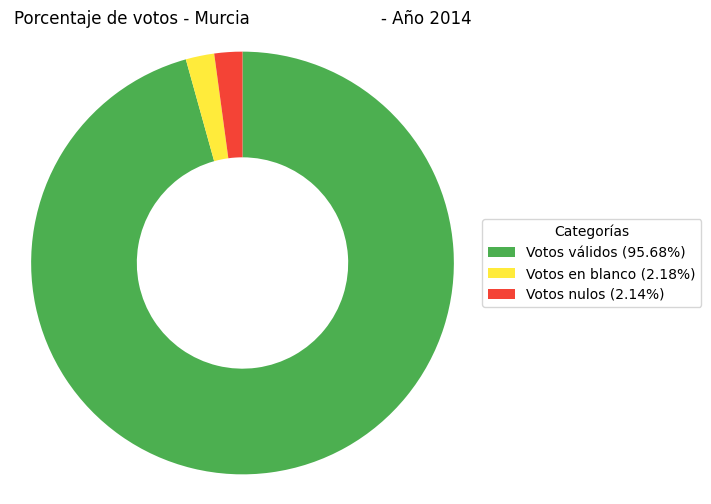

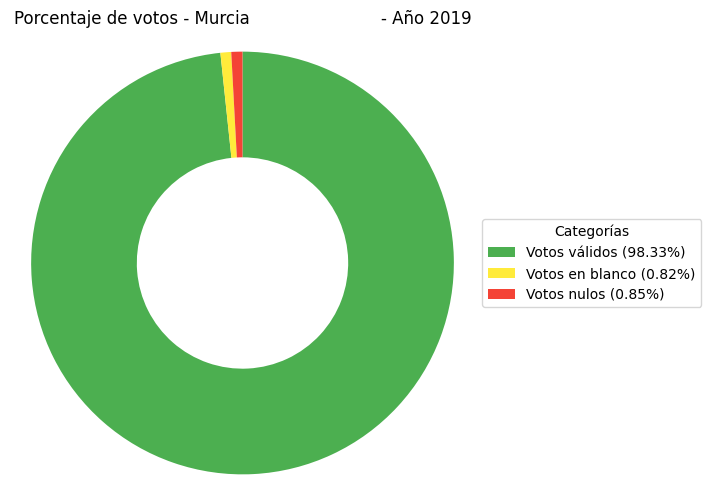

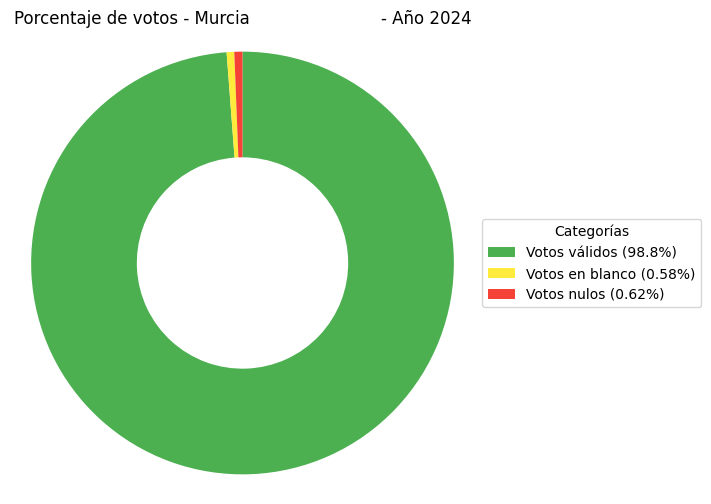

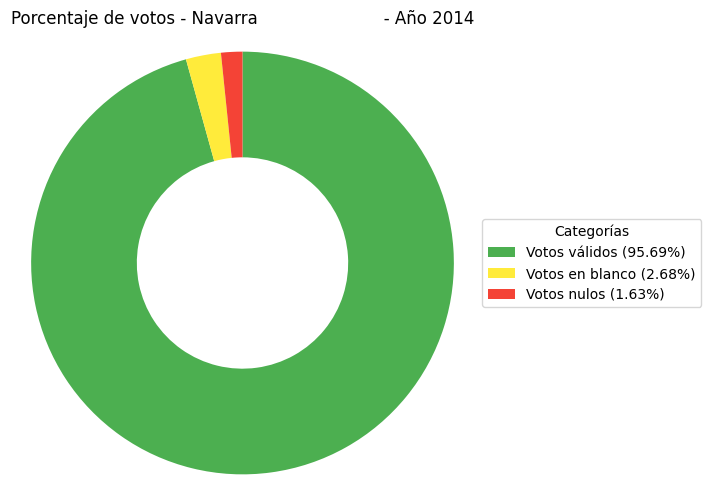

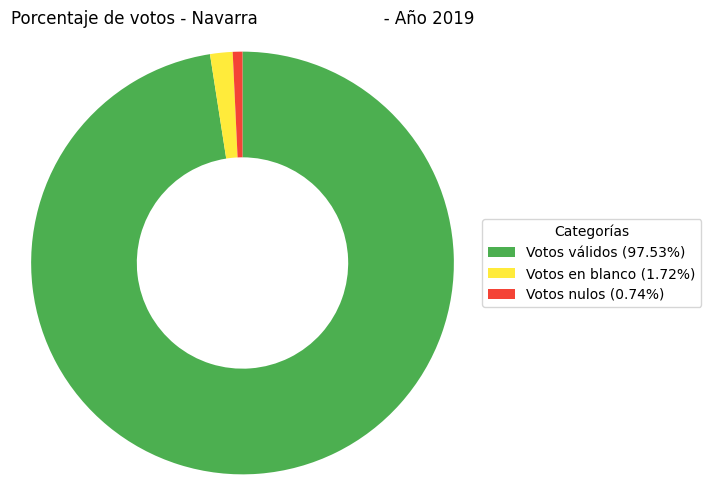

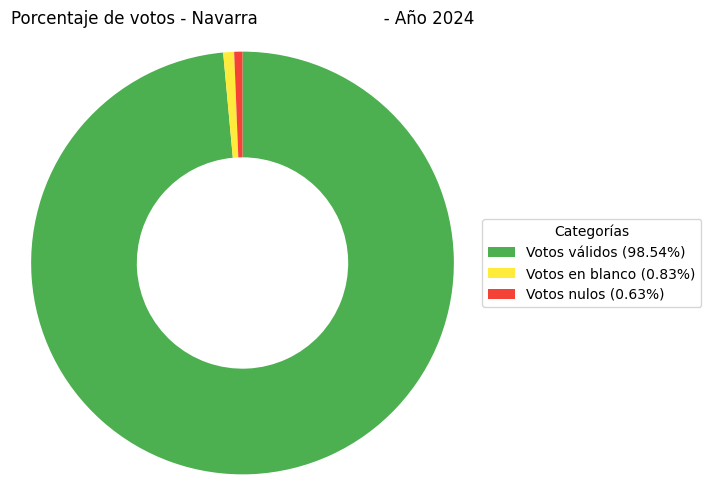

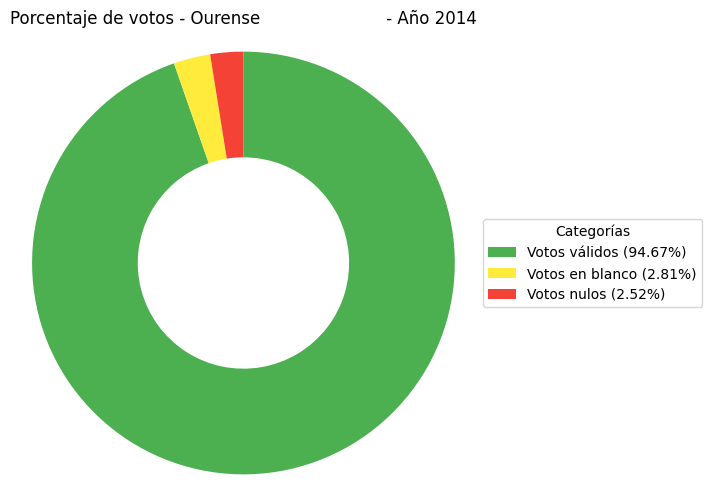

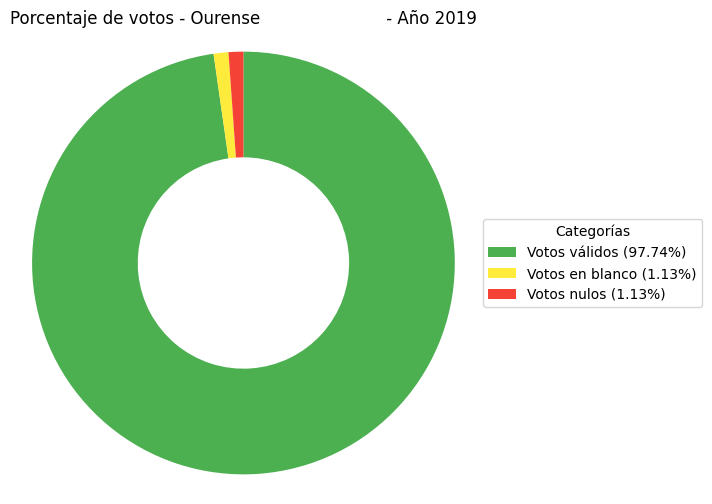

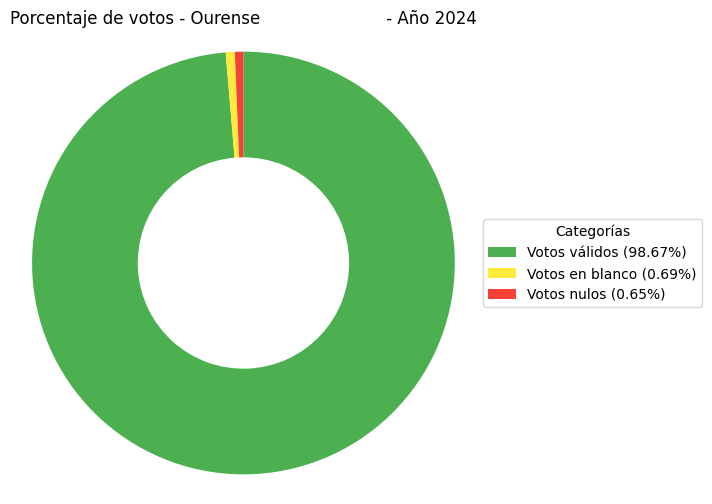

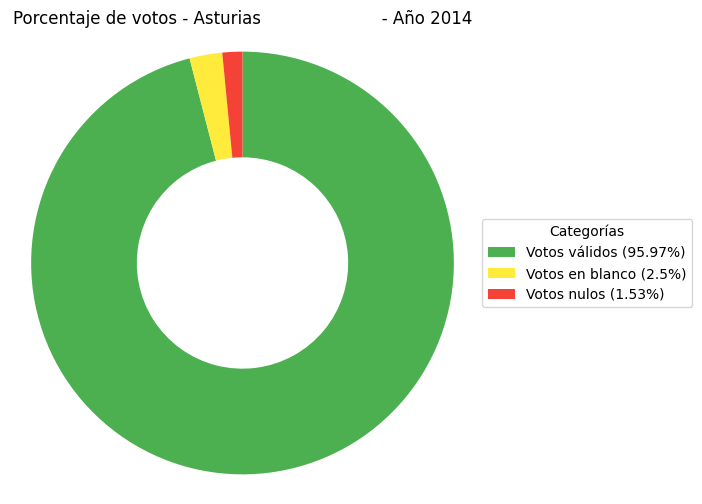

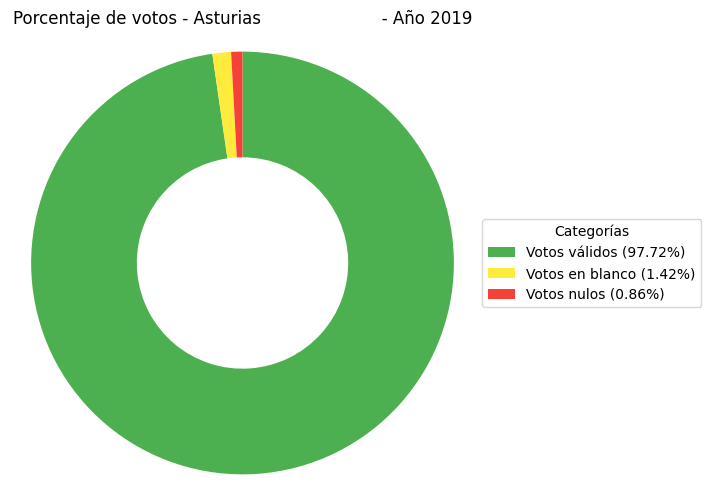

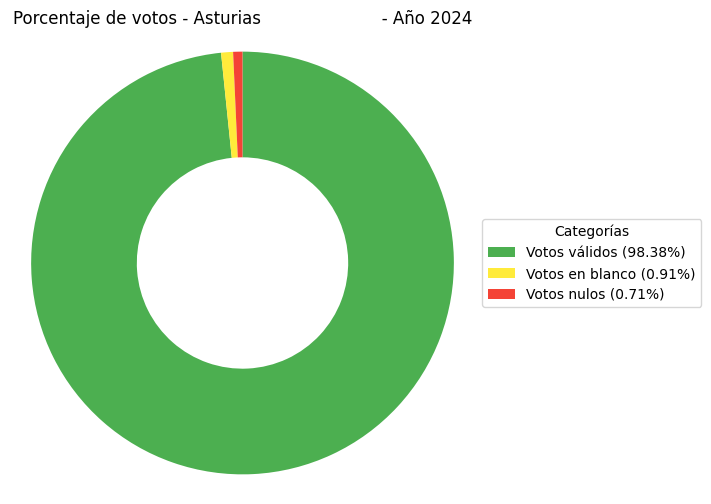

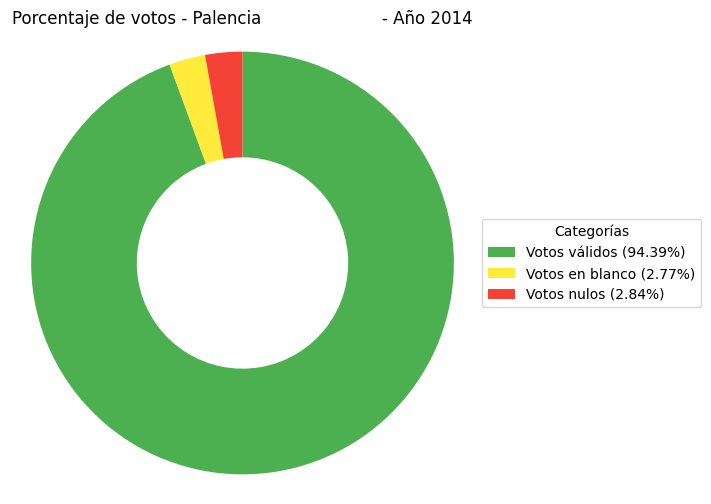

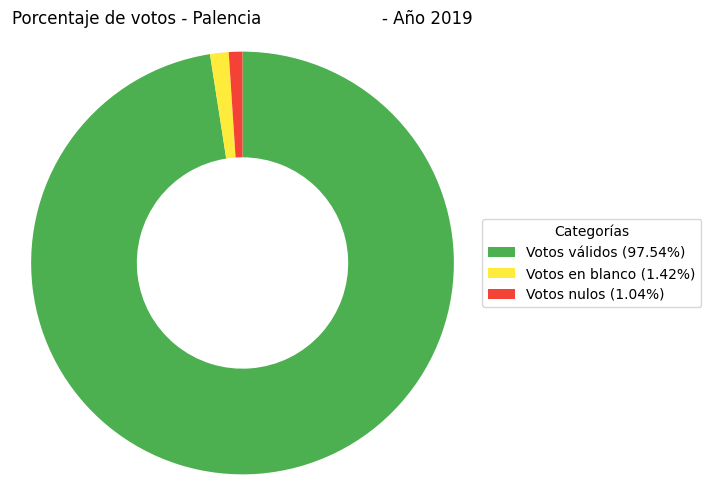

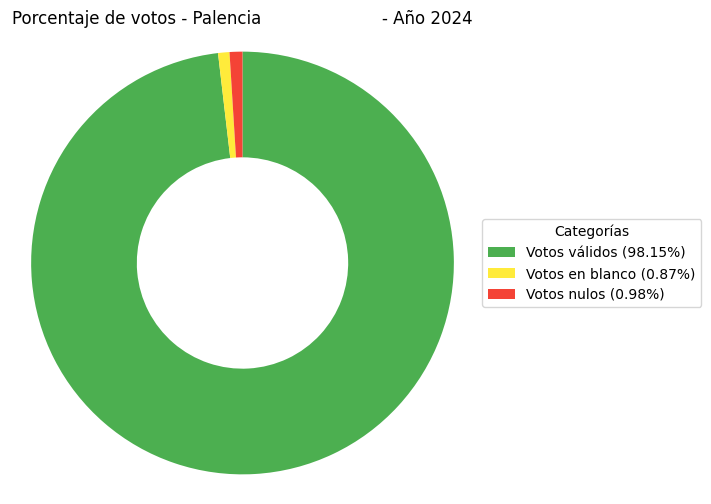

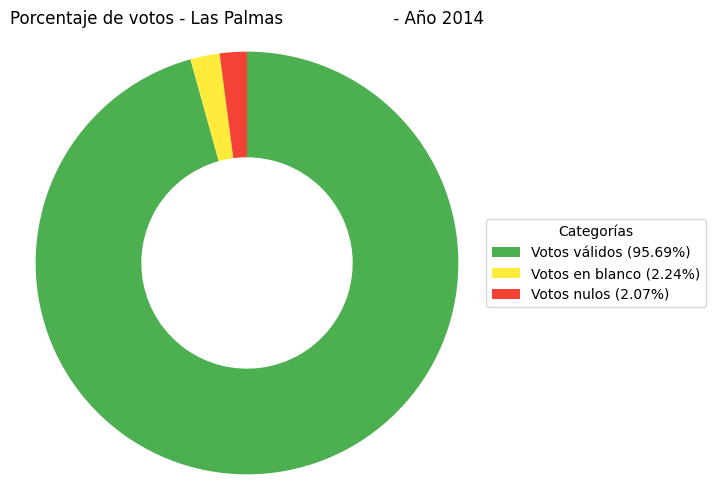

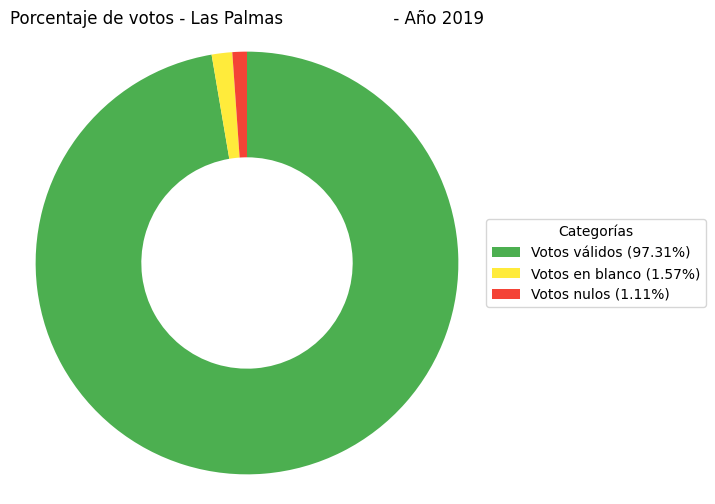

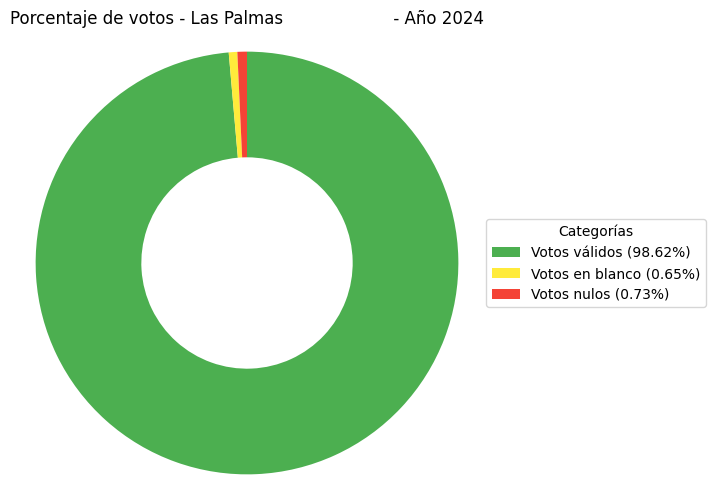

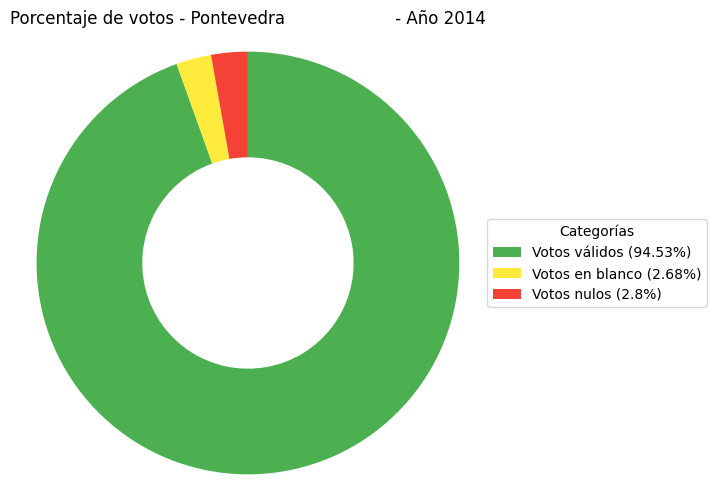

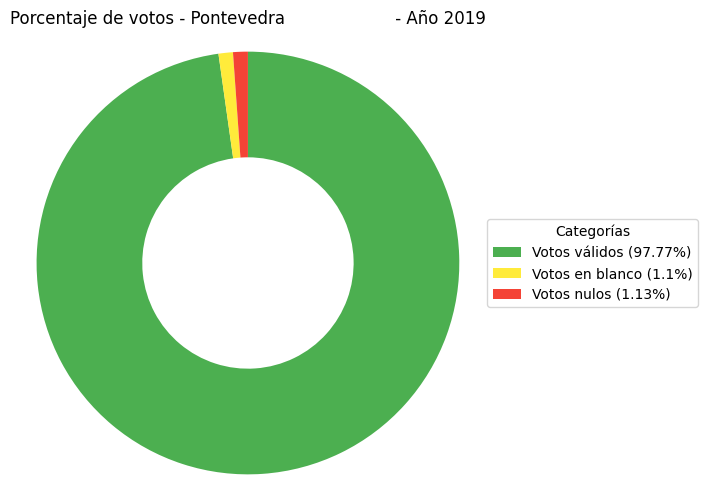

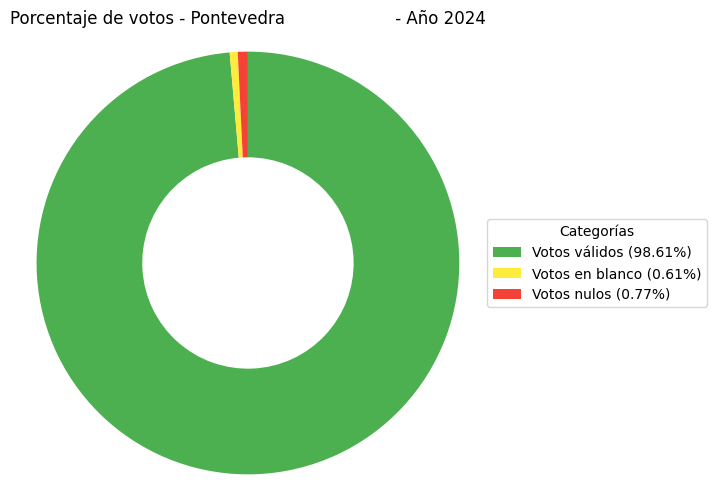

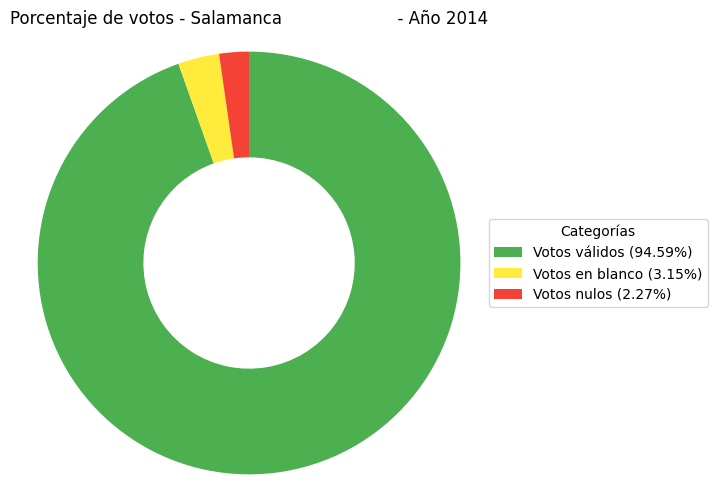

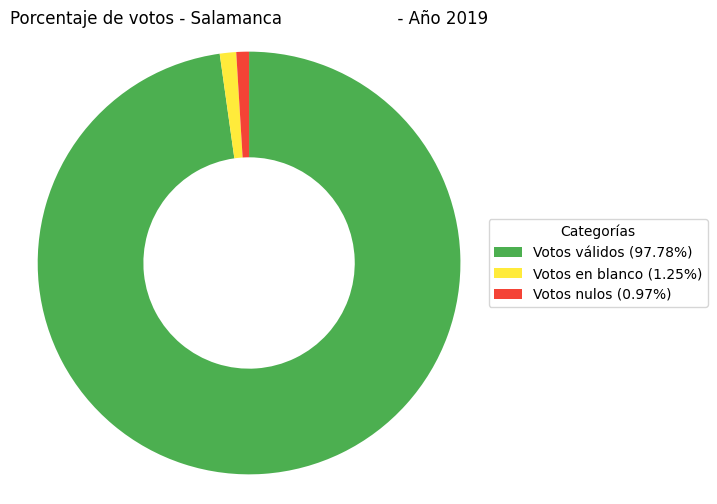

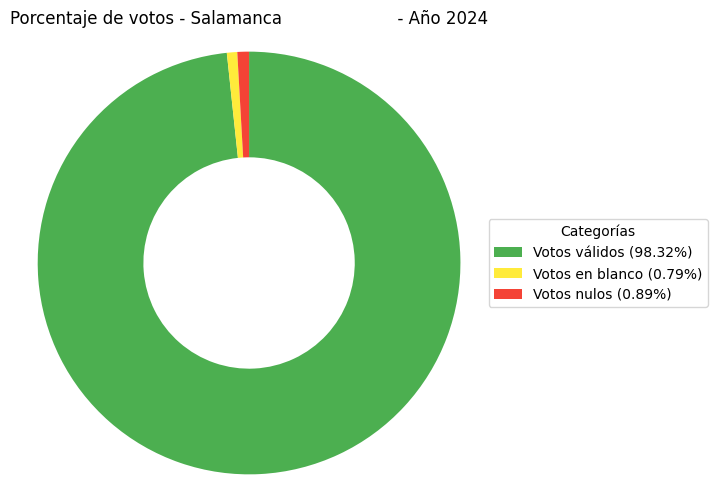

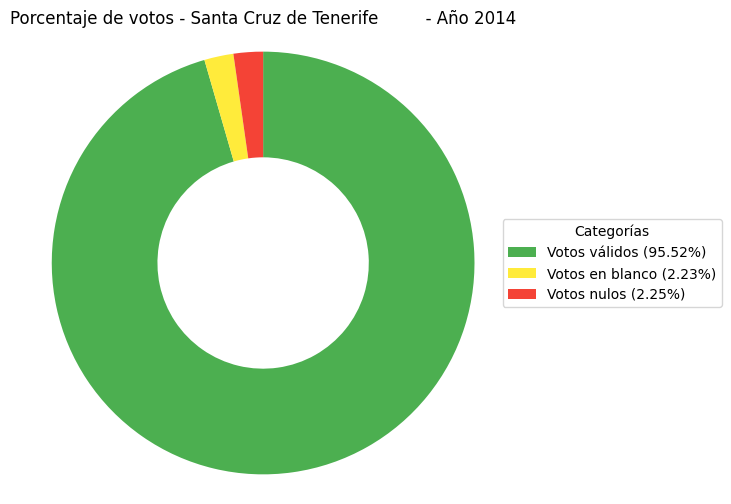

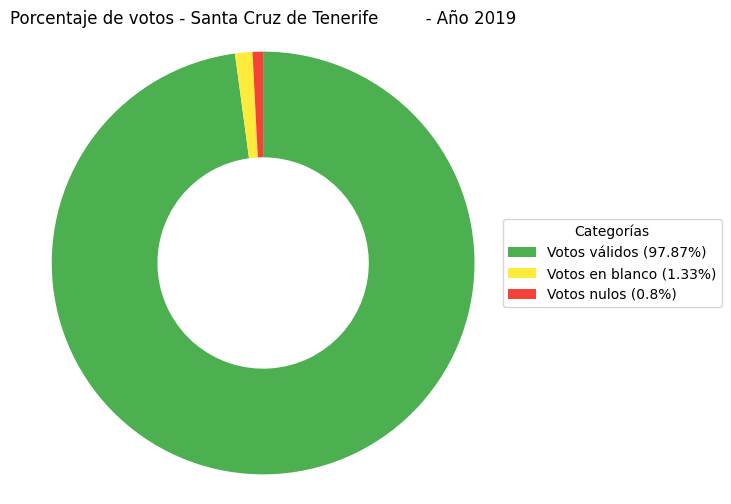

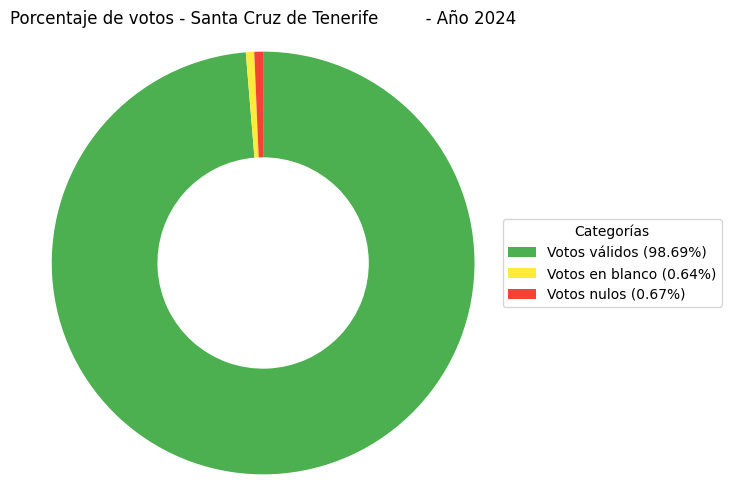

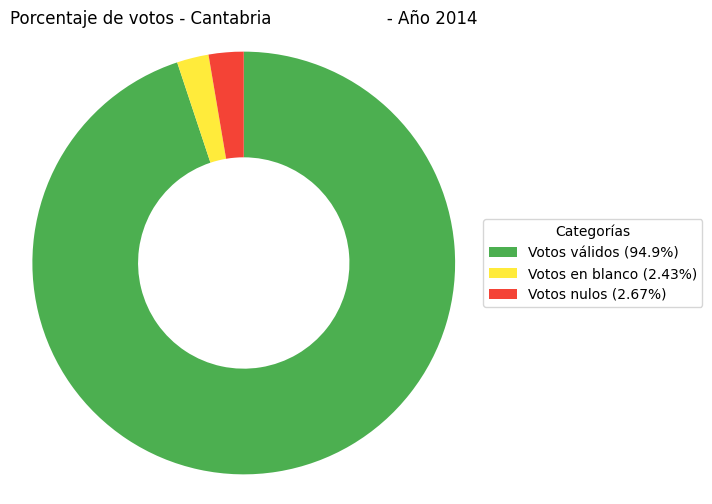

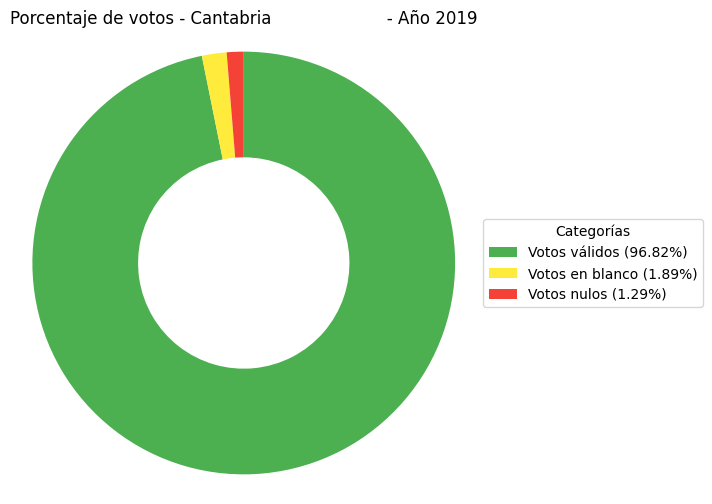

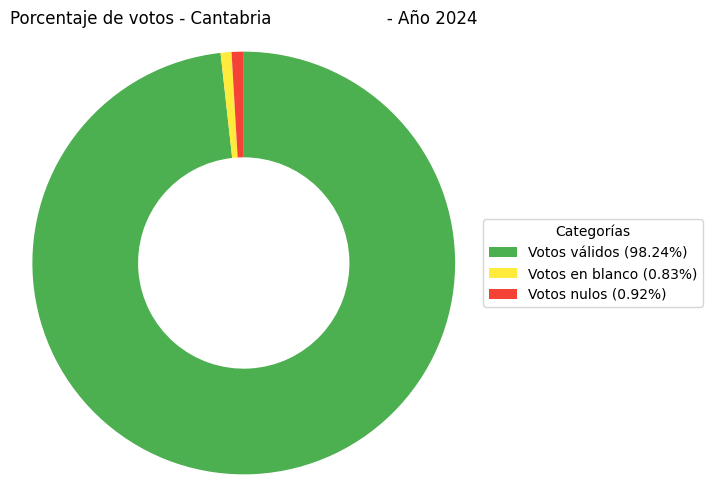

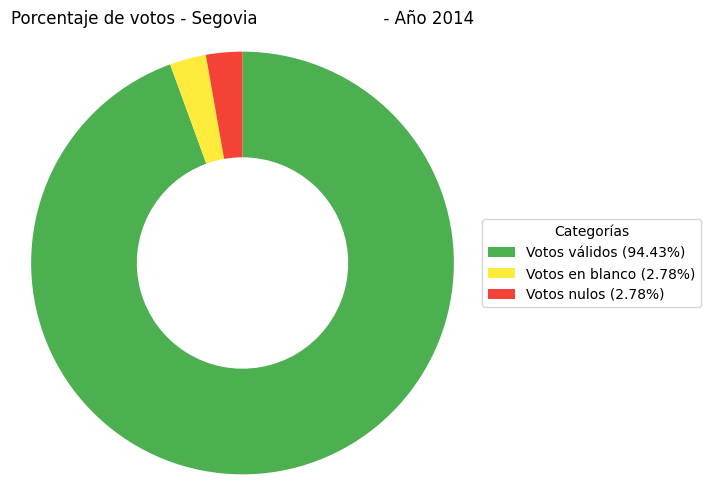

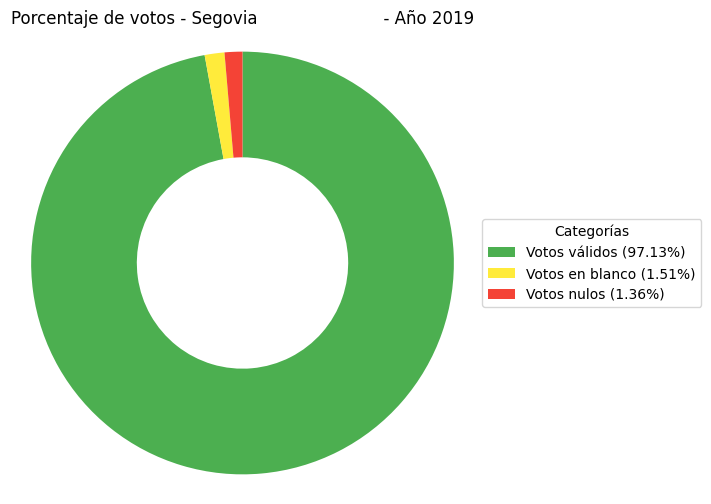

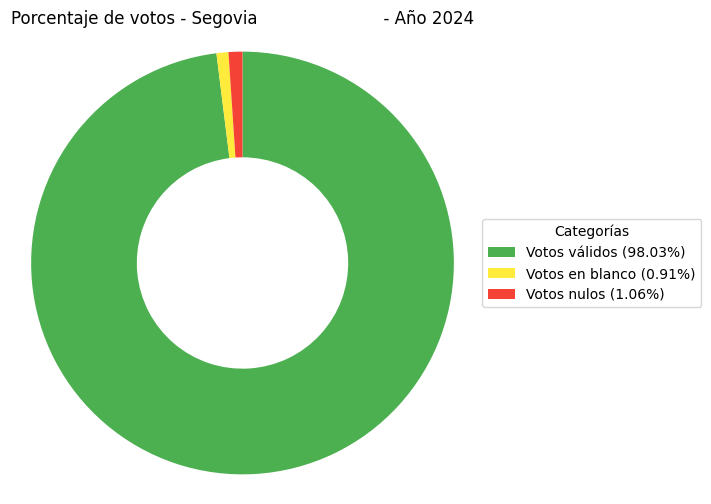

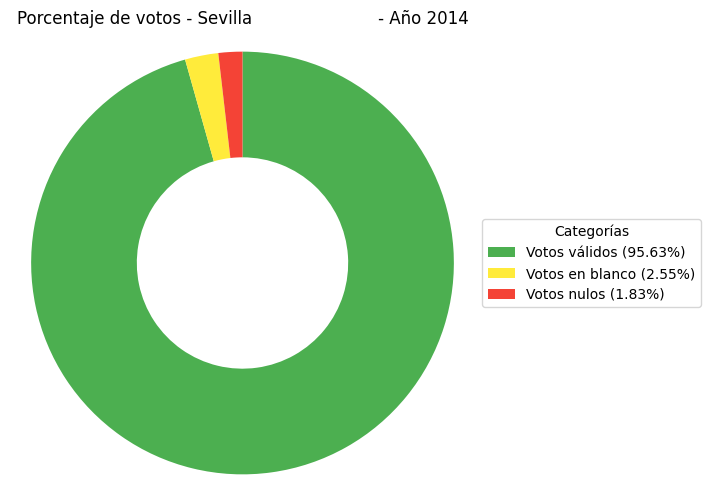

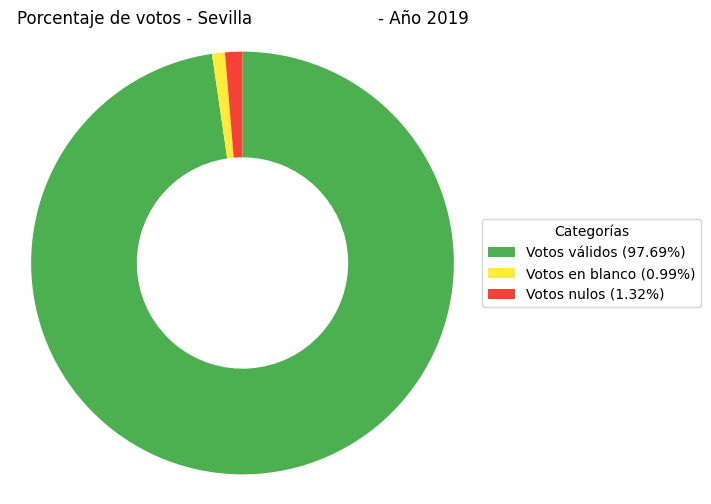

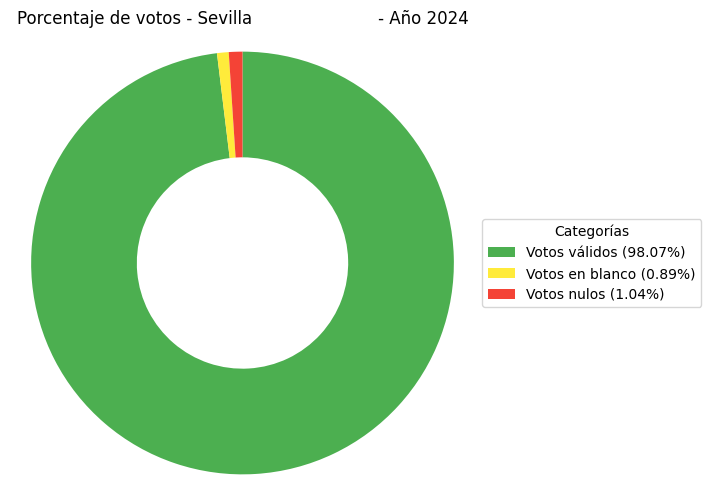

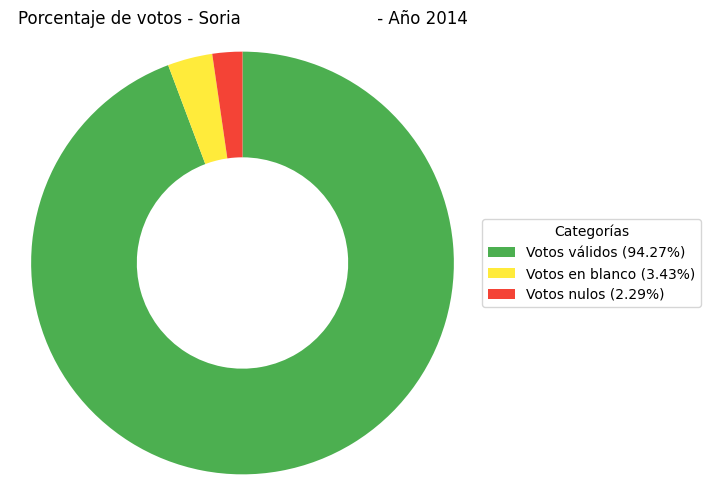

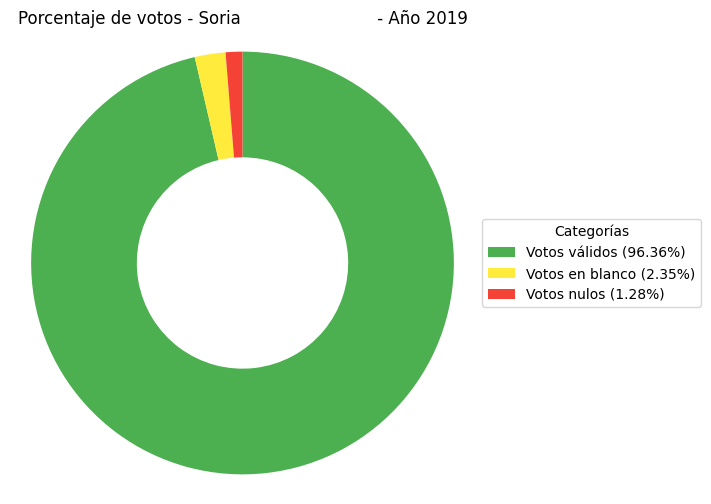

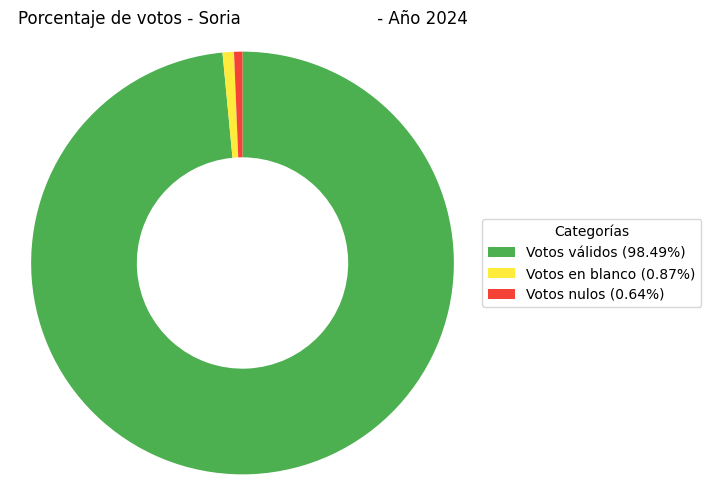

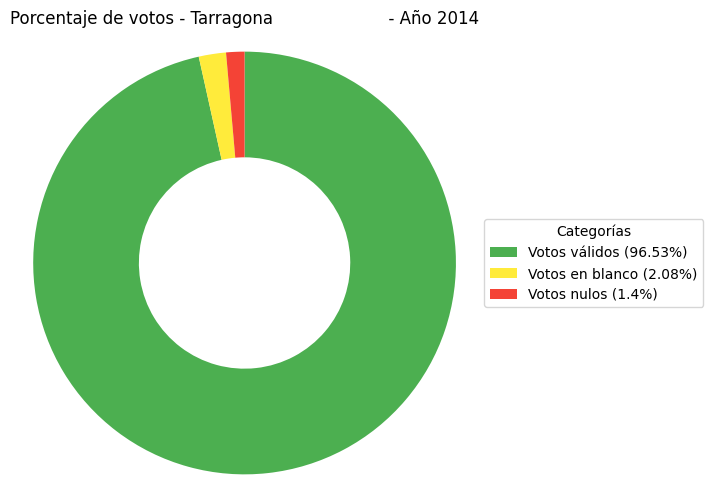

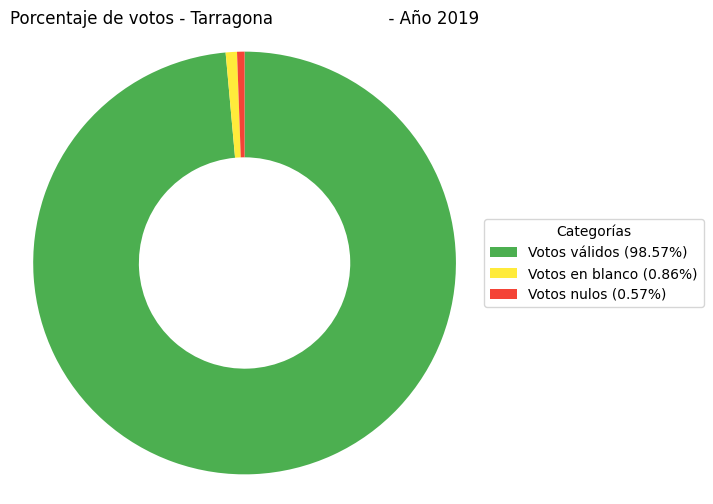

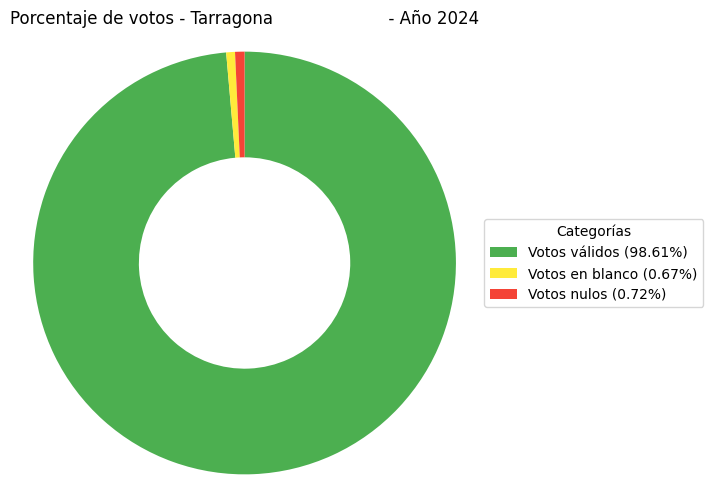

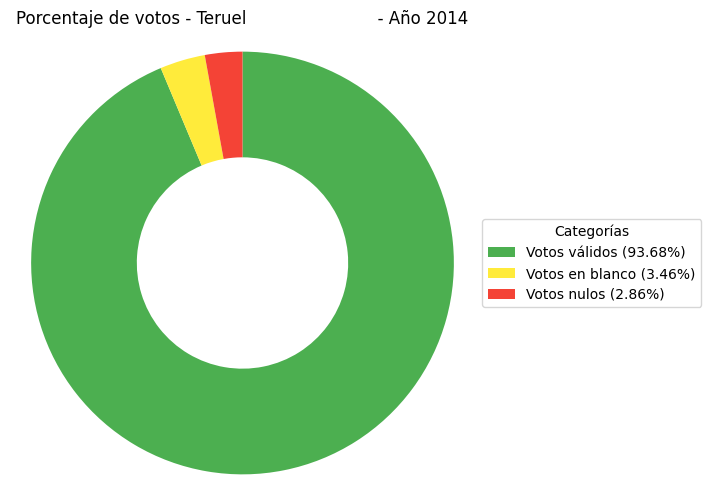

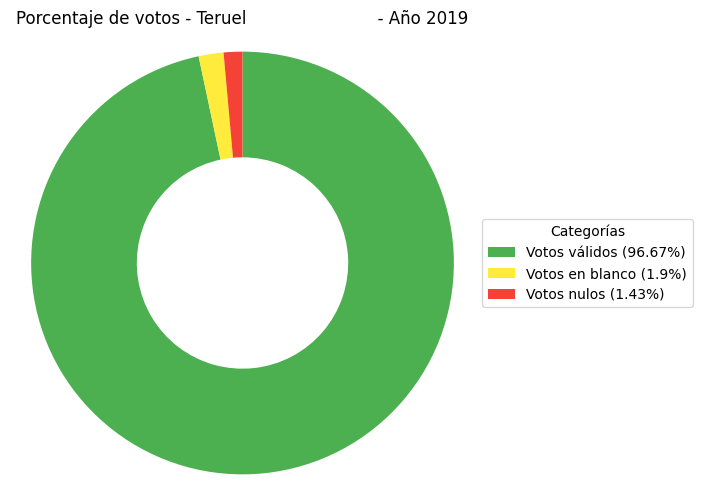

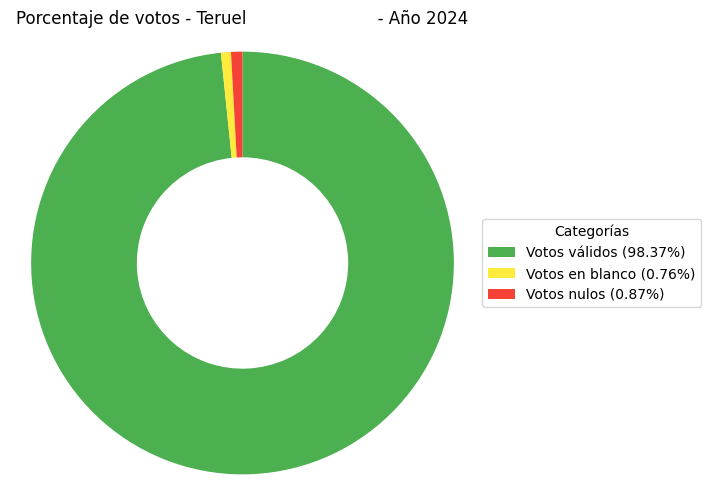

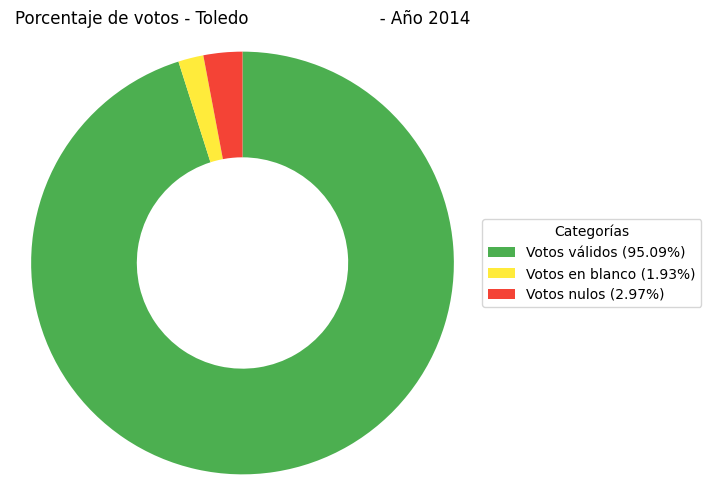

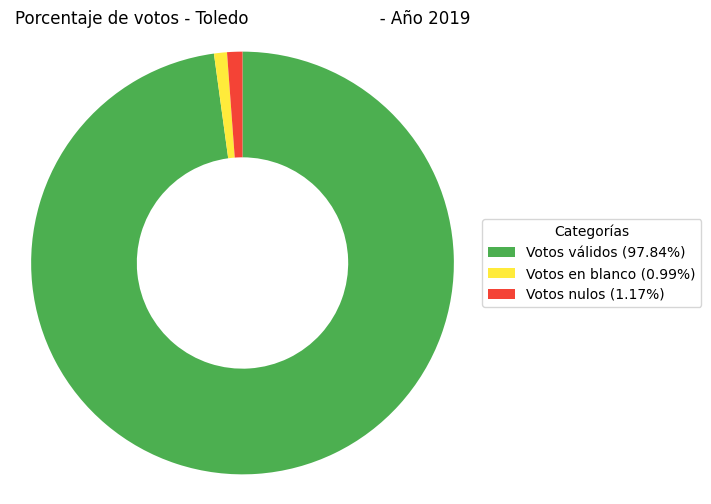

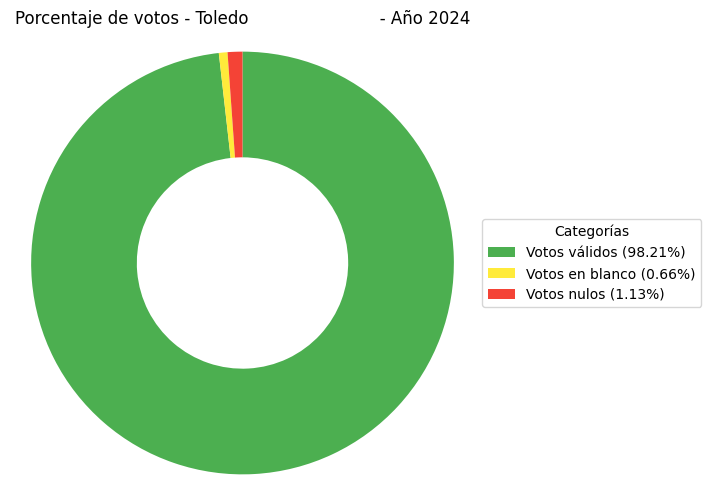

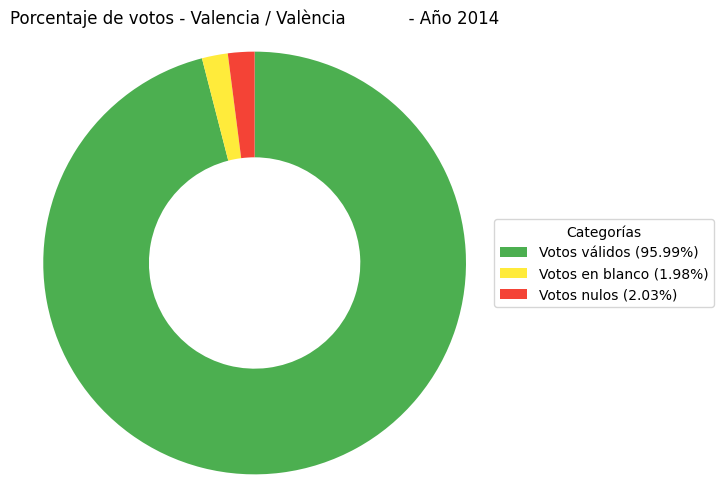

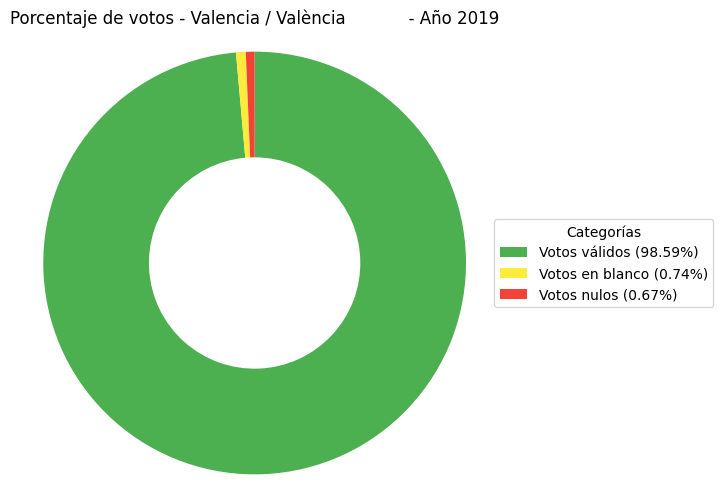

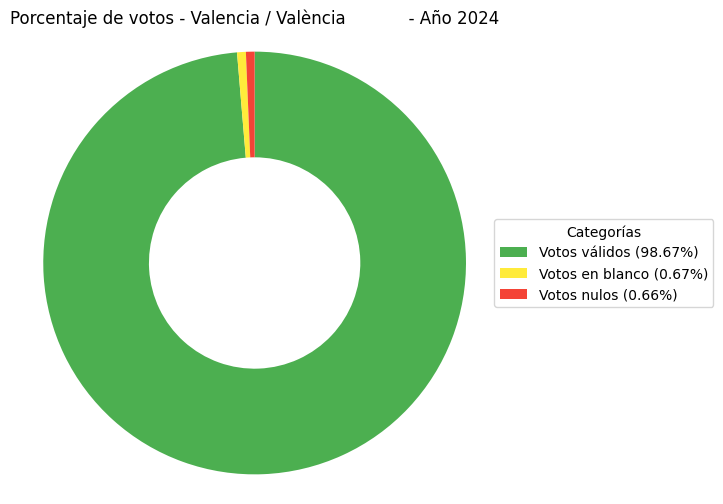

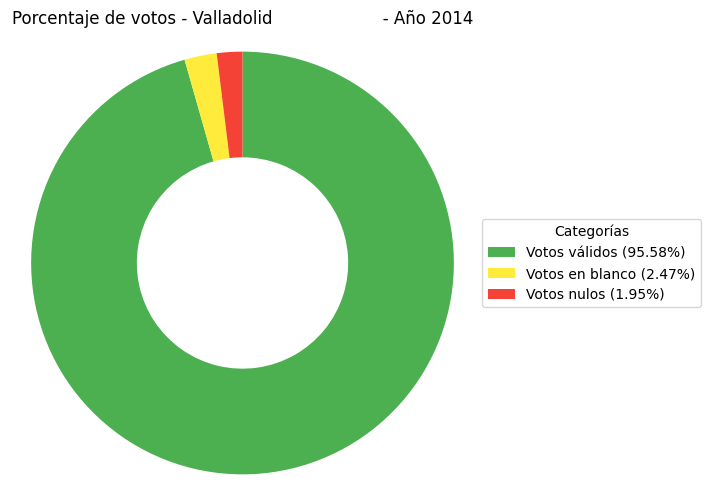

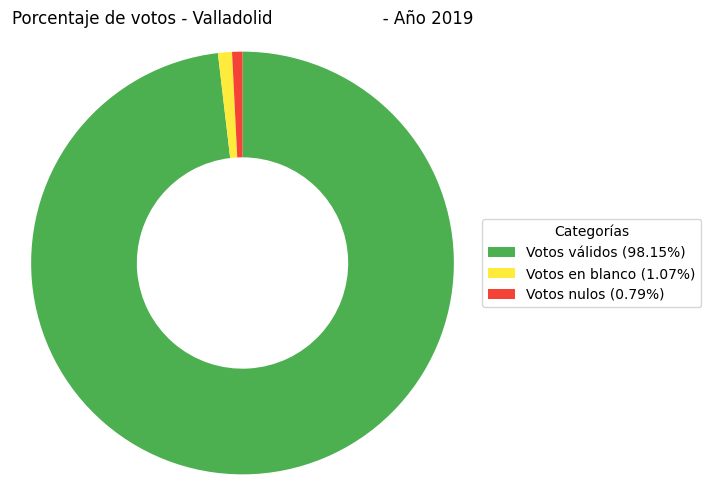

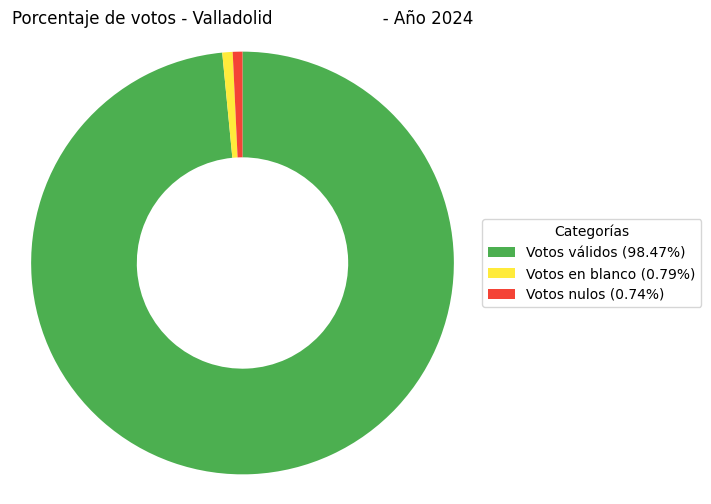

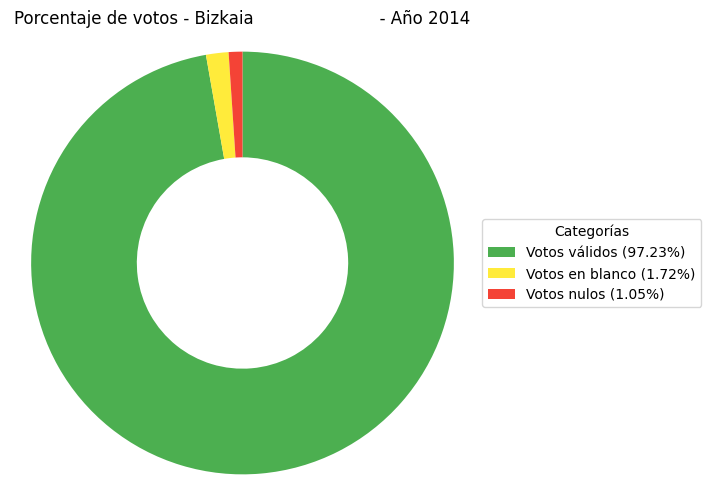

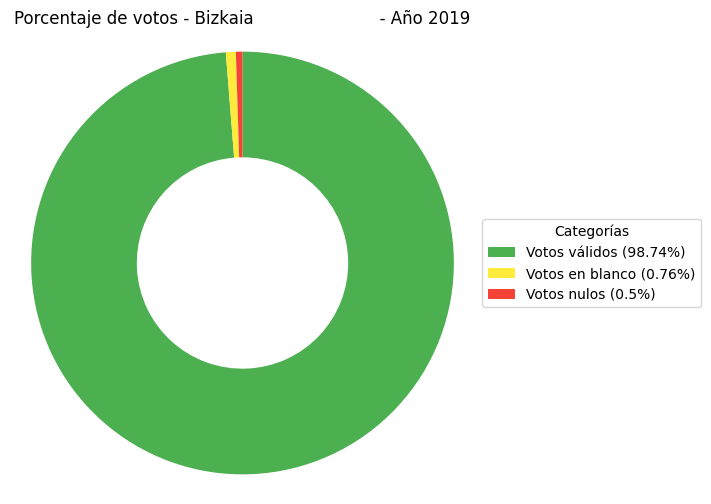

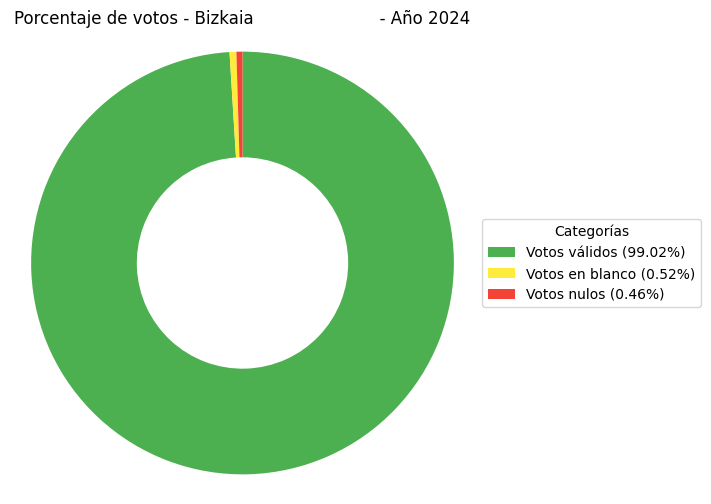

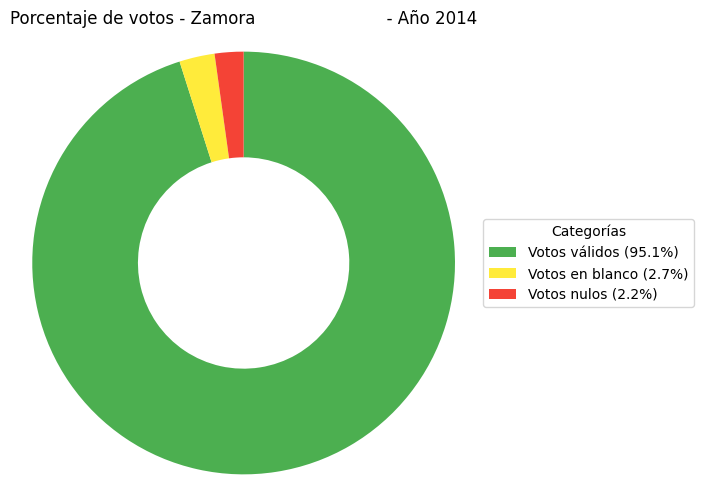

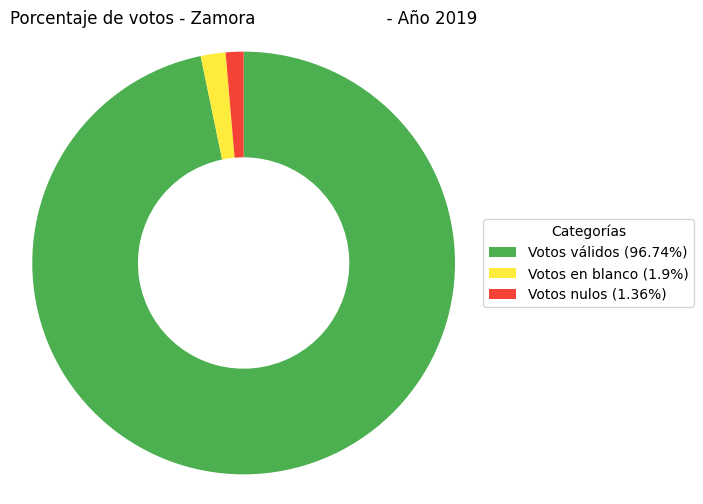

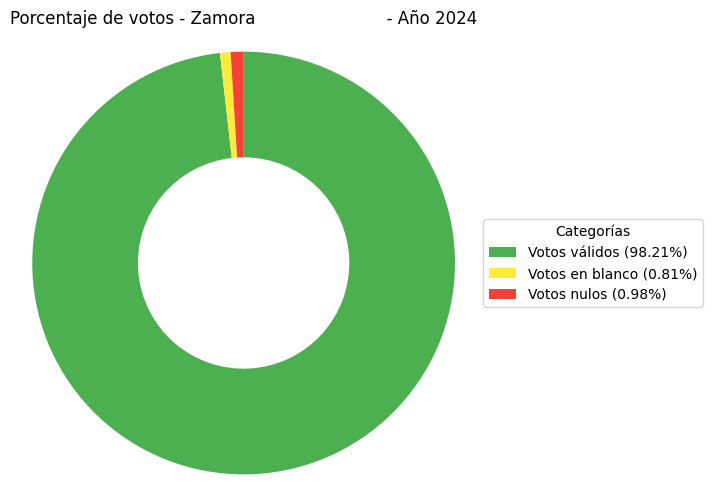

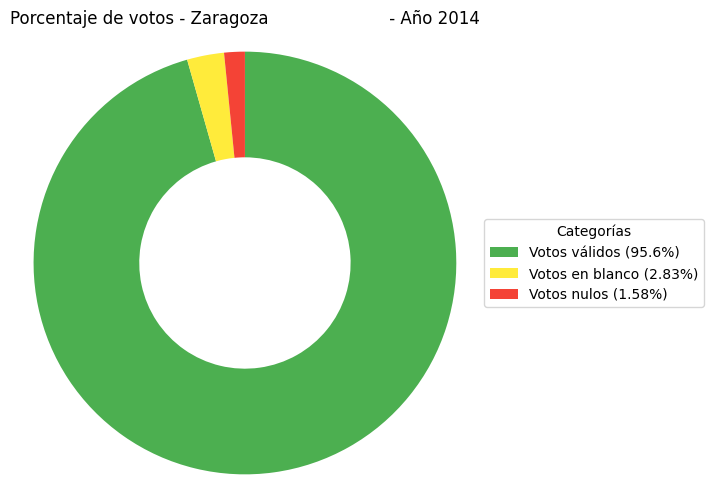

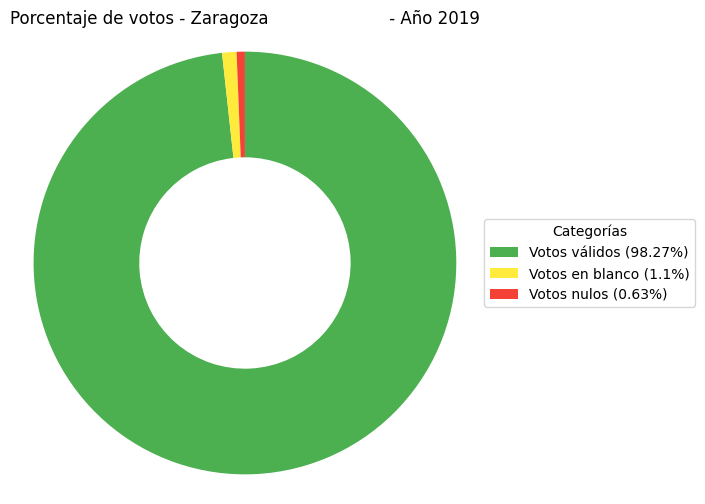

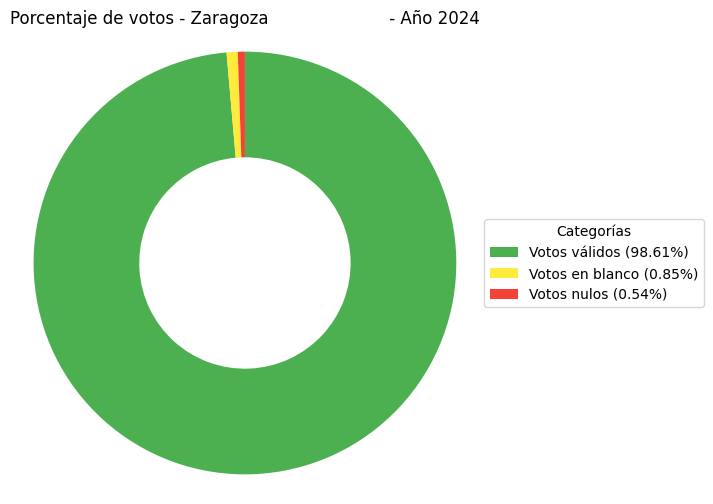

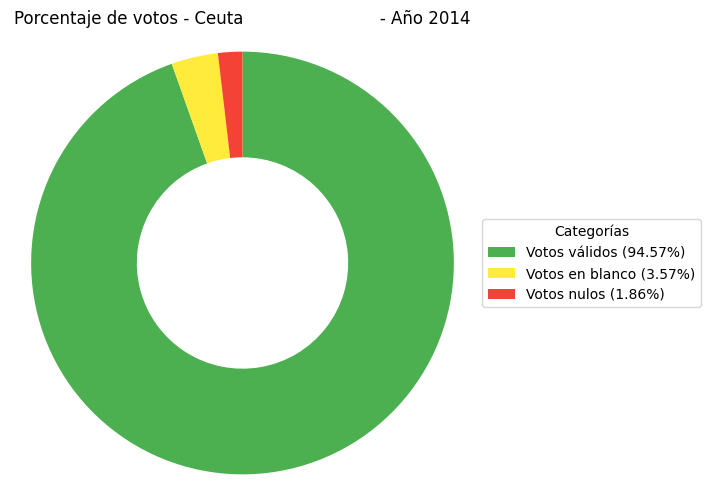

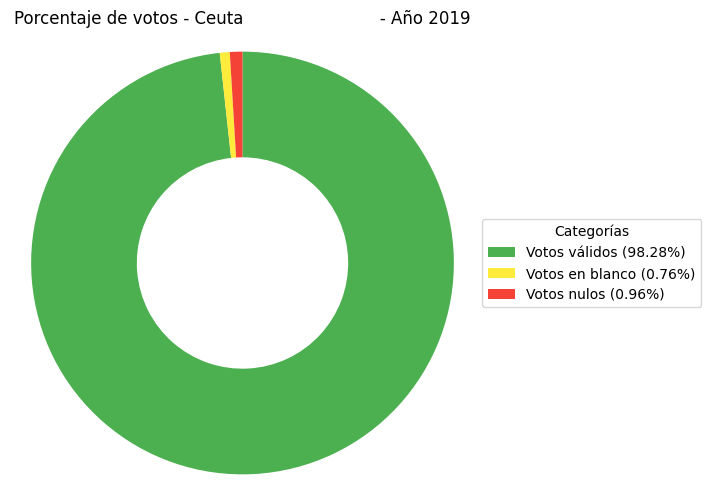

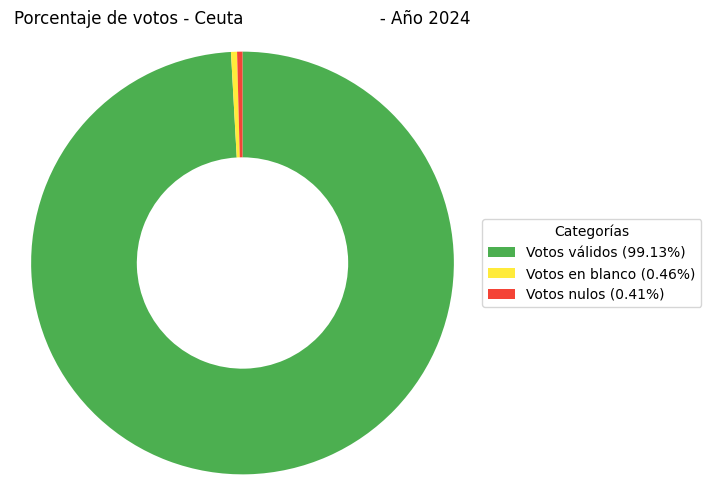

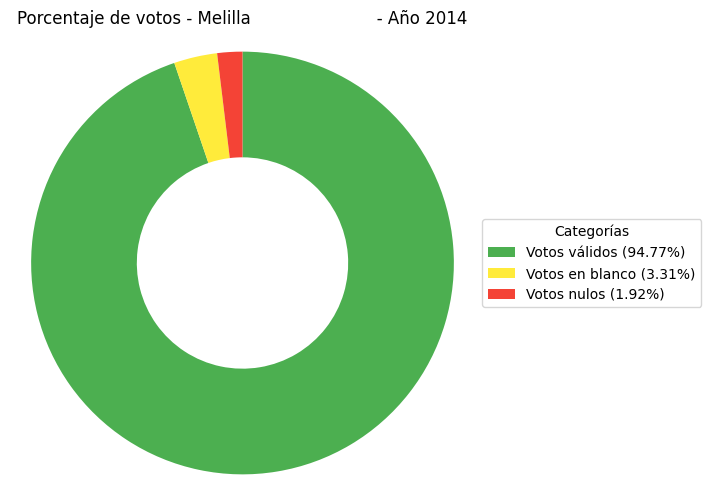

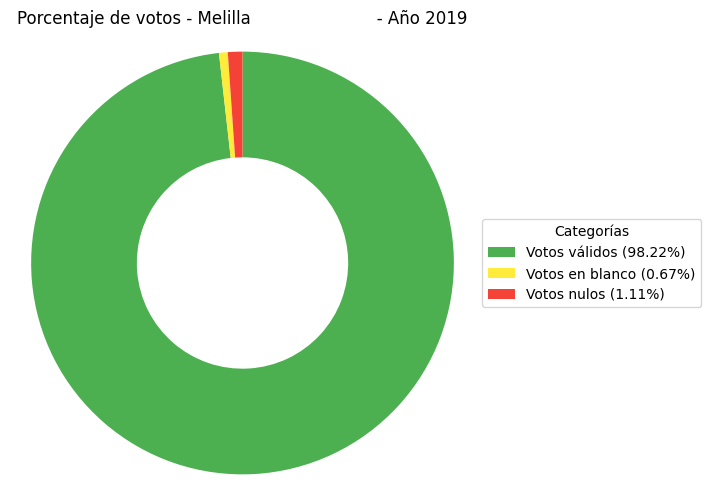

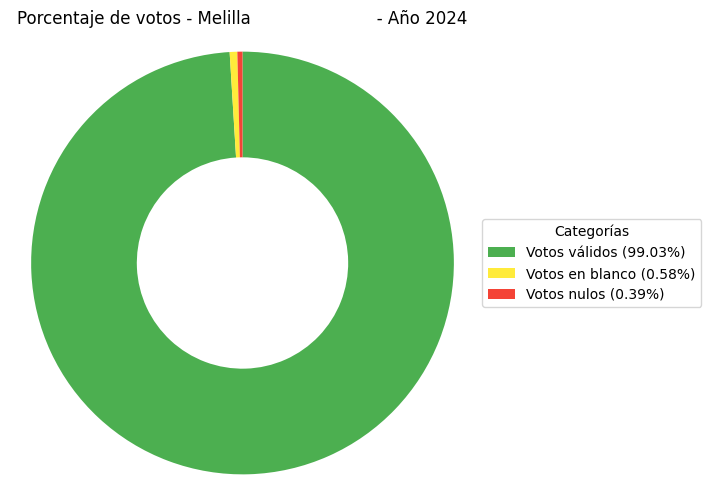

In [84]:
for provincia in dfa['Nombre de Provincia'].unique():
    df_prov = dfa[dfa['Nombre de Provincia'] == provincia]
    for year in df_prov['año'].unique():
        data = df_prov[df_prov['año'] == year].iloc[0]
        
        labels = ['Votos válidos', 'Votos en blanco', 'Votos nulos']
        sizes = [data['pct_validos'], data['pct_blancos'], data['pct_nulos']]
        colors = ['#4CAF50', '#FFEB3B', '#F44336']
        
        plt.figure(figsize=(6,6))
        wedges, texts = plt.pie(
            sizes,
            colors=colors,
            startangle=90,
            counterclock=False,
            wedgeprops=dict(width=0.5)
        )
        plt.legend(
            wedges,
            [f"{lab} ({val}%)" for lab, val in zip(labels, sizes)],
            title="Categorías",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )
        plt.title(f'Porcentaje de votos - {provincia} - Año {year}')
        plt.axis('equal')
        plt.show()



In [85]:
query_corr = """
SELECT 
    r.`Renta bruta media`,
    p.`Paro absoluto`,
    r.Año,
    prov.`Nombre de Provincia`
FROM 
    RENTA r
JOIN 
    PARO p ON r.id_provincia = p.id_provincia AND r.Año = p.Año
JOIN 
    PROVINCIA prov ON r.id_provincia = prov.id_provincia
WHERE 
    r.`Renta bruta media` IS NOT NULL AND p.`Paro absoluto` IS NOT NULL;
"""

corr_df = pd.read_sql(query_corr, con=engine)
corr_df.head()

Renta bruta media  Paro absoluto   Año             Nombre de Provincia
0              18666            779  2014  Almería                       
1              21760           4366  2014  Cádiz                         
2              19111           1255  2014  Córdoba                       
3              20646            613  2014  Granada                       
4              19051            776  2014  Huelva

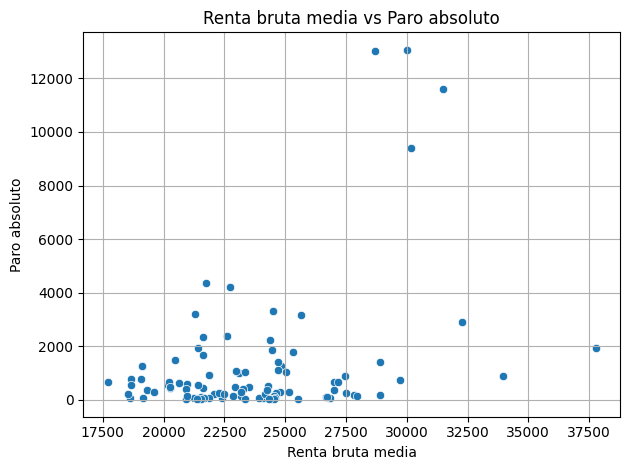

Correlación de Pearson: 0.374
Correlación de Spearman: 0.139


In [86]:
sns.scatterplot(data=corr_df, x='Renta bruta media', y='Paro absoluto')
plt.title('Renta bruta media vs Paro absoluto')
plt.xlabel('Renta bruta media')
plt.ylabel('Paro absoluto')
plt.grid(True)
plt.tight_layout()
plt.show()

pearson_corr, _ = pearsonr(corr_df['Renta bruta media'], corr_df['Paro absoluto'])
print(f"Correlación de Pearson: {pearson_corr:.3f}")

spearman_corr, _ = spearmanr(corr_df['Renta bruta media'], corr_df['Paro absoluto'])
print(f"Correlación de Spearman: {spearman_corr:.3f}")

In [87]:
for year, group in part_df.groupby('Año'):
    print(f"Año {year}:")
    print(f"  Número de filas: {len(group)}")
    print(f"  Unicidad Renta bruta media: {group['Renta bruta media'].nunique()}")
    print(f"  Unicidad participación: {group['participacion'].nunique()}")
    print()

NameError: name 'part_df' is not defined

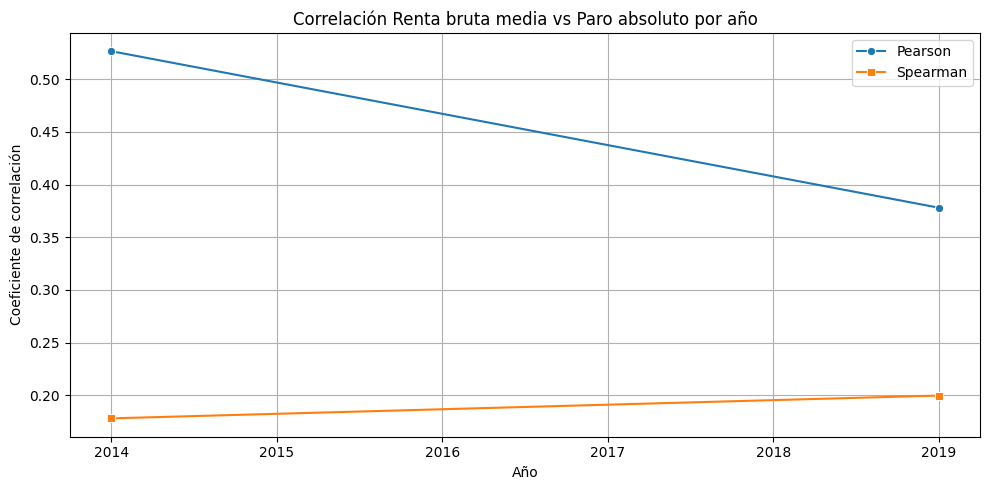

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=correlations_df, x='Año', y='Pearson', marker='o', label='Pearson')
sns.lineplot(data=correlations_df, x='Año', y='Spearman', marker='s', label='Spearman')
plt.title('Correlación Renta bruta media vs Paro absoluto por año')
plt.ylabel('Coeficiente de correlación')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
query_part = """
SELECT 
    r.`Renta bruta media`,
    e.`Total votantes`,
    e.`Total censo electoral`,
    (CAST(e.`Total votantes` AS FLOAT) / NULLIF(e.`Total censo electoral`, 0)) AS participacion,
    r.Año,
    prov.`Nombre de Provincia`
FROM 
    RENTA r
JOIN 
    VOTOS_PROVINCIA e ON r.id_provincia = e.id_provincia AND r.Año = e.Año
JOIN 
    PROVINCIA prov ON r.id_provincia = prov.id_provincia
WHERE 
    r.`Renta bruta media` IS NOT NULL 
    AND e.`Total votantes` IS NOT NULL 
    AND e.`Total censo electoral` IS NOT NULL;
"""

part_df = pd.read_sql(query_part, con=engine)
part_df.head()

Renta bruta media  Total votantes  Total censo electoral  participacion  \
0              23259          207171                 303596              1   
1              23348          773707                1285896              1   
2              21399          289771                 472104              1   
3              20916          375387                 544591              1   
4              29736          424598                 792006              1   

    Año             Nombre de Provincia  
0  2019  Albacete                        
1  2019  Alicante / Alacant              
2  2019  Almería                         
3  2019  Badajoz                         
4  2019  Illes Balears

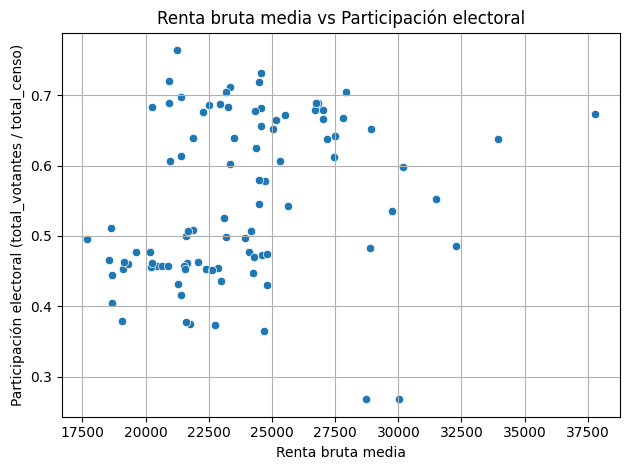

Correlación de Pearson: 0.265
Correlación de Spearman: 0.324


In [ ]:
sns.scatterplot(data=part_df, x='Renta bruta media', y='participacion')
plt.title('Renta bruta media vs Participación electoral')
plt.xlabel('Renta bruta media')
plt.ylabel('Participación electoral (total_votantes / total_censo)')
plt.grid(True)
plt.tight_layout()
plt.show()

pearson_corr, _ = pearsonr(part_df['Renta bruta media'], part_df['participacion'])
print(f"Correlación de Pearson: {pearson_corr:.3f}")

spearman_corr, _ = spearmanr(part_df['Renta bruta media'], part_df['participacion'])
print(f"Correlación de Spearman: {spearman_corr:.3f}")


In [ ]:
correlaciones_part = []

for year, grupo in part_df.groupby('Año'):
    if grupo['Renta bruta media'].nunique() > 1 and grupo['participacion'].nunique() > 1:
        pearson_corr, _ = pearsonr(grupo['Renta bruta media'], grupo['participacion'])
        spearman_corr, _ = spearmanr(grupo['Renta bruta media'], grupo['participacion'])
    else:
        pearson_corr, spearman_corr = float('nan'), float('nan')
    correlaciones_part.append({
        'Año': year,
        'Pearson': pearson_corr,
        'Spearman': spearman_corr
    })

correlaciones_part_df = pd.DataFrame(correlaciones_part)
print(correlaciones_part_df)

    Año  Pearson  Spearman
0  2014       -0        -0
1  2019       -0        -0


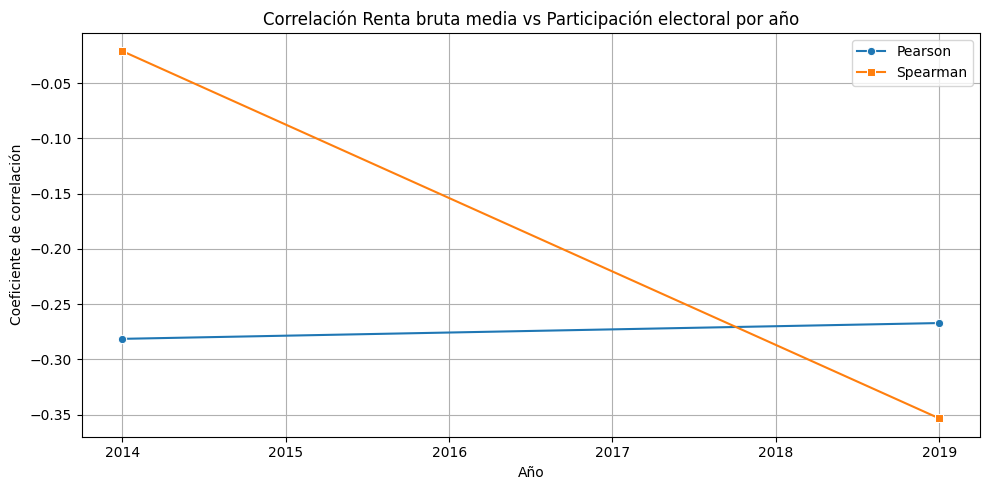

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=correlaciones_part_df, x='Año', y='Pearson', marker='o', label='Pearson')
sns.lineplot(data=correlaciones_part_df, x='Año', y='Spearman', marker='s', label='Spearman')
plt.title('Correlación Renta bruta media vs Participación electoral por año')
plt.ylabel('Coeficiente de correlación')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
query_4 = """
SELECT 
    r.`Renta bruta media`,
    e.`Total votantes`,
    e.`Total censo electoral`,
    (CAST(e.`Total votantes` AS FLOAT) / NULLIF(e.`Total censo electoral`, 0)) AS participacion,
    r.Año,
    prov.`Nombre de Provincia`
FROM 
    RENTA r
JOIN 
    VOTOS_PROVINCIA e ON r.id_provincia = e.id_provincia AND r.Año = e.Año
JOIN 
    PROVINCIA prov ON r.id_provincia = prov.id_provincia
WHERE 
    r.`Renta bruta media` IS NOT NULL 
    AND e.`Total votantes` IS NOT NULL 
    AND e.`Total censo electoral` IS NOT NULL;
"""

part_4 = pd.read_sql(query_4, con=engine)
part_4.head()